In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import datetime

In [2]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p01/calories_p01.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p01/distance_p01.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p01/steps_p01.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p01/active_duration_p01.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p01/avg_active_heart_rate_p01.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p01/sleep_p01.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p01/resting_heart_rate_p01.csv'

In [3]:
calories_p01=pd.read_csv(file_to_load1)
distance_p01=pd.read_csv(file_to_load2)
steps_p01=pd.read_csv(file_to_load3)
active_duration_p01=pd.read_csv(file_to_load4)
avg_active_heart_rate_p01=pd.read_csv(file_to_load5)
sleep_p01=pd.read_csv(file_to_load6)
resting_heart_rate_p01=pd.read_csv(file_to_load7)

# Participant 1

In [4]:
#Calories
calories_p01['datetime'] = pd.to_datetime(calories_p01['datetime'])
calories_p01 = calories_p01.set_index(calories_p01.datetime)
calories_p01.drop('datetime', axis=1, inplace=True)

#Distance
distance_p01['datetime'] = pd.to_datetime(distance_p01['datetime'])
distance_p01 = distance_p01.set_index(distance_p01.datetime)
distance_p01.drop('datetime', axis=1, inplace=True)

#steps
steps_p01['datetime'] = pd.to_datetime(steps_p01['datetime'])
steps_p01 = steps_p01.set_index(steps_p01.datetime)
steps_p01.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p01['datetime'] = pd.to_datetime(active_duration_p01['datetime'])
active_duration_p01 = active_duration_p01.set_index(active_duration_p01.datetime)
active_duration_p01.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p01['datetime'] = pd.to_datetime(avg_active_heart_rate_p01['datetime'])
avg_active_heart_rate_p01 = avg_active_heart_rate_p01.set_index(avg_active_heart_rate_p01.datetime)
avg_active_heart_rate_p01.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p01['datetime'] = pd.to_datetime(sleep_p01['datetime'])
sleep_p01 = sleep_p01.set_index(sleep_p01.datetime)
sleep_p01.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p01['datetime'] = pd.to_datetime(resting_heart_rate_p01['datetime'])
resting_heart_rate_p01 = resting_heart_rate_p01.set_index(resting_heart_rate_p01.datetime)
resting_heart_rate_p01.drop('datetime', axis=1, inplace=True)

In [5]:
calories_p01 = calories_p01[(calories_p01[['calories']] != 0).any(axis=1)]
distance_p01 = distance_p01[(distance_p01[['distance']] != 0).any(axis=1)]
steps_p01 = steps_p01[(steps_p01[['steps']] != 0).any(axis=1)]
active_duration_p01 = active_duration_p01[(active_duration_p01[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p01 = avg_active_heart_rate_p01[(avg_active_heart_rate_p01[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p01 = sleep_p01[(sleep_p01[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p01 = resting_heart_rate_p01[(resting_heart_rate_p01[['Resting_beats_per_min']] != 0).any(axis=1)]

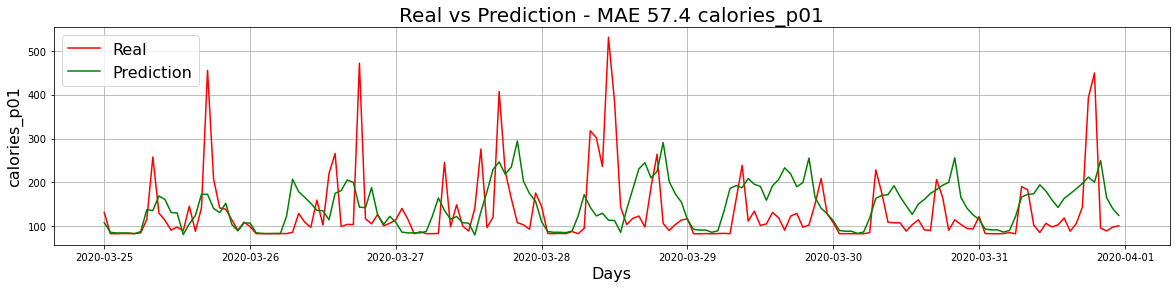

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        139.0            p01
2020-04-02     0    2      4        111.0            p01
2020-04-03     0    3      4        102.0            p01
2020-04-04     0    4      4        113.0            p01
2020-04-05     0    5      4        118.0            p01
...          ...  ...    ...          ...            ...
2021-04-25     0   25      4        108.0            p01
2021-04-26     0   26      4        107.0            p01
2021-04-27     0   27      4        109.0            p01
2021-04-28     0   28      4        110.0            p01
2021-04-29     0   29      4        115.0            p01

[394 rows x 5 columns]

In [6]:
#calories prediction
horizon=24*7
X_calories_p01 = calories_p01.drop('calories', axis=1)
y_calories_p01 = calories_p01['calories']
    
#take last week of the dataset for validation
X_train_calories_p01, X_test_calories_p01 = X_calories_p01.iloc[:-horizon,:], X_calories_p01.iloc[-horizon:,:]
y_train_calories_p01, y_test_calories_p01 = y_calories_p01.iloc[:-horizon], y_calories_p01.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p01, y_train_calories_p01)
predictions_calories_p01 = model.predict(X_test_calories_p01)

#calculate MAE
mae_calories_p01 = np.round(mean_absolute_error(y_test_calories_p01, predictions_calories_p01), 1)    
mape_calories_p01 = (mean_absolute_percentage_error(y_test_calories_p01, predictions_calories_p01))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p01} calories_p01', fontsize=20)
plt.plot(y_test_calories_p01, color='red')
plt.plot(pd.Series(predictions_calories_p01, index=y_test_calories_p01.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p01', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p01 = pd.DataFrame(fut_date)
date_calories_p01 = date_calories_p01.set_index(date_calories_p01.datetime)
date_calories_p01['hour'] = date_calories_p01.index.hour
date_calories_p01['day'] = date_calories_p01.index.day
date_calories_p01['month'] = date_calories_p01.index.month
date_calories_p01.drop('datetime', axis=1, inplace=True)
predictions_calories_p01 = model.predict(date_calories_p01)
date_calories_p01['predictions'] = np.round(predictions_calories_p01.tolist())
date_calories_p01[predictions_calories_p01<0] = 0
date_calories_p01['Participant_ID']= 'p01'


#Saving file for machine learning
file_to_save_calories = date_calories_p01.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p01/calories_p01.csv')

date_calories_p01

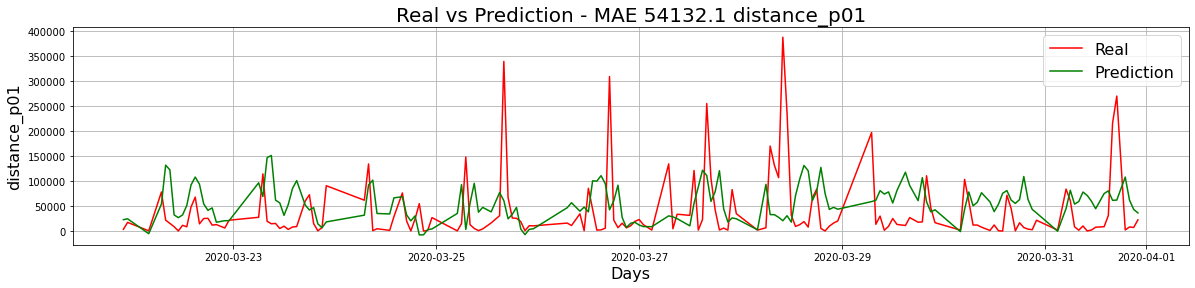

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4      25469.0            p01
2020-04-02     0    0      0          0.0            p01
2020-04-03     0    3      4       5327.0            p01
2020-04-04     0    4      4        399.0            p01
2020-04-05     0    5      4       1607.0            p01

In [7]:
#distance prediction
horizon=24*7
X_distance_p01= distance_p01.drop('distance', axis=1)
y_distance_p01 = distance_p01['distance']
    
#take last week of the dataset for validation
X_train_distance_p01, X_test_distance_p01 = X_distance_p01.iloc[:-horizon,:], X_distance_p01.iloc[-horizon:,:]
y_train_distance_p01, y_test_distance_p01 = y_distance_p01.iloc[:-horizon], y_distance_p01.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p01, y_train_distance_p01)
predictions_distance_p01 = model.predict(X_test_distance_p01)

#calculate MAE
mae_distance_p01 =np.round(mean_absolute_error(y_test_distance_p01, predictions_distance_p01),1)    
mape_distance_p01 = (mean_absolute_percentage_error(y_test_distance_p01, predictions_distance_p01))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p01} distance_p01', fontsize=20)
plt.plot(y_test_distance_p01, color='red')
plt.plot(pd.Series(predictions_distance_p01, index=y_test_distance_p01.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p01', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p01 = pd.DataFrame(fut_date)
date_distance_p01 = date_distance_p01.set_index(date_distance_p01.datetime)
date_distance_p01['hour'] = date_distance_p01.index.hour
date_distance_p01['day'] = date_distance_p01.index.day
date_distance_p01['month'] = date_distance_p01.index.month
date_distance_p01.drop('datetime', axis=1, inplace=True)
predictions_distance_p01 = model.predict(date_distance_p01)
date_distance_p01['predictions'] = np.round(predictions_distance_p01.tolist())
date_distance_p01[predictions_distance_p01<0] = 0
date_distance_p01['Participant_ID']= 'p01'

#Saving file for machine learning
file_to_save_distance = date_distance_p01.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p01/distance_p01.csv')

date_distance_p01.head()

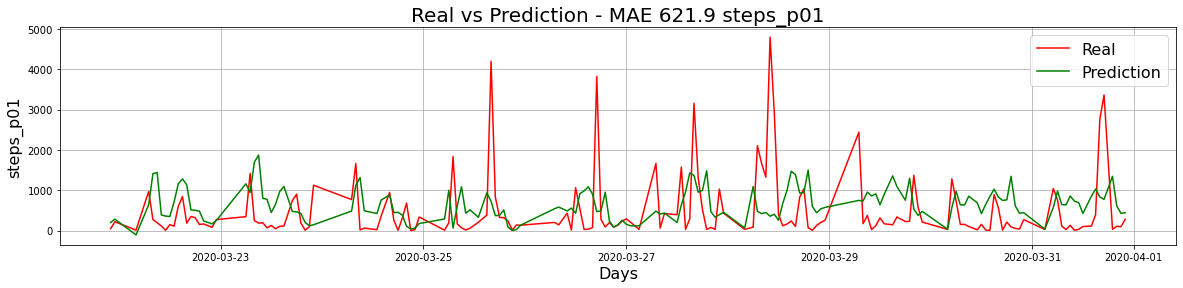

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        251.0            p01
2020-04-02     0    2      4         11.0            p01
2020-04-03     0    3      4        125.0            p01
2020-04-04     0    4      4         78.0            p01
2020-04-05     0    5      4         91.0            p01

In [8]:
#steps prediction
horizon=24*7
X_steps_p01= steps_p01.drop('steps', axis=1)
y_steps_p01 = steps_p01['steps']
    
#take last week of the dataset for validation
X_train_steps_p01, X_test_steps_p01 = X_steps_p01.iloc[:-horizon,:], X_steps_p01.iloc[-horizon:,:]
y_train_steps_p01, y_test_steps_p01 = y_steps_p01.iloc[:-horizon], y_steps_p01.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p01, y_train_steps_p01)
predictions_steps_p01 = model.predict(X_test_steps_p01)

#calculate MAE
mae_steps_p01 =np.round(mean_absolute_error(y_test_steps_p01, predictions_steps_p01),1)    
mape_steps_p01 = (mean_absolute_percentage_error(y_test_steps_p01, predictions_steps_p01))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p01} steps_p01', fontsize=20)
plt.plot(y_test_steps_p01, color='red')
plt.plot(pd.Series(predictions_steps_p01, index=y_test_steps_p01.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p01', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p01 = pd.DataFrame(fut_date)
date_steps_p01 = date_steps_p01.set_index(date_steps_p01.datetime)
date_steps_p01['hour'] = date_steps_p01.index.hour
date_steps_p01['day'] = date_steps_p01.index.day
date_steps_p01['month'] = date_steps_p01.index.month
date_steps_p01.drop('datetime', axis=1, inplace=True)
predictions_steps_p01 = model.predict(date_steps_p01)
date_steps_p01['predictions'] = np.round(predictions_steps_p01.tolist())
date_steps_p01[predictions_steps_p01<0] = 0
date_steps_p01['Participant_ID']= 'p01'

#Saving file for machine learning
file_to_save_steps = date_steps_p01.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p01/steps_p01.csv')

date_steps_p01.head()

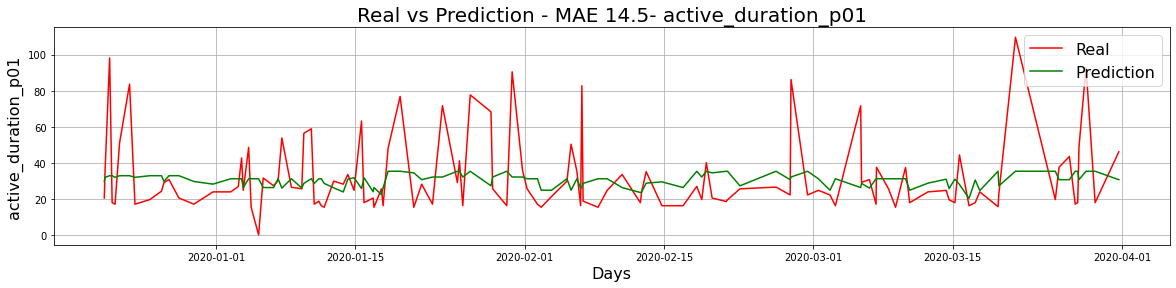

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         31.0            p01
2020-04-02     0    2      4         31.0            p01
2020-04-03     0    3      4         31.0            p01
2020-04-04     0    4      4         31.0            p01
2020-04-05     0    5      4         31.0            p01

In [9]:
#active_duration  prediction
horizon=24*5
X_active_duration_p01= active_duration_p01.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p01 = active_duration_p01['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p01, X_test_active_duration_p01 = X_active_duration_p01.iloc[:-horizon,:], X_active_duration_p01.iloc[-horizon:,:]
y_train_active_duration_p01, y_test_active_duration_p01 = y_active_duration_p01.iloc[:-horizon], y_active_duration_p01.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p01, y_train_active_duration_p01)
predictions_active_duration_p01 = model.predict(X_test_active_duration_p01)

#calculate MAE
mae_active_duration_p01 =np.round(mean_absolute_error(y_test_active_duration_p01, predictions_active_duration_p01),1)    
mape_active_duration_p01 = (mean_absolute_percentage_error(y_test_active_duration_p01, predictions_active_duration_p01))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p01}- active_duration_p01', fontsize=20)
plt.plot(y_test_active_duration_p01, color='red')
plt.plot(pd.Series(predictions_active_duration_p01, index=y_test_active_duration_p01.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p01', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p01 = pd.DataFrame(fut_date)
date_active_duration_p01 = date_active_duration_p01.set_index(date_active_duration_p01.datetime)
date_active_duration_p01['hour'] = date_active_duration_p01.index.hour
date_active_duration_p01['day'] = date_active_duration_p01.index.day
date_active_duration_p01['month'] = date_active_duration_p01.index.month
date_active_duration_p01.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p01 = model.predict(date_active_duration_p01)
date_active_duration_p01['predictions'] = np.round(predictions_active_duration_p01.tolist())
date_active_duration_p01[predictions_active_duration_p01<0] = 0
date_active_duration_p01['Participant_ID']= 'p01'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p01.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p01/active_duration_p01.csv')

date_active_duration_p01.head()

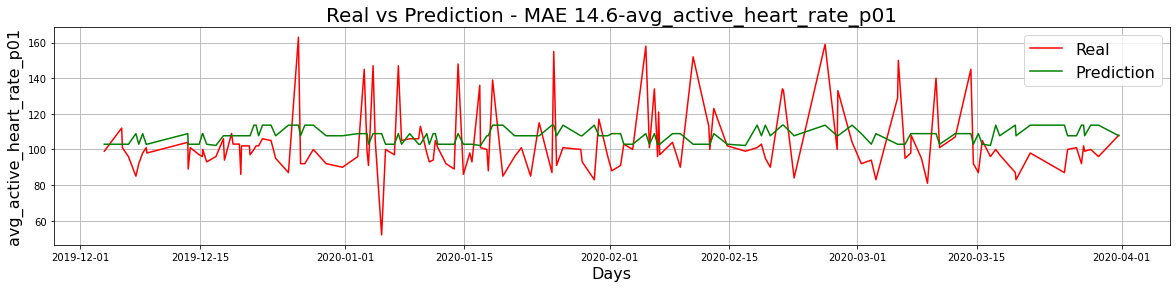

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        109.0            p01
2020-04-02     0    2      4        109.0            p01
2020-04-03     0    3      4        109.0            p01
2020-04-04     0    4      4        109.0            p01
2020-04-05     0    5      4        109.0            p01

In [10]:
#avg_active_heart_rate  prediction
horizon=24*6
X_avg_active_heart_rate_p01= avg_active_heart_rate_p01.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p01 = avg_active_heart_rate_p01['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p01, X_test_avg_active_heart_rate_p01 = X_avg_active_heart_rate_p01.iloc[:-horizon,:], X_avg_active_heart_rate_p01.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p01, y_test_avg_active_heart_rate_p01 = y_avg_active_heart_rate_p01.iloc[:-horizon], y_avg_active_heart_rate_p01.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p01, y_train_avg_active_heart_rate_p01)
predictions_avg_active_heart_rate_p01 = model.predict(X_test_avg_active_heart_rate_p01)

#calculate MAE
mae_avg_active_heart_rate_p01 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p01, predictions_avg_active_heart_rate_p01),1)    
mape_avg_active_heart_rate_p01 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p01, predictions_avg_active_heart_rate_p01))*100 

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p01}-avg_active_heart_rate_p01', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p01, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p01, index=y_test_avg_active_heart_rate_p01.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p01', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p01 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p01 = date_avg_active_heart_rate_p01.set_index(date_avg_active_heart_rate_p01.datetime)
date_avg_active_heart_rate_p01['hour'] = date_avg_active_heart_rate_p01.index.hour
date_avg_active_heart_rate_p01['day'] = date_avg_active_heart_rate_p01.index.day
date_avg_active_heart_rate_p01['month'] = date_avg_active_heart_rate_p01.index.month
date_avg_active_heart_rate_p01.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p01 = model.predict(date_avg_active_heart_rate_p01)
date_avg_active_heart_rate_p01['predictions'] = np.round(predictions_avg_active_heart_rate_p01.tolist())
date_avg_active_heart_rate_p01[predictions_avg_active_heart_rate_p01<0] = 0
date_avg_active_heart_rate_p01['Participant_ID']= 'p01'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p01.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p01/avg_active_heart_rate_p01.csv')

date_avg_active_heart_rate_p01.head()

(150, 3)
(102, 2)


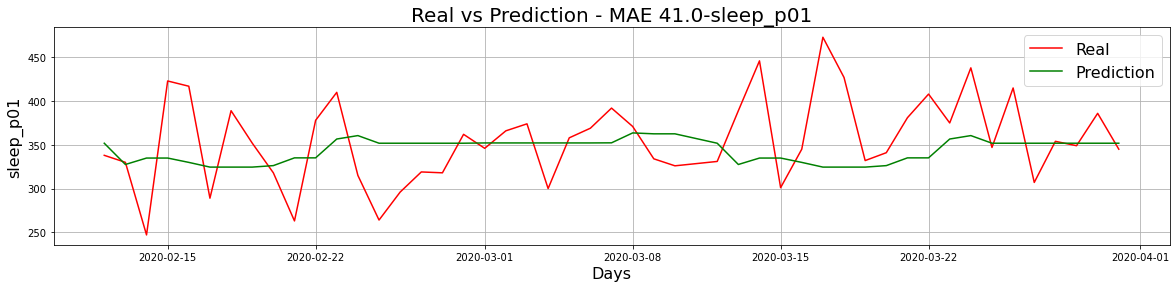

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        352.0            p01
2020-04-02    2      4        352.0            p01
2020-04-03    3      4        352.0            p01
2020-04-04    4      4        352.0            p01
2020-04-05    5      4        352.0            p01

In [11]:
#sleep prediction
horizon=24*2
X_sleep_p01= sleep_p01.drop('Minutes_Asleep', axis=1)
y_sleep_p01 = sleep_p01['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p01, X_test_sleep_p01 = X_sleep_p01.iloc[:-horizon,:], X_sleep_p01.iloc[-horizon:,:]
y_train_sleep_p01, y_test_sleep_p01 = y_sleep_p01.iloc[:-horizon], y_sleep_p01.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p01, y_train_sleep_p01)
predictions_sleep_p01 = model.predict(X_test_sleep_p01)

print(sleep_p01.shape)
print(X_train_sleep_p01.shape)

#calculate MAE
mae_sleep_p01 =np.round(mean_absolute_error(y_test_sleep_p01, predictions_sleep_p01),1)    
mape_sleep_p01 = (mean_absolute_percentage_error(y_test_sleep_p01, predictions_sleep_p01))*100 

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p01}-sleep_p01', fontsize=20)
plt.plot(y_test_sleep_p01, color='red')
plt.plot(pd.Series(predictions_sleep_p01, index=y_test_sleep_p01.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p01', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p01 = pd.DataFrame(fut_date)
date_sleep_p01 = date_sleep_p01.set_index(date_sleep_p01.datetime)
#date_sleep_p01['hour'] = date_sleep_p01.index.hour
date_sleep_p01['day'] = date_sleep_p01.index.day
date_sleep_p01['month'] = date_sleep_p01.index.month
date_sleep_p01.drop('datetime', axis=1, inplace=True)
predictions_sleep_p01 = model.predict(date_sleep_p01)
date_sleep_p01['predictions'] = np.round(predictions_sleep_p01.tolist())
date_sleep_p01[predictions_sleep_p01<0] = 0
date_sleep_p01['Participant_ID']= 'p01'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p01.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p01/sleep_p01.csv')

date_sleep_p01.head()

(152, 3)
(134, 2)


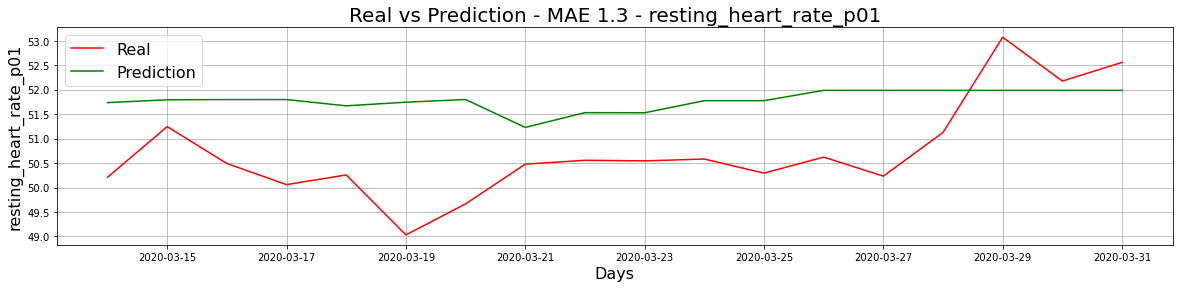

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         53.0            p01
2020-04-02    2      4         53.0            p01
2020-04-03    3      4         53.0            p01
2020-04-04    4      4         53.0            p01
2020-04-05    5      4         53.0            p01

In [12]:
#resting_heart_rate prediction
horizon=18
X_resting_heart_rate_p01= resting_heart_rate_p01.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p01 = resting_heart_rate_p01['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p01, X_test_resting_heart_rate_p01 = X_resting_heart_rate_p01.iloc[:-horizon,:], X_resting_heart_rate_p01.iloc[-horizon:,:]
y_train_resting_heart_rate_p01, y_test_resting_heart_rate_p01 = y_resting_heart_rate_p01.iloc[:-horizon], y_resting_heart_rate_p01.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p01, y_train_resting_heart_rate_p01)
predictions_resting_heart_rate_p01 = model.predict(X_test_resting_heart_rate_p01)

print(resting_heart_rate_p01.shape)
print(X_train_resting_heart_rate_p01.shape)

#calculate MAE
mae_resting_heart_rate_p01 =np.round(mean_absolute_error(y_test_resting_heart_rate_p01, predictions_resting_heart_rate_p01),1)    
mape_resting_heart_rate_p01 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p01, predictions_resting_heart_rate_p01))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p01} - resting_heart_rate_p01', fontsize=20)
plt.plot(y_test_resting_heart_rate_p01, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p01, index=y_test_resting_heart_rate_p01.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p01', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p01 = pd.DataFrame(fut_date)
date_resting_heart_rate_p01 = date_resting_heart_rate_p01.set_index(date_resting_heart_rate_p01.datetime)
#date_resting_heart_rate_p01['hour'] = date_resting_heart_rate_p01.index.hour
date_resting_heart_rate_p01['day'] = date_resting_heart_rate_p01.index.day
date_resting_heart_rate_p01['month'] = date_resting_heart_rate_p01.index.month
date_resting_heart_rate_p01.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p01 = model.predict(date_resting_heart_rate_p01)
date_resting_heart_rate_p01['predictions'] = np.round(predictions_resting_heart_rate_p01.tolist())
date_resting_heart_rate_p01[predictions_resting_heart_rate_p01<0] = 0
date_resting_heart_rate_p01['Participant_ID']= 'p01'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p01.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p01/resting_heart_rate_p01.csv')

date_resting_heart_rate_p01.head()

# Participant 2

In [13]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p02/calories_p02.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p02/distance_p02.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p02/steps_p02.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p02/active_duration_p02.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p02/avg_active_heart_rate_p02.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p02/sleep_p02.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p02/resting_heart_rate_p02.csv'

In [14]:
calories_p02=pd.read_csv(file_to_load1)
distance_p02=pd.read_csv(file_to_load2)
steps_p02=pd.read_csv(file_to_load3)
active_duration_p02=pd.read_csv(file_to_load4)
avg_active_heart_rate_p02=pd.read_csv(file_to_load5)
sleep_p02=pd.read_csv(file_to_load6)
resting_heart_rate_p02=pd.read_csv(file_to_load7)

In [15]:
#Calories
calories_p02['datetime'] = pd.to_datetime(calories_p02['datetime'])
calories_p02 = calories_p02.set_index(calories_p02.datetime)
calories_p02.drop('datetime', axis=1, inplace=True)

#Distance
distance_p02['datetime'] = pd.to_datetime(distance_p02['datetime'])
distance_p02 = distance_p02.set_index(distance_p02.datetime)
distance_p02.drop('datetime', axis=1, inplace=True)

#steps
steps_p02['datetime'] = pd.to_datetime(steps_p02['datetime'])
steps_p02 = steps_p02.set_index(steps_p02.datetime)
steps_p02.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p02['datetime'] = pd.to_datetime(active_duration_p02['datetime'])
active_duration_p02 = active_duration_p02.set_index(active_duration_p02.datetime)
active_duration_p02.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p02['datetime'] = pd.to_datetime(avg_active_heart_rate_p02['datetime'])
avg_active_heart_rate_p02 = avg_active_heart_rate_p02.set_index(avg_active_heart_rate_p02.datetime)
avg_active_heart_rate_p02.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p02['datetime'] = pd.to_datetime(sleep_p02['datetime'])
sleep_p02 = sleep_p02.set_index(sleep_p02.datetime)
sleep_p02.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p02['datetime'] = pd.to_datetime(resting_heart_rate_p02['datetime'])
resting_heart_rate_p02 = resting_heart_rate_p02.set_index(resting_heart_rate_p02.datetime)
resting_heart_rate_p02.drop('datetime', axis=1, inplace=True)

In [16]:
calories_p02 = calories_p02[(calories_p02[['calories']] != 0).any(axis=1)]
distance_p02 = distance_p02[(distance_p02[['distance']] != 0).any(axis=1)]
steps_p02 = steps_p02[(steps_p02[['steps']] != 0).any(axis=1)]
active_duration_p02 = active_duration_p02[(active_duration_p02[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p02 = avg_active_heart_rate_p02[(avg_active_heart_rate_p02[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p02 = sleep_p02[(sleep_p02[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p02 = resting_heart_rate_p02[(resting_heart_rate_p02[['Resting_beats_per_min']] != 0).any(axis=1)]

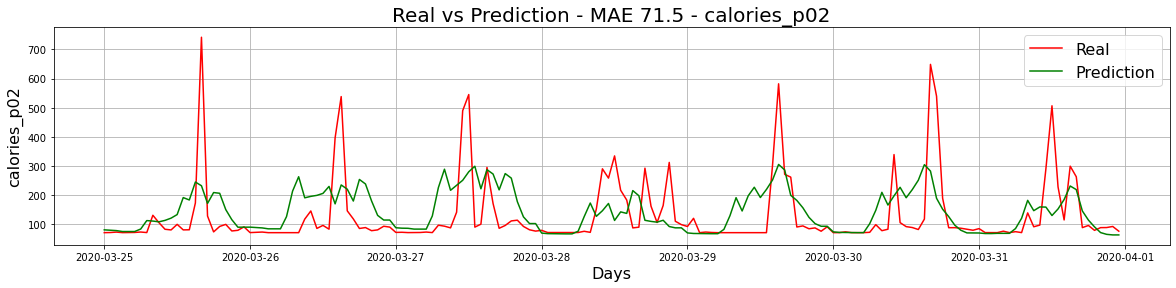

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         74.0            p02
2020-04-02     0    2      4         75.0            p02
2020-04-03     0    3      4         77.0            p02
2020-04-04     0    4      4         74.0            p02
2020-04-05     0    5      4         74.0            p02

In [17]:
#calories prediction
horizon=24*7
X_calories_p02 = calories_p02.drop('calories', axis=1)
y_calories_p02 = calories_p02['calories']
    
#take last week of the dataset for validation
X_train_calories_p02, X_test_calories_p02 = X_calories_p02.iloc[:-horizon,:], X_calories_p02.iloc[-horizon:,:]
y_train_calories_p02, y_test_calories_p02 = y_calories_p02.iloc[:-horizon], y_calories_p02.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p02, y_train_calories_p02)
predictions_calories_p02 = model.predict(X_test_calories_p02)

#calculate MAE
mae_calories_p02 = np.round(mean_absolute_error(y_test_calories_p02, predictions_calories_p02), 1)    
mape_calories_p02 = (mean_absolute_percentage_error(y_test_calories_p02, predictions_calories_p02))*100
  
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p02} - calories_p02', fontsize=20)
plt.plot(y_test_calories_p02, color='red')
plt.plot(pd.Series(predictions_calories_p02, index=y_test_calories_p02.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p02', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p02 = pd.DataFrame(fut_date)
date_calories_p02 = date_calories_p02.set_index(date_calories_p02.datetime)
date_calories_p02['hour'] = date_calories_p02.index.hour
date_calories_p02['day'] = date_calories_p02.index.day
date_calories_p02['month'] = date_calories_p02.index.month
date_calories_p02.drop('datetime', axis=1, inplace=True)
predictions_calories_p02 = model.predict(date_calories_p02)
date_calories_p02['predictions'] = np.round(predictions_calories_p02.tolist())
date_calories_p02[predictions_calories_p02<0] = 0
date_calories_p02['Participant_ID']= 'p02'

#Saving file for machine learning
file_to_save_calories = date_calories_p02.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p02/calories_p02.csv')

date_calories_p02.head()

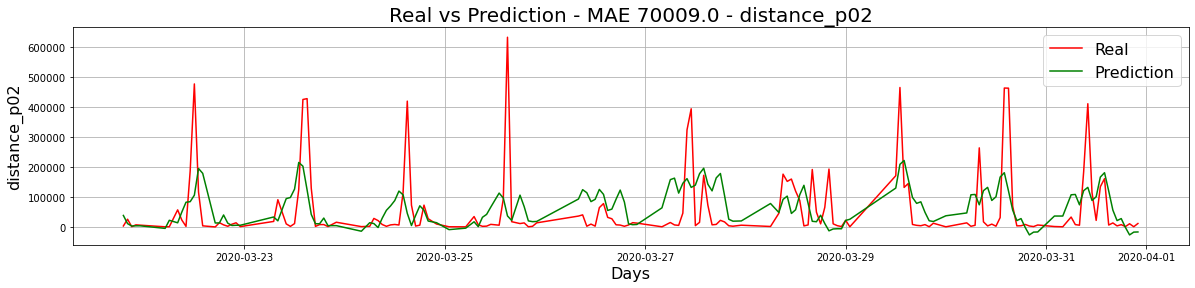

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4      11101.0            p02
2020-04-02     0    2      4      11467.0            p02
2020-04-03     0    3      4      41770.0            p02
2020-04-04     0    4      4       8119.0            p02
2020-04-05     0    5      4      12564.0            p02

In [18]:
#distance prediction
horizon=24*7
X_distance_p02= distance_p02.drop('distance', axis=1)
y_distance_p02 = distance_p02['distance']
    
#take last week of the dataset for validation
X_train_distance_p02, X_test_distance_p02 = X_distance_p02.iloc[:-horizon,:], X_distance_p02.iloc[-horizon:,:]
y_train_distance_p02, y_test_distance_p02 = y_distance_p02.iloc[:-horizon], y_distance_p02.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p02, y_train_distance_p02)
predictions_distance_p02 = model.predict(X_test_distance_p02)

#calculate MAE
mae_distance_p02 =np.round(mean_absolute_error(y_test_distance_p02, predictions_distance_p02),1)    
mape_distance_p02 = (mean_absolute_percentage_error(y_test_distance_p02, predictions_distance_p02))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p02} - distance_p02', fontsize=20)
plt.plot(y_test_distance_p02, color='red')
plt.plot(pd.Series(predictions_distance_p02, index=y_test_distance_p02.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p02', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p02 = pd.DataFrame(fut_date)
date_distance_p02 = date_distance_p02.set_index(date_distance_p02.datetime)
date_distance_p02['hour'] = date_distance_p02.index.hour
date_distance_p02['day'] = date_distance_p02.index.day
date_distance_p02['month'] = date_distance_p02.index.month
date_distance_p02.drop('datetime', axis=1, inplace=True)
predictions_distance_p02 = model.predict(date_distance_p02)
date_distance_p02['predictions'] = np.round(predictions_distance_p02.tolist())
date_distance_p02[predictions_distance_p02<0] = 0
date_distance_p02['Participant_ID']= 'p02'

#Saving file for machine learning
file_to_save_distance = date_distance_p02.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p02/distance_p02.csv')

date_distance_p02.head()

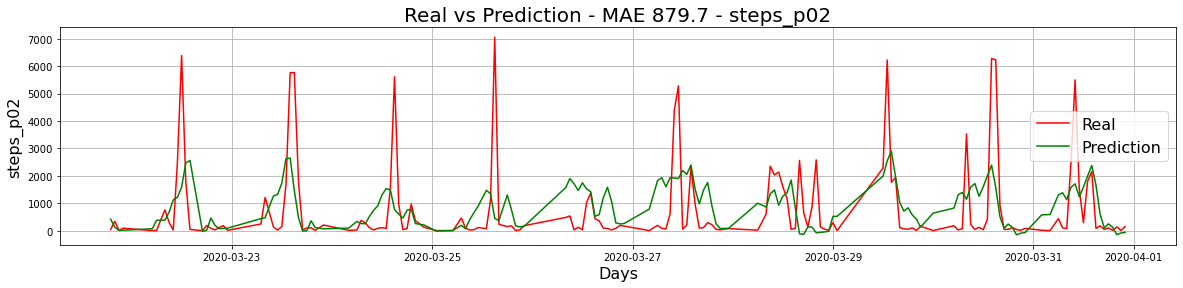

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        203.0            p02
2020-04-02     0    2      4         16.0            p02
2020-04-03     0    3      4        357.0            p02
2020-04-04     0    4      4        116.0            p02
2020-04-05     0    5      4        253.0            p02

In [19]:
#steps prediction
horizon=24*7
X_steps_p02= steps_p02.drop('steps', axis=1)
y_steps_p02 = steps_p02['steps']
    
#take last week of the dataset for validation
X_train_steps_p02, X_test_steps_p02 = X_steps_p02.iloc[:-horizon,:], X_steps_p02.iloc[-horizon:,:]
y_train_steps_p02, y_test_steps_p02 = y_steps_p02.iloc[:-horizon], y_steps_p02.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p02, y_train_steps_p02)
predictions_steps_p02 = model.predict(X_test_steps_p02)

#calculate MAE
mae_steps_p02 =np.round(mean_absolute_error(y_test_steps_p02, predictions_steps_p02),1)    
mape_steps_p02 = (mean_absolute_percentage_error(y_test_steps_p02, predictions_steps_p02))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p02} - steps_p02', fontsize=20)
plt.plot(y_test_steps_p02, color='red')
plt.plot(pd.Series(predictions_steps_p02, index=y_test_steps_p02.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p02', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p02 = pd.DataFrame(fut_date)
date_steps_p02 = date_steps_p02.set_index(date_steps_p02.datetime)
date_steps_p02['hour'] = date_steps_p02.index.hour
date_steps_p02['day'] = date_steps_p02.index.day
date_steps_p02['month'] = date_steps_p02.index.month
date_steps_p02.drop('datetime', axis=1, inplace=True)
predictions_steps_p02 = model.predict(date_steps_p02)
date_steps_p02['predictions'] = np.round(predictions_steps_p02.tolist())
date_steps_p02[predictions_steps_p02<0] = 0
date_steps_p02['Participant_ID']= 'p02'

#Saving file for machine learning
file_to_save_steps = date_steps_p02.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p02/steps_p02.csv')

date_steps_p02.head()

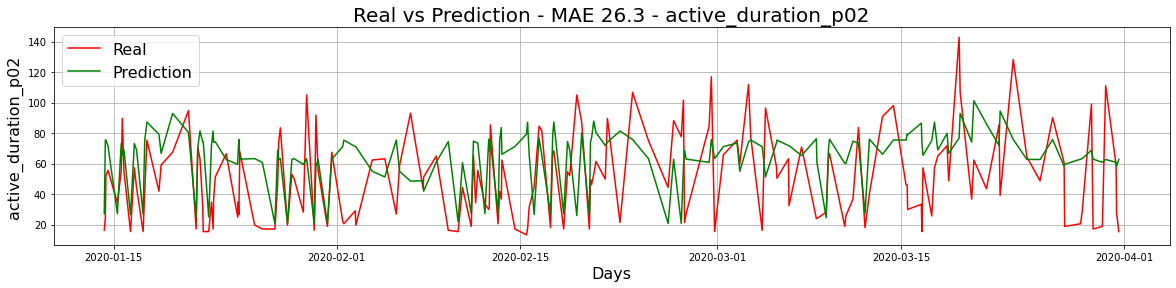

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         29.0            p02
2020-04-02     0    2      4         29.0            p02
2020-04-03     0    3      4         29.0            p02
2020-04-04     0    4      4         29.0            p02
2020-04-05     0    5      4         29.0            p02

In [20]:
#active_duration  prediction
horizon=24*7
X_active_duration_p02= active_duration_p02.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p02 = active_duration_p02['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p02, X_test_active_duration_p02 = X_active_duration_p02.iloc[:-horizon,:], X_active_duration_p02.iloc[-horizon:,:]
y_train_active_duration_p02, y_test_active_duration_p02 = y_active_duration_p02.iloc[:-horizon], y_active_duration_p02.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p02, y_train_active_duration_p02)
predictions_active_duration_p02 = model.predict(X_test_active_duration_p02)

#calculate MAE
mae_active_duration_p02 =np.round(mean_absolute_error(y_test_active_duration_p02, predictions_active_duration_p02),1)    
mape_active_duration_p02 = (mean_absolute_percentage_error(y_test_active_duration_p02, predictions_active_duration_p02))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p02} - active_duration_p02', fontsize=20)
plt.plot(y_test_active_duration_p02, color='red')
plt.plot(pd.Series(predictions_active_duration_p02, index=y_test_active_duration_p02.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p02', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p02 = pd.DataFrame(fut_date)
date_active_duration_p02 = date_active_duration_p02.set_index(date_active_duration_p02.datetime)
date_active_duration_p02['hour'] = date_active_duration_p02.index.hour
date_active_duration_p02['day'] = date_active_duration_p02.index.day
date_active_duration_p02['month'] = date_active_duration_p02.index.month
date_active_duration_p02.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p02 = model.predict(date_active_duration_p02)
date_active_duration_p02['predictions'] = np.round(predictions_active_duration_p02.tolist())
date_active_duration_p02[predictions_active_duration_p02<0] = 0
date_active_duration_p02['Participant_ID']= 'p02'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p02.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p02/active_duration_p02.csv')

date_active_duration_p02.head()

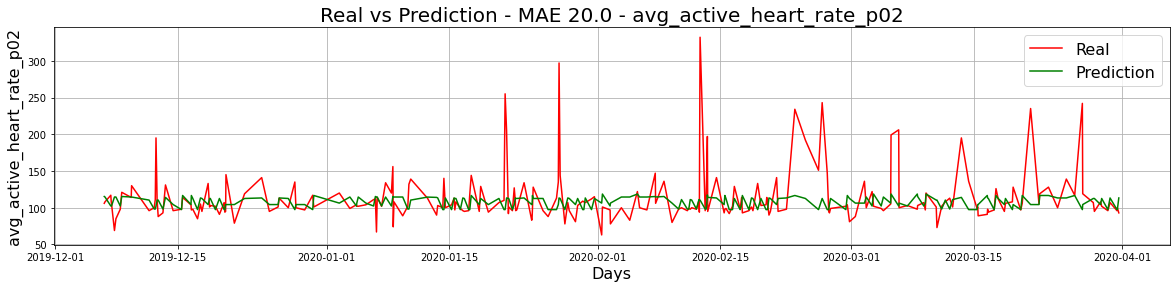

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        102.0            p02
2020-04-02     0    2      4        102.0            p02
2020-04-03     0    3      4        102.0            p02
2020-04-04     0    4      4        102.0            p02
2020-04-05     0    5      4        102.0            p02

In [21]:
#avg_active_heart_rate  prediction
horizon=24*10
X_avg_active_heart_rate_p02= avg_active_heart_rate_p02.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p02 = avg_active_heart_rate_p02['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p02, X_test_avg_active_heart_rate_p02 = X_avg_active_heart_rate_p02.iloc[:-horizon,:], X_avg_active_heart_rate_p02.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p02, y_test_avg_active_heart_rate_p02 = y_avg_active_heart_rate_p02.iloc[:-horizon], y_avg_active_heart_rate_p02.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p02, y_train_avg_active_heart_rate_p02)
predictions_avg_active_heart_rate_p02 = model.predict(X_test_avg_active_heart_rate_p02)

#calculate MAE
mae_avg_active_heart_rate_p02 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p02, predictions_avg_active_heart_rate_p02),1)    
mape_avg_active_heart_rate_p02 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p02, predictions_avg_active_heart_rate_p02))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p02} - avg_active_heart_rate_p02', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p02, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p02, index=y_test_avg_active_heart_rate_p02.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p02', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p02 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p02 = date_avg_active_heart_rate_p02.set_index(date_avg_active_heart_rate_p02.datetime)
date_avg_active_heart_rate_p02['hour'] = date_avg_active_heart_rate_p02.index.hour
date_avg_active_heart_rate_p02['day'] = date_avg_active_heart_rate_p02.index.day
date_avg_active_heart_rate_p02['month'] = date_avg_active_heart_rate_p02.index.month
date_avg_active_heart_rate_p02.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p02 = model.predict(date_avg_active_heart_rate_p02)
date_avg_active_heart_rate_p02['predictions'] = np.round(predictions_avg_active_heart_rate_p02.tolist())
date_avg_active_heart_rate_p02[predictions_avg_active_heart_rate_p02<0] = 0
date_avg_active_heart_rate_p02['Participant_ID']= 'p02'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p02.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p02/avg_active_heart_rate_p02.csv')

date_avg_active_heart_rate_p02.head()

(153, 3)
(105, 2)


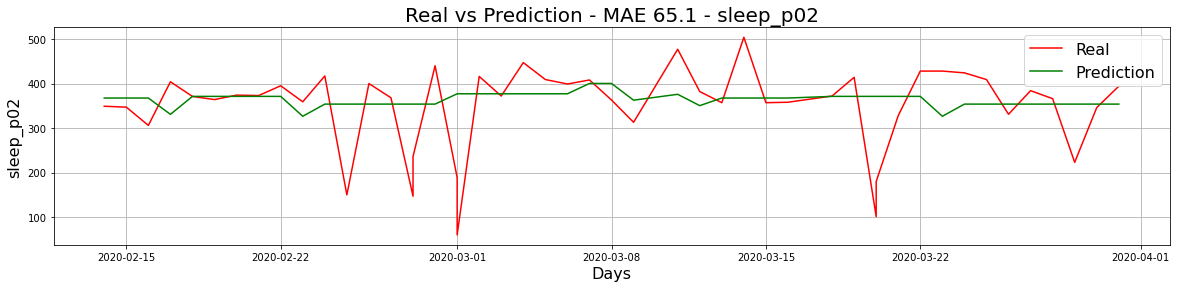

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        377.0            p02
2020-04-02    2      4        377.0            p02
2020-04-03    3      4        377.0            p02
2020-04-04    4      4        377.0            p02
2020-04-05    5      4        377.0            p02

In [22]:
#sleep prediction
horizon=24*2
X_sleep_p02= sleep_p02.drop('Minutes_Asleep', axis=1)
y_sleep_p02 = sleep_p02['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p02, X_test_sleep_p02 = X_sleep_p02.iloc[:-horizon,:], X_sleep_p02.iloc[-horizon:,:]
y_train_sleep_p02, y_test_sleep_p02 = y_sleep_p02.iloc[:-horizon], y_sleep_p02.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p02, y_train_sleep_p02)
predictions_sleep_p02 = model.predict(X_test_sleep_p02)

print(sleep_p02.shape)
print(X_train_sleep_p02.shape)

#calculate MAE
mae_sleep_p02 =np.round(mean_absolute_error(y_test_sleep_p02, predictions_sleep_p02),1)    
mape_sleep_p02 = (mean_absolute_percentage_error(y_test_sleep_p02, predictions_sleep_p02))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p02} - sleep_p02', fontsize=20)
plt.plot(y_test_sleep_p02, color='red')
plt.plot(pd.Series(predictions_sleep_p02, index=y_test_sleep_p02.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p02', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p02 = pd.DataFrame(fut_date)
date_sleep_p02 = date_sleep_p02.set_index(date_sleep_p02.datetime)
#date_sleep_p02['hour'] = date_sleep_p02.index.hour
date_sleep_p02['day'] = date_sleep_p02.index.day
date_sleep_p02['month'] = date_sleep_p02.index.month
date_sleep_p02.drop('datetime', axis=1, inplace=True)
predictions_sleep_p02 = model.predict(date_sleep_p02)
date_sleep_p02['predictions'] = np.round(predictions_sleep_p02.tolist())
date_sleep_p02[predictions_sleep_p02<0] = 0
date_sleep_p02['Participant_ID']= 'p02'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p02.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p02/sleep_p02.csv')

date_sleep_p02.head()

(89, 3)
(74, 2)


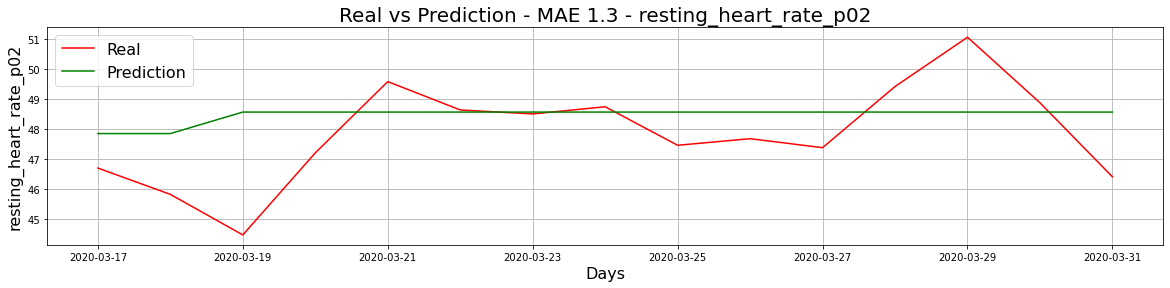

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         47.0            p02
2020-04-02    2      4         47.0            p02
2020-04-03    3      4         47.0            p02
2020-04-04    4      4         47.0            p02
2020-04-05    5      4         47.0            p02

In [23]:
#resting_heart_rate prediction
horizon=15
X_resting_heart_rate_p02= resting_heart_rate_p02.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p02 = resting_heart_rate_p02['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p02, X_test_resting_heart_rate_p02 = X_resting_heart_rate_p02.iloc[:-horizon,:], X_resting_heart_rate_p02.iloc[-horizon:,:]
y_train_resting_heart_rate_p02, y_test_resting_heart_rate_p02 = y_resting_heart_rate_p02.iloc[:-horizon], y_resting_heart_rate_p02.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p02, y_train_resting_heart_rate_p02)
predictions_resting_heart_rate_p02 = model.predict(X_test_resting_heart_rate_p02)

print(resting_heart_rate_p02.shape)
print(X_train_resting_heart_rate_p02.shape)

#calculate MAE
mae_resting_heart_rate_p02 =np.round(mean_absolute_error(y_test_resting_heart_rate_p02, predictions_resting_heart_rate_p02),1)    
mape_resting_heart_rate_p02 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p02, predictions_resting_heart_rate_p02))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p02} - resting_heart_rate_p02', fontsize=20)
plt.plot(y_test_resting_heart_rate_p02, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p02, index=y_test_resting_heart_rate_p02.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p02', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p02 = pd.DataFrame(fut_date)
date_resting_heart_rate_p02 = date_resting_heart_rate_p02.set_index(date_resting_heart_rate_p02.datetime)
#date_resting_heart_rate_p02['hour'] = date_resting_heart_rate_p02.index.hour
date_resting_heart_rate_p02['day'] = date_resting_heart_rate_p02.index.day
date_resting_heart_rate_p02['month'] = date_resting_heart_rate_p02.index.month
date_resting_heart_rate_p02.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p02 = model.predict(date_resting_heart_rate_p02)
date_resting_heart_rate_p02['predictions'] = np.round(predictions_resting_heart_rate_p02.tolist())
date_resting_heart_rate_p02[predictions_resting_heart_rate_p02<0] = 0
date_resting_heart_rate_p02['Participant_ID']= 'p02'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p02.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p02/resting_heart_rate_p02.csv')

date_resting_heart_rate_p02.head()

# Participant 3

In [24]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p03/calories_p03.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p03/distance_p03.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p03/steps_p03.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p03/active_duration_p03.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p03/avg_active_heart_rate_p03.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p03/sleep_p03.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p03/resting_heart_rate_p03.csv'

In [25]:
calories_p03=pd.read_csv(file_to_load1)
distance_p03=pd.read_csv(file_to_load2)
steps_p03=pd.read_csv(file_to_load3)
active_duration_p03=pd.read_csv(file_to_load4)
avg_active_heart_rate_p03=pd.read_csv(file_to_load5)
sleep_p03=pd.read_csv(file_to_load6)
resting_heart_rate_p03=pd.read_csv(file_to_load7)

In [26]:
#Calories
calories_p03['datetime'] = pd.to_datetime(calories_p03['datetime'])
calories_p03 = calories_p03.set_index(calories_p03.datetime)
calories_p03.drop('datetime', axis=1, inplace=True)

#Distance
distance_p03['datetime'] = pd.to_datetime(distance_p03['datetime'])
distance_p03 = distance_p03.set_index(distance_p03.datetime)
distance_p03.drop('datetime', axis=1, inplace=True)

#steps
steps_p03['datetime'] = pd.to_datetime(steps_p03['datetime'])
steps_p03 = steps_p03.set_index(steps_p03.datetime)
steps_p03.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p03['datetime'] = pd.to_datetime(active_duration_p03['datetime'])
active_duration_p03 = active_duration_p03.set_index(active_duration_p03.datetime)
active_duration_p03.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p03['datetime'] = pd.to_datetime(avg_active_heart_rate_p03['datetime'])
avg_active_heart_rate_p03 = avg_active_heart_rate_p03.set_index(avg_active_heart_rate_p03.datetime)
avg_active_heart_rate_p03.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p03['datetime'] = pd.to_datetime(sleep_p03['datetime'])
sleep_p03 = sleep_p03.set_index(sleep_p03.datetime)
sleep_p03.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p03['datetime'] = pd.to_datetime(resting_heart_rate_p03['datetime'])
resting_heart_rate_p03 = resting_heart_rate_p03.set_index(resting_heart_rate_p03.datetime)
resting_heart_rate_p03.drop('datetime', axis=1, inplace=True)

In [27]:
calories_p03 = calories_p03[(calories_p03[['calories']] != 0).any(axis=1)]
distance_p03 = distance_p03[(distance_p03[['distance']] != 0).any(axis=1)]
steps_p03 = steps_p03[(steps_p03[['steps']] != 0).any(axis=1)]
active_duration_p03 = active_duration_p03[(active_duration_p03[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p03 = avg_active_heart_rate_p03[(avg_active_heart_rate_p03[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p03 = sleep_p03[(sleep_p03[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p03 = resting_heart_rate_p03[(resting_heart_rate_p03[['Resting_beats_per_min']] != 0).any(axis=1)]

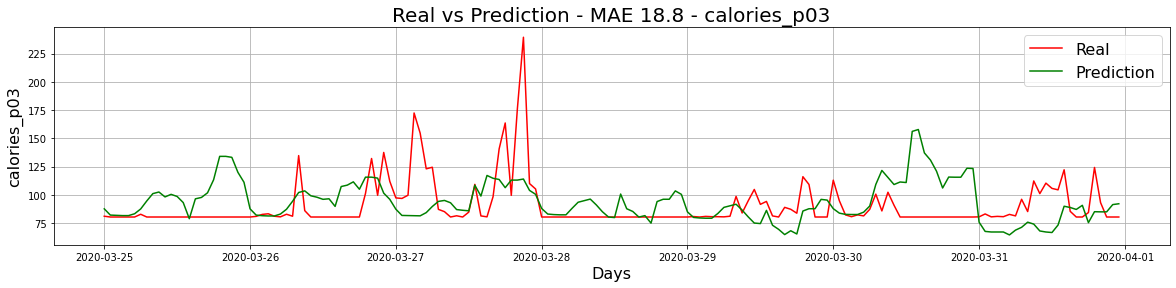

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         88.0            p03
2020-04-02     0    2      4         89.0            p03
2020-04-03     0    3      4         85.0            p03
2020-04-04     0    4      4         89.0            p03
2020-04-05     0    5      4         94.0            p03

In [28]:
#calories prediction
horizon=24*7
X_calories_p03 = calories_p03.drop('calories', axis=1)
y_calories_p03 = calories_p03['calories']
    
#take last week of the dataset for validation
X_train_calories_p03, X_test_calories_p03 = X_calories_p03.iloc[:-horizon,:], X_calories_p03.iloc[-horizon:,:]
y_train_calories_p03, y_test_calories_p03 = y_calories_p03.iloc[:-horizon], y_calories_p03.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p03, y_train_calories_p03)
predictions_calories_p03 = model.predict(X_test_calories_p03)

#calculate MAE
mae_calories_p03 = np.round(mean_absolute_error(y_test_calories_p03, predictions_calories_p03), 1)    
mape_calories_p03 = (mean_absolute_percentage_error(y_test_calories_p03, predictions_calories_p03))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p03} - calories_p03', fontsize=20)
plt.plot(y_test_calories_p03, color='red')
plt.plot(pd.Series(predictions_calories_p03, index=y_test_calories_p03.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p03', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p03 = pd.DataFrame(fut_date)
date_calories_p03 = date_calories_p03.set_index(date_calories_p03.datetime)
date_calories_p03['hour'] = date_calories_p03.index.hour
date_calories_p03['day'] = date_calories_p03.index.day
date_calories_p03['month'] = date_calories_p03.index.month
date_calories_p03.drop('datetime', axis=1, inplace=True)
predictions_calories_p03 = model.predict(date_calories_p03)
date_calories_p03['predictions'] = np.round(predictions_calories_p03.tolist())
date_calories_p03[predictions_calories_p03<0] = 0
date_calories_p03['Participant_ID']= 'p03'

#Saving file for machine learning
file_to_save_calories = date_calories_p03.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p03/calories_p03.csv')

date_calories_p03.head()

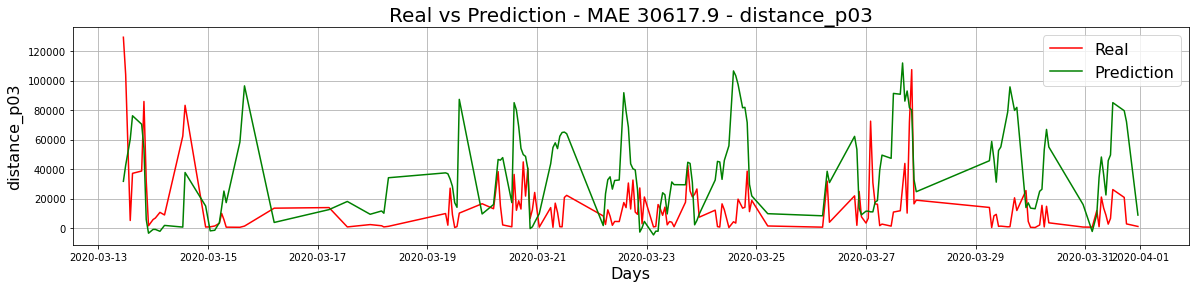

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4       6884.0            p03
2020-04-02     0    0      0          0.0            p03
2020-04-03     0    3      4      12385.0            p03
2020-04-04     0    4      4      11546.0            p03
2020-04-05     0    5      4      42953.0            p03

In [29]:
#distance prediction
horizon=24*7
X_distance_p03= distance_p03.drop('distance', axis=1)
y_distance_p03 = distance_p03['distance']
    
#take last week of the dataset for validation
X_train_distance_p03, X_test_distance_p03 = X_distance_p03.iloc[:-horizon,:], X_distance_p03.iloc[-horizon:,:]
y_train_distance_p03, y_test_distance_p03 = y_distance_p03.iloc[:-horizon], y_distance_p03.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p03, y_train_distance_p03)
predictions_distance_p03 = model.predict(X_test_distance_p03)

#calculate MAE
mae_distance_p03 =np.round(mean_absolute_error(y_test_distance_p03, predictions_distance_p03),1)    
mape_distance_p03 = (mean_absolute_percentage_error(y_test_distance_p03, predictions_distance_p03))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p03} - distance_p03', fontsize=20)
plt.plot(y_test_distance_p03, color='red')
plt.plot(pd.Series(predictions_distance_p03, index=y_test_distance_p03.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p03', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p03 = pd.DataFrame(fut_date)
date_distance_p03 = date_distance_p03.set_index(date_distance_p03.datetime)
date_distance_p03['hour'] = date_distance_p03.index.hour
date_distance_p03['day'] = date_distance_p03.index.day
date_distance_p03['month'] = date_distance_p03.index.month
date_distance_p03.drop('datetime', axis=1, inplace=True)
predictions_distance_p03 = model.predict(date_distance_p03)
date_distance_p03['predictions'] = np.round(predictions_distance_p03.tolist())
date_distance_p03[predictions_distance_p03<0] = 0
date_distance_p03['Participant_ID']= 'p03'

#Saving file for machine learning
file_to_save_distance = date_distance_p03.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p03/distance_p03.csv')

date_distance_p03.head()

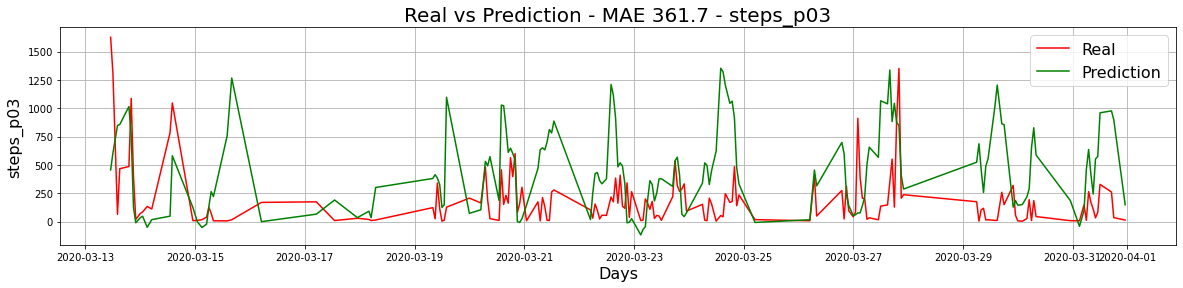

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         48.0            p03
2020-04-02     0    0      0          0.0            p03
2020-04-03     0    3      4         93.0            p03
2020-04-04     0    4      4        121.0            p03
2020-04-05     0    5      4        607.0            p03

In [30]:
#steps prediction
horizon=24*7
X_steps_p03= steps_p03.drop('steps', axis=1)
y_steps_p03 = steps_p03['steps']
    
#take last week of the dataset for validation
X_train_steps_p03, X_test_steps_p03 = X_steps_p03.iloc[:-horizon,:], X_steps_p03.iloc[-horizon:,:]
y_train_steps_p03, y_test_steps_p03 = y_steps_p03.iloc[:-horizon], y_steps_p03.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p03, y_train_steps_p03)
predictions_steps_p03 = model.predict(X_test_steps_p03)

#calculate MAE
mae_steps_p03 =np.round(mean_absolute_error(y_test_steps_p03, predictions_steps_p03),1)    
mape_steps_p03 = (mean_absolute_percentage_error(y_test_steps_p03, predictions_steps_p03))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p03} - steps_p03', fontsize=20)
plt.plot(y_test_steps_p03, color='red')
plt.plot(pd.Series(predictions_steps_p03, index=y_test_steps_p03.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p03', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p03 = pd.DataFrame(fut_date)
date_steps_p03 = date_steps_p03.set_index(date_steps_p03.datetime)
date_steps_p03['hour'] = date_steps_p03.index.hour
date_steps_p03['day'] = date_steps_p03.index.day
date_steps_p03['month'] = date_steps_p03.index.month
date_steps_p03.drop('datetime', axis=1, inplace=True)
predictions_steps_p03 = model.predict(date_steps_p03)
date_steps_p03['predictions'] = np.round(predictions_steps_p03.tolist())
date_steps_p03[predictions_steps_p03<0] = 0
date_steps_p03['Participant_ID']= 'p03'

#Saving file for machine learning
file_to_save_steps = date_steps_p03.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p03/steps_p03.csv')

date_steps_p03.head()

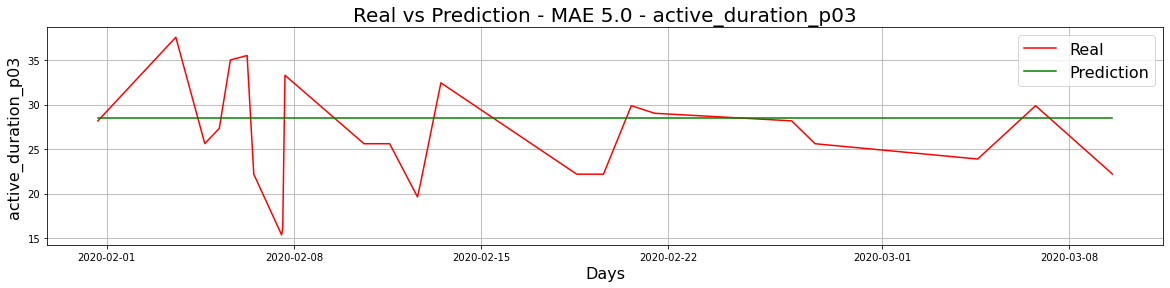

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         29.0            p03
2020-04-02     0    2      4         29.0            p03
2020-04-03     0    3      4         29.0            p03
2020-04-04     0    4      4         29.0            p03
2020-04-05     0    5      4         29.0            p03

In [31]:
#active_duration  prediction
horizon=24
X_active_duration_p03= active_duration_p03.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p03 = active_duration_p03['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p03, X_test_active_duration_p03 = X_active_duration_p03.iloc[:-horizon,:], X_active_duration_p03.iloc[-horizon:,:]
y_train_active_duration_p03, y_test_active_duration_p03 = y_active_duration_p03.iloc[:-horizon], y_active_duration_p03.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p03, y_train_active_duration_p03)
predictions_active_duration_p03 = model.predict(X_test_active_duration_p03)

#calculate MAE
mae_active_duration_p03 =np.round(mean_absolute_error(y_test_active_duration_p03, predictions_active_duration_p03),1)    
mape_active_duration_p03 = (mean_absolute_percentage_error(y_test_active_duration_p03, predictions_active_duration_p03))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p03} - active_duration_p03', fontsize=20)
plt.plot(y_test_active_duration_p03, color='red')
plt.plot(pd.Series(predictions_active_duration_p03, index=y_test_active_duration_p03.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p03', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p03 = pd.DataFrame(fut_date)
date_active_duration_p03 = date_active_duration_p03.set_index(date_active_duration_p03.datetime)
date_active_duration_p03['hour'] = date_active_duration_p03.index.hour
date_active_duration_p03['day'] = date_active_duration_p03.index.day
date_active_duration_p03['month'] = date_active_duration_p03.index.month
date_active_duration_p03.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p03 = model.predict(date_active_duration_p03)
date_active_duration_p03['predictions'] = np.round(predictions_active_duration_p03.tolist())
date_active_duration_p03[predictions_active_duration_p03<0] = 0
date_active_duration_p03['Participant_ID']= 'p03'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p03.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p03/active_duration_p03.csv')

date_active_duration_p03.head()

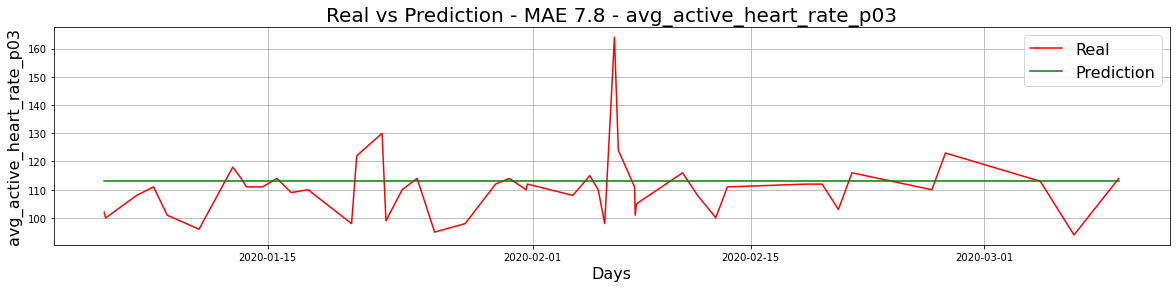

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        113.0            p03
2020-04-02     0    2      4        113.0            p03
2020-04-03     0    3      4        113.0            p03
2020-04-04     0    4      4        113.0            p03
2020-04-05     0    5      4        113.0            p03

In [32]:
#avg_active_heart_rate  prediction
horizon=24*2
X_avg_active_heart_rate_p03= avg_active_heart_rate_p03.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p03 = avg_active_heart_rate_p03['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p03, X_test_avg_active_heart_rate_p03 = X_avg_active_heart_rate_p03.iloc[:-horizon,:], X_avg_active_heart_rate_p03.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p03, y_test_avg_active_heart_rate_p03 = y_avg_active_heart_rate_p03.iloc[:-horizon], y_avg_active_heart_rate_p03.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p03, y_train_avg_active_heart_rate_p03)
predictions_avg_active_heart_rate_p03 = model.predict(X_test_avg_active_heart_rate_p03)

#calculate MAE
mae_avg_active_heart_rate_p03 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p03, predictions_avg_active_heart_rate_p03),1)    
mape_avg_active_heart_rate_p03 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p03, predictions_avg_active_heart_rate_p03))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p03} - avg_active_heart_rate_p03', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p03, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p03, index=y_test_avg_active_heart_rate_p03.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p03', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p03 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p03 = date_avg_active_heart_rate_p03.set_index(date_avg_active_heart_rate_p03.datetime)
date_avg_active_heart_rate_p03['hour'] = date_avg_active_heart_rate_p03.index.hour
date_avg_active_heart_rate_p03['day'] = date_avg_active_heart_rate_p03.index.day
date_avg_active_heart_rate_p03['month'] = date_avg_active_heart_rate_p03.index.month
date_avg_active_heart_rate_p03.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p03 = model.predict(date_avg_active_heart_rate_p03)
date_avg_active_heart_rate_p03['predictions'] = np.round(predictions_avg_active_heart_rate_p03.tolist())
date_avg_active_heart_rate_p03[predictions_avg_active_heart_rate_p03<0] = 0
date_avg_active_heart_rate_p03['Participant_ID']= 'p03'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p03.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p03/avg_active_heart_rate_p03.csv')

date_avg_active_heart_rate_p03.head()

(81, 3)
(33, 2)


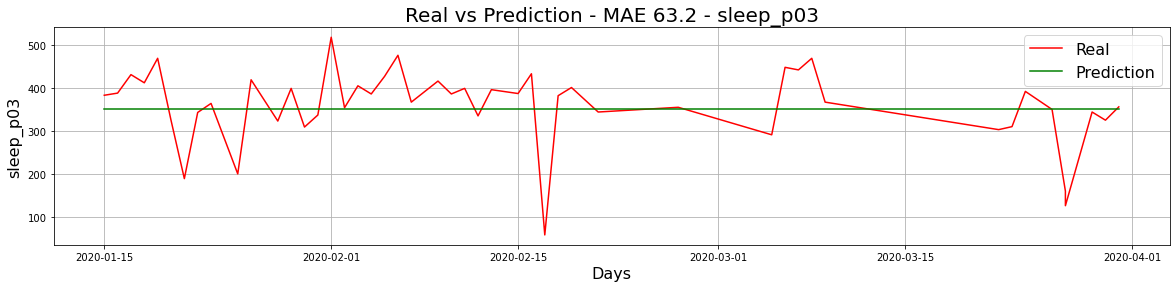

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        352.0            p03
2020-04-02    2      4        352.0            p03
2020-04-03    3      4        352.0            p03
2020-04-04    4      4        352.0            p03
2020-04-05    5      4        352.0            p03

In [33]:
#sleep prediction
horizon=24*2
X_sleep_p03= sleep_p03.drop('Minutes_Asleep', axis=1)
y_sleep_p03 = sleep_p03['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p03, X_test_sleep_p03 = X_sleep_p03.iloc[:-horizon,:], X_sleep_p03.iloc[-horizon:,:]
y_train_sleep_p03, y_test_sleep_p03 = y_sleep_p03.iloc[:-horizon], y_sleep_p03.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p03, y_train_sleep_p03)
predictions_sleep_p03 = model.predict(X_test_sleep_p03)

print(sleep_p03.shape)
print(X_train_sleep_p03.shape)

#calculate MAE
mae_sleep_p03 =np.round(mean_absolute_error(y_test_sleep_p03, predictions_sleep_p03),1)    
mape_sleep_p03 = (mean_absolute_percentage_error(y_test_sleep_p03, predictions_sleep_p03))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p03} - sleep_p03', fontsize=20)
plt.plot(y_test_sleep_p03, color='red')
plt.plot(pd.Series(predictions_sleep_p03, index=y_test_sleep_p03.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p03', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p03 = pd.DataFrame(fut_date)
date_sleep_p03 = date_sleep_p03.set_index(date_sleep_p03.datetime)
#date_sleep_p03['hour'] = date_sleep_p03.index.hour
date_sleep_p03['day'] = date_sleep_p03.index.day
date_sleep_p03['month'] = date_sleep_p03.index.month
date_sleep_p03.drop('datetime', axis=1, inplace=True)
predictions_sleep_p03 = model.predict(date_sleep_p03)
date_sleep_p03['predictions'] = np.round(predictions_sleep_p03.tolist())
date_sleep_p03[predictions_sleep_p03<0] = 0
date_sleep_p03['Participant_ID']= 'p03'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p03.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p03/sleep_p03.csv')

date_sleep_p03.head()

(101, 3)
(86, 2)


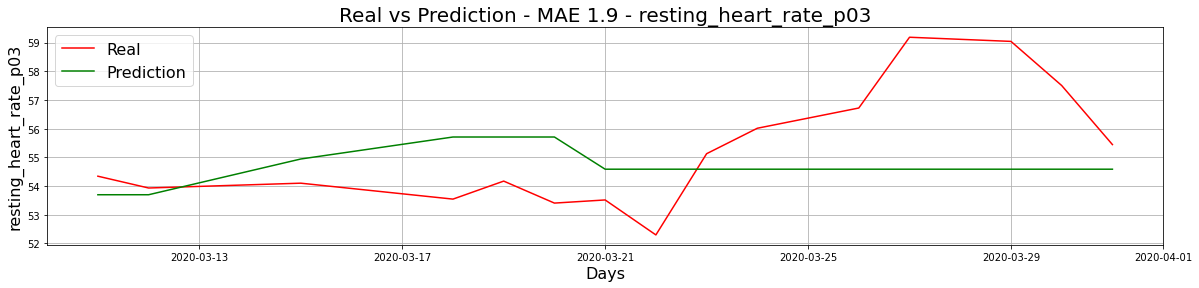

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         56.0            p03
2020-04-02    2      4         56.0            p03
2020-04-03    3      4         56.0            p03
2020-04-04    4      4         56.0            p03
2020-04-05    5      4         56.0            p03

In [34]:
#resting_heart_rate prediction
horizon=15
X_resting_heart_rate_p03= resting_heart_rate_p03.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p03 = resting_heart_rate_p03['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p03, X_test_resting_heart_rate_p03 = X_resting_heart_rate_p03.iloc[:-horizon,:], X_resting_heart_rate_p03.iloc[-horizon:,:]
y_train_resting_heart_rate_p03, y_test_resting_heart_rate_p03 = y_resting_heart_rate_p03.iloc[:-horizon], y_resting_heart_rate_p03.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p03, y_train_resting_heart_rate_p03)
predictions_resting_heart_rate_p03 = model.predict(X_test_resting_heart_rate_p03)

print(resting_heart_rate_p03.shape)
print(X_train_resting_heart_rate_p03.shape)

#calculate MAE
mae_resting_heart_rate_p03 =np.round(mean_absolute_error(y_test_resting_heart_rate_p03, predictions_resting_heart_rate_p03),1)    
mape_resting_heart_rate_p03 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p03, predictions_resting_heart_rate_p03))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p03} - resting_heart_rate_p03', fontsize=20)
plt.plot(y_test_resting_heart_rate_p03, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p03, index=y_test_resting_heart_rate_p03.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p03', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p03 = pd.DataFrame(fut_date)
date_resting_heart_rate_p03 = date_resting_heart_rate_p03.set_index(date_resting_heart_rate_p03.datetime)
#date_resting_heart_rate_p03['hour'] = date_resting_heart_rate_p03.index.hour
date_resting_heart_rate_p03['day'] = date_resting_heart_rate_p03.index.day
date_resting_heart_rate_p03['month'] = date_resting_heart_rate_p03.index.month
date_resting_heart_rate_p03.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p03 = model.predict(date_resting_heart_rate_p03)
date_resting_heart_rate_p03['predictions'] = np.round(predictions_resting_heart_rate_p03.tolist())
date_resting_heart_rate_p03[predictions_resting_heart_rate_p03<0] = 0
date_resting_heart_rate_p03['Participant_ID']= 'p03'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p03.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p03/resting_heart_rate_p03.csv')

date_resting_heart_rate_p03.head()

# Participant 4

In [35]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p04/calories_p04.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p04/distance_p04.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p04/steps_p04.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p04/active_duration_p04.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p04/avg_active_heart_rate_p04.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p04/sleep_p04.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p04/resting_heart_rate_p04.csv'

In [36]:
calories_p04=pd.read_csv(file_to_load1)
distance_p04=pd.read_csv(file_to_load2)
steps_p04=pd.read_csv(file_to_load3)
active_duration_p04=pd.read_csv(file_to_load4)
avg_active_heart_rate_p04=pd.read_csv(file_to_load5)
sleep_p04=pd.read_csv(file_to_load6)
resting_heart_rate_p04=pd.read_csv(file_to_load7)

In [37]:
#Calories
calories_p04['datetime'] = pd.to_datetime(calories_p04['datetime'])
calories_p04 = calories_p04.set_index(calories_p04.datetime)
calories_p04.drop('datetime', axis=1, inplace=True)

#Distance
distance_p04['datetime'] = pd.to_datetime(distance_p04['datetime'])
distance_p04 = distance_p04.set_index(distance_p04.datetime)
distance_p04.drop('datetime', axis=1, inplace=True)

#steps
steps_p04['datetime'] = pd.to_datetime(steps_p04['datetime'])
steps_p04 = steps_p04.set_index(steps_p04.datetime)
steps_p04.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p04['datetime'] = pd.to_datetime(active_duration_p04['datetime'])
active_duration_p04 = active_duration_p04.set_index(active_duration_p04.datetime)
active_duration_p04.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p04['datetime'] = pd.to_datetime(avg_active_heart_rate_p04['datetime'])
avg_active_heart_rate_p04 = avg_active_heart_rate_p04.set_index(avg_active_heart_rate_p04.datetime)
avg_active_heart_rate_p04.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p04['datetime'] = pd.to_datetime(sleep_p04['datetime'])
sleep_p04 = sleep_p04.set_index(sleep_p04.datetime)
sleep_p04.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p04['datetime'] = pd.to_datetime(resting_heart_rate_p04['datetime'])
resting_heart_rate_p04 = resting_heart_rate_p04.set_index(resting_heart_rate_p04.datetime)
resting_heart_rate_p04.drop('datetime', axis=1, inplace=True)

In [38]:
calories_p04 = calories_p04[(calories_p04[['calories']] != 0).any(axis=1)]
distance_p04 = distance_p04[(distance_p04[['distance']] != 0).any(axis=1)]
steps_p04 = steps_p04[(steps_p04[['steps']] != 0).any(axis=1)]
active_duration_p04 = active_duration_p04[(active_duration_p04[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p04 = avg_active_heart_rate_p04[(avg_active_heart_rate_p04[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p04 = sleep_p04[(sleep_p04[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p04 = resting_heart_rate_p04[(resting_heart_rate_p04[['Resting_beats_per_min']] != 0).any(axis=1)]

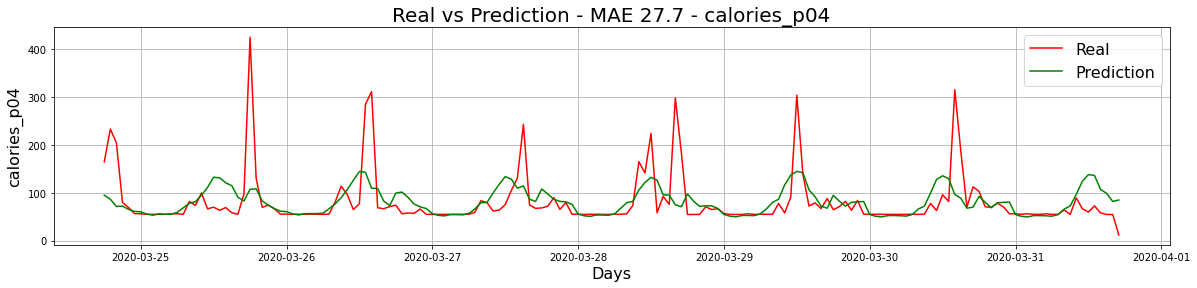

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        122.0            p04
2020-04-02     0    2      4         90.0            p04
2020-04-03     0    3      4         62.0            p04
2020-04-04     0    4      4         67.0            p04
2020-04-05     0    5      4         61.0            p04

In [39]:
#calories prediction
horizon=24*7
X_calories_p04 = calories_p04.drop('calories', axis=1)
y_calories_p04 = calories_p04['calories']
    
#take last week of the dataset for validation
X_train_calories_p04, X_test_calories_p04 = X_calories_p04.iloc[:-horizon,:], X_calories_p04.iloc[-horizon:,:]
y_train_calories_p04, y_test_calories_p04 = y_calories_p04.iloc[:-horizon], y_calories_p04.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p04, y_train_calories_p04)
predictions_calories_p04 = model.predict(X_test_calories_p04)

#calculate MAE
mae_calories_p04 = np.round(mean_absolute_error(y_test_calories_p04, predictions_calories_p04), 1)    
mape_calories_p04 = (mean_absolute_percentage_error(y_test_calories_p04, predictions_calories_p04))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p04} - calories_p04', fontsize=20)
plt.plot(y_test_calories_p04, color='red')
plt.plot(pd.Series(predictions_calories_p04, index=y_test_calories_p04.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p04', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p04 = pd.DataFrame(fut_date)
date_calories_p04 = date_calories_p04.set_index(date_calories_p04.datetime)
date_calories_p04['hour'] = date_calories_p04.index.hour
date_calories_p04['day'] = date_calories_p04.index.day
date_calories_p04['month'] = date_calories_p04.index.month
date_calories_p04.drop('datetime', axis=1, inplace=True)
predictions_calories_p04 = model.predict(date_calories_p04)
date_calories_p04['predictions'] = np.round(predictions_calories_p04.tolist())
date_calories_p04[predictions_calories_p04<0] = 0
date_calories_p04['Participant_ID']= 'p04'

#Saving file for machine learning
file_to_save_calories = date_calories_p04.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p04/calories_p04.csv')

date_calories_p04.head()

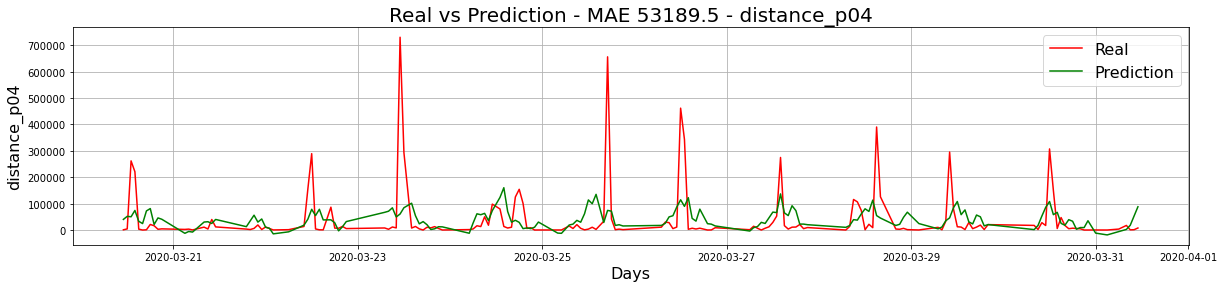

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4      61100.0            p04
2020-04-02     0    2      4      20376.0            p04
2020-04-03     0    3      4      36223.0            p04
2020-04-04     0    4      4      19004.0            p04
2020-04-05     0    0      0          0.0            p04

In [40]:
#distance prediction
horizon=24*7
X_distance_p04= distance_p04.drop('distance', axis=1)
y_distance_p04 = distance_p04['distance']
    
#take last week of the dataset for validation
X_train_distance_p04, X_test_distance_p04 = X_distance_p04.iloc[:-horizon,:], X_distance_p04.iloc[-horizon:,:]
y_train_distance_p04, y_test_distance_p04 = y_distance_p04.iloc[:-horizon], y_distance_p04.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p04, y_train_distance_p04)
predictions_distance_p04 = model.predict(X_test_distance_p04)

#calculate MAE
mae_distance_p04 =np.round(mean_absolute_error(y_test_distance_p04, predictions_distance_p04),1)    
mape_distance_p04 = (mean_absolute_percentage_error(y_test_distance_p04, predictions_distance_p04))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p04} - distance_p04', fontsize=20)
plt.plot(y_test_distance_p04, color='red')
plt.plot(pd.Series(predictions_distance_p04, index=y_test_distance_p04.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p04', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p04 = pd.DataFrame(fut_date)
date_distance_p04 = date_distance_p04.set_index(date_distance_p04.datetime)
date_distance_p04['hour'] = date_distance_p04.index.hour
date_distance_p04['day'] = date_distance_p04.index.day
date_distance_p04['month'] = date_distance_p04.index.month
date_distance_p04.drop('datetime', axis=1, inplace=True)
predictions_distance_p04 = model.predict(date_distance_p04)
date_distance_p04['predictions'] = np.round(predictions_distance_p04.tolist())
date_distance_p04[predictions_distance_p04<0] = 0
date_distance_p04['Participant_ID']= 'p04'

#Saving file for machine learning
file_to_save_distance = date_distance_p04.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p04/distance_p04.csv')

date_distance_p04.head()

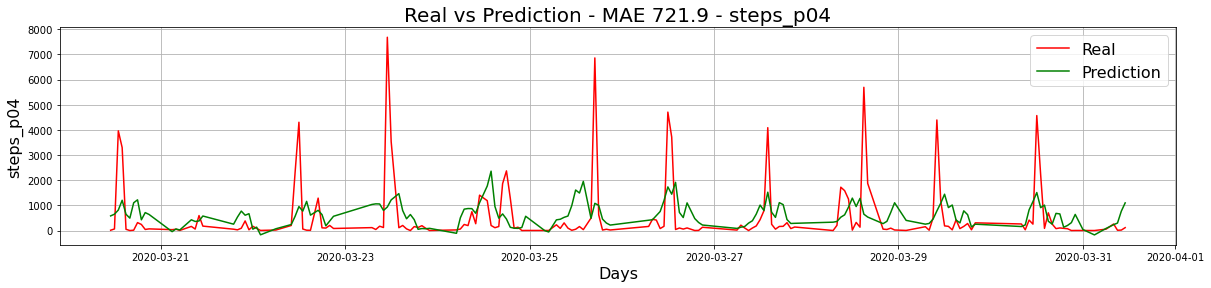

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        782.0            p04
2020-04-02     0    2      4        278.0            p04
2020-04-03     0    3      4        482.0            p04
2020-04-04     0    4      4        339.0            p04
2020-04-05     0    5      4        159.0            p04

In [41]:
#steps prediction
horizon=24*7
X_steps_p04= steps_p04.drop('steps', axis=1)
y_steps_p04 = steps_p04['steps']
    
#take last week of the dataset for validation
X_train_steps_p04, X_test_steps_p04 = X_steps_p04.iloc[:-horizon,:], X_steps_p04.iloc[-horizon:,:]
y_train_steps_p04, y_test_steps_p04 = y_steps_p04.iloc[:-horizon], y_steps_p04.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p04, y_train_steps_p04)
predictions_steps_p04 = model.predict(X_test_steps_p04)

#calculate MAE
mae_steps_p04 =np.round(mean_absolute_error(y_test_steps_p04, predictions_steps_p04),1)    
mape_steps_p04 = (mean_absolute_percentage_error(y_test_steps_p04, predictions_steps_p04))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p04} - steps_p04', fontsize=20)
plt.plot(y_test_steps_p04, color='red')
plt.plot(pd.Series(predictions_steps_p04, index=y_test_steps_p04.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p04', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p04 = pd.DataFrame(fut_date)
date_steps_p04 = date_steps_p04.set_index(date_steps_p04.datetime)
date_steps_p04['hour'] = date_steps_p04.index.hour
date_steps_p04['day'] = date_steps_p04.index.day
date_steps_p04['month'] = date_steps_p04.index.month
date_steps_p04.drop('datetime', axis=1, inplace=True)
predictions_steps_p04 = model.predict(date_steps_p04)
date_steps_p04['predictions'] = np.round(predictions_steps_p04.tolist())
date_steps_p04[predictions_steps_p04<0] = 0
date_steps_p04['Participant_ID']= 'p04'

#Saving file for machine learning
file_to_save_steps = date_steps_p04.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p04/steps_p04.csv')

date_steps_p04.head()

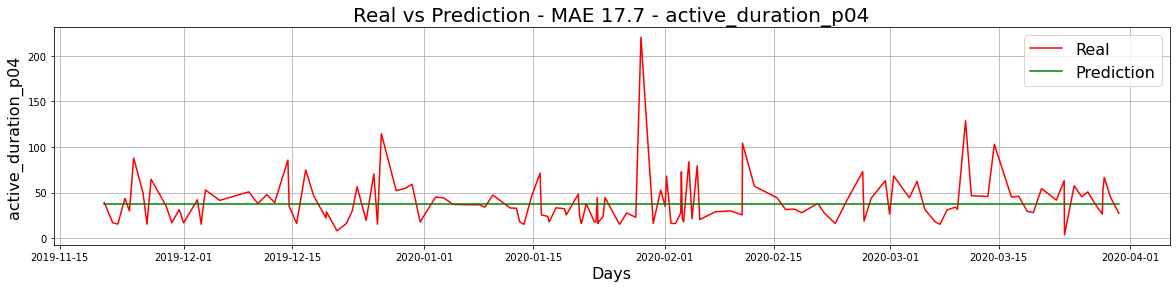

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         37.0            p04
2020-04-02     0    2      4         37.0            p04
2020-04-03     0    3      4         37.0            p04
2020-04-04     0    4      4         37.0            p04
2020-04-05     0    5      4         37.0            p04

In [42]:
#active_duration  prediction
horizon=24*6
X_active_duration_p04= active_duration_p04.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p04 = active_duration_p04['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p04, X_test_active_duration_p04 = X_active_duration_p04.iloc[:-horizon,:], X_active_duration_p04.iloc[-horizon:,:]
y_train_active_duration_p04, y_test_active_duration_p04 = y_active_duration_p04.iloc[:-horizon], y_active_duration_p04.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p04, y_train_active_duration_p04)
predictions_active_duration_p04 = model.predict(X_test_active_duration_p04)

#calculate MAE
mae_active_duration_p04 =np.round(mean_absolute_error(y_test_active_duration_p04, predictions_active_duration_p04),1)    
mape_active_duration_p04 = (mean_absolute_percentage_error(y_test_active_duration_p04, predictions_active_duration_p04))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p04} - active_duration_p04', fontsize=20)
plt.plot(y_test_active_duration_p04, color='red')
plt.plot(pd.Series(predictions_active_duration_p04, index=y_test_active_duration_p04.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p04', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p04 = pd.DataFrame(fut_date)
date_active_duration_p04 = date_active_duration_p04.set_index(date_active_duration_p04.datetime)
date_active_duration_p04['hour'] = date_active_duration_p04.index.hour
date_active_duration_p04['day'] = date_active_duration_p04.index.day
date_active_duration_p04['month'] = date_active_duration_p04.index.month
date_active_duration_p04.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p04 = model.predict(date_active_duration_p04)
date_active_duration_p04['predictions'] = np.round(predictions_active_duration_p04.tolist())
date_active_duration_p04[predictions_active_duration_p04<0] = 0
date_active_duration_p04['Participant_ID']= 'p04'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p04.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p04/active_duration_p04.csv')

date_active_duration_p04.head()

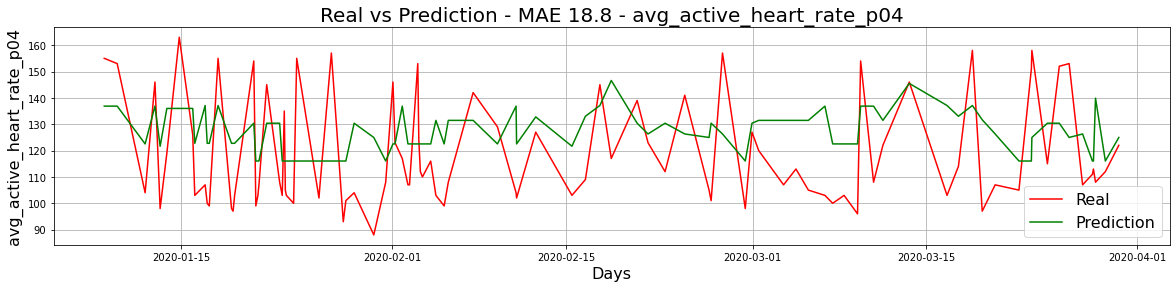

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        123.0            p04
2020-04-02     0    2      4        123.0            p04
2020-04-03     0    3      4        123.0            p04
2020-04-04     0    4      4        123.0            p04
2020-04-05     0    5      4        123.0            p04

In [43]:
#avg_active_heart_rate  prediction
horizon=24*4
X_avg_active_heart_rate_p04= avg_active_heart_rate_p04.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p04 = avg_active_heart_rate_p04['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p04, X_test_avg_active_heart_rate_p04 = X_avg_active_heart_rate_p04.iloc[:-horizon,:], X_avg_active_heart_rate_p04.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p04, y_test_avg_active_heart_rate_p04 = y_avg_active_heart_rate_p04.iloc[:-horizon], y_avg_active_heart_rate_p04.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p04, y_train_avg_active_heart_rate_p04)
predictions_avg_active_heart_rate_p04 = model.predict(X_test_avg_active_heart_rate_p04)

#calculate MAE
mae_avg_active_heart_rate_p04 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p04, predictions_avg_active_heart_rate_p04),1)    
mape_avg_active_heart_rate_p04 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p04, predictions_avg_active_heart_rate_p04))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p04} - avg_active_heart_rate_p04', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p04, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p04, index=y_test_avg_active_heart_rate_p04.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p04', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p04 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p04 = date_avg_active_heart_rate_p04.set_index(date_avg_active_heart_rate_p04.datetime)
date_avg_active_heart_rate_p04['hour'] = date_avg_active_heart_rate_p04.index.hour
date_avg_active_heart_rate_p04['day'] = date_avg_active_heart_rate_p04.index.day
date_avg_active_heart_rate_p04['month'] = date_avg_active_heart_rate_p04.index.month
date_avg_active_heart_rate_p04.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p04 = model.predict(date_avg_active_heart_rate_p04)
date_avg_active_heart_rate_p04['predictions'] = np.round(predictions_avg_active_heart_rate_p04.tolist())
date_avg_active_heart_rate_p04[predictions_avg_active_heart_rate_p04<0] = 0
date_avg_active_heart_rate_p04['Participant_ID']= 'p04'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p04.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p04/avg_active_heart_rate_p04.csv')

date_avg_active_heart_rate_p04.head()

(182, 3)
(134, 2)


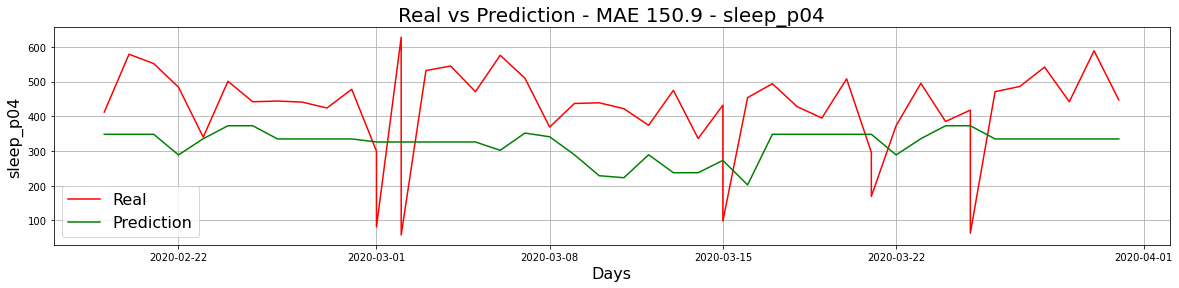

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        326.0            p04
2020-04-02    2      4        326.0            p04
2020-04-03    3      4        326.0            p04
2020-04-04    4      4        326.0            p04
2020-04-05    5      4        326.0            p04

In [44]:
#sleep prediction
horizon=24*2
X_sleep_p04= sleep_p04.drop('Minutes_Asleep', axis=1)
y_sleep_p04 = sleep_p04['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p04, X_test_sleep_p04 = X_sleep_p04.iloc[:-horizon,:], X_sleep_p04.iloc[-horizon:,:]
y_train_sleep_p04, y_test_sleep_p04 = y_sleep_p04.iloc[:-horizon], y_sleep_p04.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p04, y_train_sleep_p04)
predictions_sleep_p04 = model.predict(X_test_sleep_p04)

print(sleep_p04.shape)
print(X_train_sleep_p04.shape)

#calculate MAE
mae_sleep_p04 =np.round(mean_absolute_error(y_test_sleep_p04, predictions_sleep_p04),1)    
mape_sleep_p04 = (mean_absolute_percentage_error(y_test_sleep_p04, predictions_sleep_p04))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p04} - sleep_p04', fontsize=20)
plt.plot(y_test_sleep_p04, color='red')
plt.plot(pd.Series(predictions_sleep_p04, index=y_test_sleep_p04.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p04', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p04 = pd.DataFrame(fut_date)
date_sleep_p04 = date_sleep_p04.set_index(date_sleep_p04.datetime)
#date_sleep_p04['hour'] = date_sleep_p04.index.hour
date_sleep_p04['day'] = date_sleep_p04.index.day
date_sleep_p04['month'] = date_sleep_p04.index.month
date_sleep_p04.drop('datetime', axis=1, inplace=True)
predictions_sleep_p04 = model.predict(date_sleep_p04)
date_sleep_p04['predictions'] = np.round(predictions_sleep_p04.tolist())
date_sleep_p04[predictions_sleep_p04<0] = 0
date_sleep_p04['Participant_ID']= 'p04'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p04.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p04/sleep_p04.csv')

date_sleep_p04.head()

(35, 3)
(15, 2)


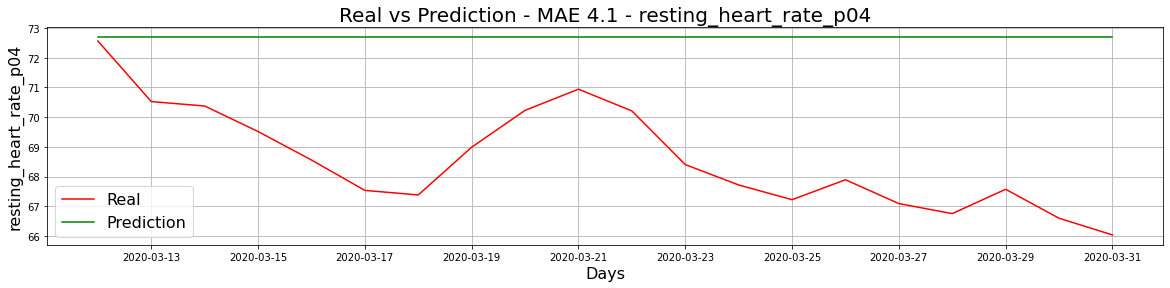

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         73.0            p04
2020-04-02    2      4         73.0            p04
2020-04-03    3      4         73.0            p04
2020-04-04    4      4         73.0            p04
2020-04-05    5      4         73.0            p04

In [45]:
#resting_heart_rate prediction
horizon=20
X_resting_heart_rate_p04= resting_heart_rate_p04.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p04 = resting_heart_rate_p04['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p04, X_test_resting_heart_rate_p04 = X_resting_heart_rate_p04.iloc[:-horizon,:], X_resting_heart_rate_p04.iloc[-horizon:,:]
y_train_resting_heart_rate_p04, y_test_resting_heart_rate_p04 = y_resting_heart_rate_p04.iloc[:-horizon], y_resting_heart_rate_p04.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p04, y_train_resting_heart_rate_p04)
predictions_resting_heart_rate_p04 = model.predict(X_test_resting_heart_rate_p04)

print(resting_heart_rate_p04.shape)
print(X_train_resting_heart_rate_p04.shape)

#calculate MAE
mae_resting_heart_rate_p04 =np.round(mean_absolute_error(y_test_resting_heart_rate_p04, predictions_resting_heart_rate_p04),1)    
mape_resting_heart_rate_p04 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p04, predictions_resting_heart_rate_p04))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p04} - resting_heart_rate_p04', fontsize=20)
plt.plot(y_test_resting_heart_rate_p04, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p04, index=y_test_resting_heart_rate_p04.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p04', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p04 = pd.DataFrame(fut_date)
date_resting_heart_rate_p04 = date_resting_heart_rate_p04.set_index(date_resting_heart_rate_p04.datetime)
#date_resting_heart_rate_p04['hour'] = date_resting_heart_rate_p04.index.hour
date_resting_heart_rate_p04['day'] = date_resting_heart_rate_p04.index.day
date_resting_heart_rate_p04['month'] = date_resting_heart_rate_p04.index.month
date_resting_heart_rate_p04.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p04 = model.predict(date_resting_heart_rate_p04)
date_resting_heart_rate_p04['predictions'] = np.round(predictions_resting_heart_rate_p04.tolist())
date_resting_heart_rate_p04[predictions_resting_heart_rate_p04<0] = 0
date_resting_heart_rate_p04['Participant_ID']= 'p04'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p04.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p04/resting_heart_rate_p04.csv')

date_resting_heart_rate_p04.head()

# Participant 5

In [46]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p05/calories_p05.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p05/distance_p05.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p05/steps_p05.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p05/active_duration_p05.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p05/avg_active_heart_rate_p05.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p05/sleep_p05.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p05/resting_heart_rate_p05.csv'

In [47]:
calories_p05=pd.read_csv(file_to_load1)
distance_p05=pd.read_csv(file_to_load2)
steps_p05=pd.read_csv(file_to_load3)
active_duration_p05=pd.read_csv(file_to_load4)
avg_active_heart_rate_p05=pd.read_csv(file_to_load5)
sleep_p05=pd.read_csv(file_to_load6)
resting_heart_rate_p05=pd.read_csv(file_to_load7)

In [48]:
#Calories
calories_p05['datetime'] = pd.to_datetime(calories_p05['datetime'])
calories_p05 = calories_p05.set_index(calories_p05.datetime)
calories_p05.drop('datetime', axis=1, inplace=True)

#Distance
distance_p05['datetime'] = pd.to_datetime(distance_p05['datetime'])
distance_p05 = distance_p05.set_index(distance_p05.datetime)
distance_p05.drop('datetime', axis=1, inplace=True)

#steps
steps_p05['datetime'] = pd.to_datetime(steps_p05['datetime'])
steps_p05 = steps_p05.set_index(steps_p05.datetime)
steps_p05.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p05['datetime'] = pd.to_datetime(active_duration_p05['datetime'])
active_duration_p05 = active_duration_p05.set_index(active_duration_p05.datetime)
active_duration_p05.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p05['datetime'] = pd.to_datetime(avg_active_heart_rate_p05['datetime'])
avg_active_heart_rate_p05 = avg_active_heart_rate_p05.set_index(avg_active_heart_rate_p05.datetime)
avg_active_heart_rate_p05.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p05['datetime'] = pd.to_datetime(sleep_p05['datetime'])
sleep_p05 = sleep_p05.set_index(sleep_p05.datetime)
sleep_p05.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p05['datetime'] = pd.to_datetime(resting_heart_rate_p05['datetime'])
resting_heart_rate_p05 = resting_heart_rate_p05.set_index(resting_heart_rate_p05.datetime)
resting_heart_rate_p05.drop('datetime', axis=1, inplace=True)

In [49]:
calories_p05 = calories_p05[(calories_p05[['calories']] != 0).any(axis=1)]
distance_p05 = distance_p05[(distance_p05[['distance']] != 0).any(axis=1)]
steps_p05 = steps_p05[(steps_p05[['steps']] != 0).any(axis=1)]
active_duration_p05 = active_duration_p05[(active_duration_p05[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p05 = avg_active_heart_rate_p05[(avg_active_heart_rate_p05[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p05 = sleep_p05[(sleep_p05[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p05 = resting_heart_rate_p05[(resting_heart_rate_p05[['Resting_beats_per_min']] != 0).any(axis=1)]

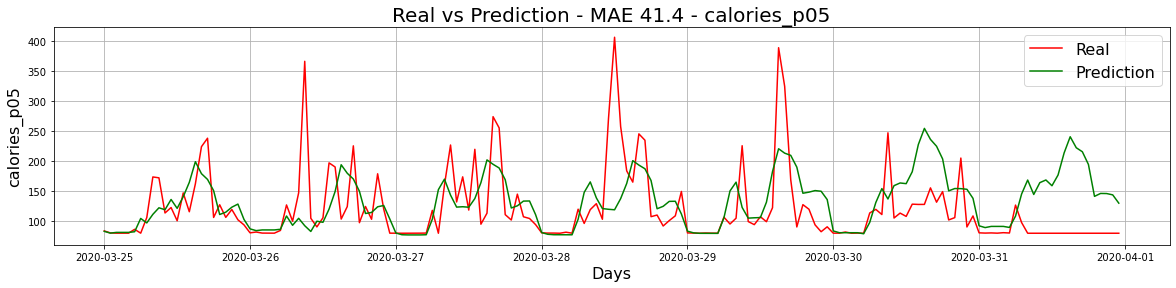

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         92.0            p05
2020-04-02     0    2      4         92.0            p05
2020-04-03     0    3      4         98.0            p05
2020-04-04     0    4      4         96.0            p05
2020-04-05     0    5      4         96.0            p05

In [50]:
#calories prediction
horizon=24*7
X_calories_p05 = calories_p05.drop('calories', axis=1)
y_calories_p05 = calories_p05['calories']
    
#take last week of the dataset for validation
X_train_calories_p05, X_test_calories_p05 = X_calories_p05.iloc[:-horizon,:], X_calories_p05.iloc[-horizon:,:]
y_train_calories_p05, y_test_calories_p05 = y_calories_p05.iloc[:-horizon], y_calories_p05.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p05, y_train_calories_p05)
predictions_calories_p05 = model.predict(X_test_calories_p05)

#calculate MAE
mae_calories_p05 = np.round(mean_absolute_error(y_test_calories_p05, predictions_calories_p05), 1)    
mape_calories_p05 = (mean_absolute_percentage_error(y_test_calories_p05, predictions_calories_p05))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p05} - calories_p05', fontsize=20)
plt.plot(y_test_calories_p05, color='red')
plt.plot(pd.Series(predictions_calories_p05, index=y_test_calories_p05.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p05', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p05 = pd.DataFrame(fut_date)
date_calories_p05 = date_calories_p05.set_index(date_calories_p05.datetime)
date_calories_p05['hour'] = date_calories_p05.index.hour
date_calories_p05['day'] = date_calories_p05.index.day
date_calories_p05['month'] = date_calories_p05.index.month
date_calories_p05.drop('datetime', axis=1, inplace=True)
predictions_calories_p05 = model.predict(date_calories_p05)
date_calories_p05['predictions'] = np.round(predictions_calories_p05.tolist())
date_calories_p05[predictions_calories_p05<0] = 0
date_calories_p05['Participant_ID']= 'p05'

#Saving file for machine learning
file_to_save_calories = date_calories_p05.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p05/calories_p05.csv')

date_calories_p05.head()

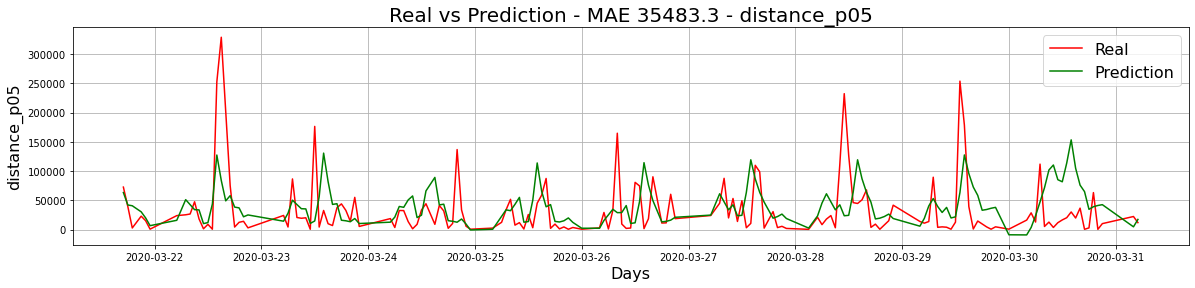

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    0      0          0.0            p05
2020-04-02     0    2      4      10278.0            p05
2020-04-03     0    3      4      16547.0            p05
2020-04-04     0    4      4      13475.0            p05
2020-04-05     0    0      0          0.0            p05

In [51]:
#distance prediction
horizon=24*7
X_distance_p05= distance_p05.drop('distance', axis=1)
y_distance_p05 = distance_p05['distance']
    
#take last week of the dataset for validation
X_train_distance_p05, X_test_distance_p05 = X_distance_p05.iloc[:-horizon,:], X_distance_p05.iloc[-horizon:,:]
y_train_distance_p05, y_test_distance_p05 = y_distance_p05.iloc[:-horizon], y_distance_p05.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p05, y_train_distance_p05)
predictions_distance_p05 = model.predict(X_test_distance_p05)

#calculate MAE
mae_distance_p05 =np.round(mean_absolute_error(y_test_distance_p05, predictions_distance_p05),1)    
mape_distance_p05 = (mean_absolute_percentage_error(y_test_distance_p05, predictions_distance_p05))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p05} - distance_p05', fontsize=20)
plt.plot(y_test_distance_p05, color='red')
plt.plot(pd.Series(predictions_distance_p05, index=y_test_distance_p05.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p05', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p05 = pd.DataFrame(fut_date)
date_distance_p05 = date_distance_p05.set_index(date_distance_p05.datetime)
date_distance_p05['hour'] = date_distance_p05.index.hour
date_distance_p05['day'] = date_distance_p05.index.day
date_distance_p05['month'] = date_distance_p05.index.month
date_distance_p05.drop('datetime', axis=1, inplace=True)
predictions_distance_p05 = model.predict(date_distance_p05)
date_distance_p05['predictions'] = np.round(predictions_distance_p05.tolist())
date_distance_p05[predictions_distance_p05<0] = 0
date_distance_p05['Participant_ID']= 'p05'

#Saving file for machine learning
file_to_save_distance = date_distance_p05.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p05/distance_p05.csv')

date_distance_p05.head()

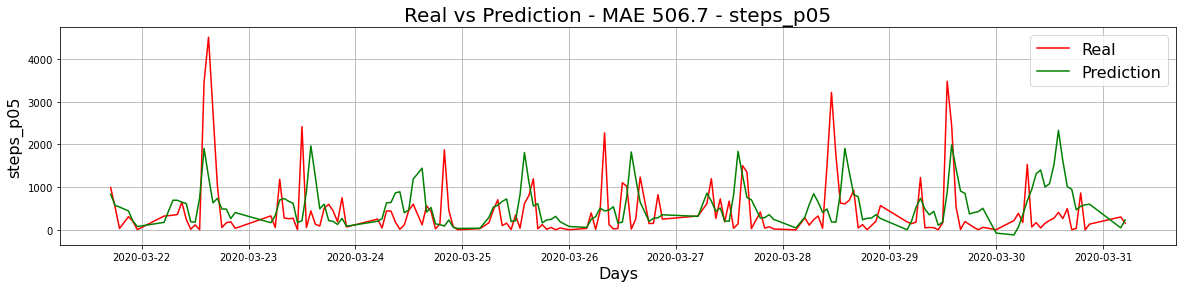

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         39.0            p05
2020-04-02     0    2      4        122.0            p05
2020-04-03     0    3      4        181.0            p05
2020-04-04     0    4      4        111.0            p05
2020-04-05     0    5      4         40.0            p05

In [52]:
#steps prediction
horizon=24*7
X_steps_p05= steps_p05.drop('steps', axis=1)
y_steps_p05 = steps_p05['steps']
    
#take last week of the dataset for validation
X_train_steps_p05, X_test_steps_p05 = X_steps_p05.iloc[:-horizon,:], X_steps_p05.iloc[-horizon:,:]
y_train_steps_p05, y_test_steps_p05 = y_steps_p05.iloc[:-horizon], y_steps_p05.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p05, y_train_steps_p05)
predictions_steps_p05 = model.predict(X_test_steps_p05)

#calculate MAE
mae_steps_p05 =np.round(mean_absolute_error(y_test_steps_p05, predictions_steps_p05),1)    
mape_steps_p05 = (mean_absolute_percentage_error(y_test_steps_p05, predictions_steps_p05))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p05} - steps_p05', fontsize=20)
plt.plot(y_test_steps_p05, color='red')
plt.plot(pd.Series(predictions_steps_p05, index=y_test_steps_p05.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p05', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p05 = pd.DataFrame(fut_date)
date_steps_p05 = date_steps_p05.set_index(date_steps_p05.datetime)
date_steps_p05['hour'] = date_steps_p05.index.hour
date_steps_p05['day'] = date_steps_p05.index.day
date_steps_p05['month'] = date_steps_p05.index.month
date_steps_p05.drop('datetime', axis=1, inplace=True)
predictions_steps_p05 = model.predict(date_steps_p05)
date_steps_p05['predictions'] = np.round(predictions_steps_p05.tolist())
date_steps_p05[predictions_steps_p05<0] = 0
date_steps_p05['Participant_ID']= 'p05'

#Saving file for machine learning
file_to_save_steps = date_steps_p05.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p05/steps_p05.csv')

date_steps_p05.head()

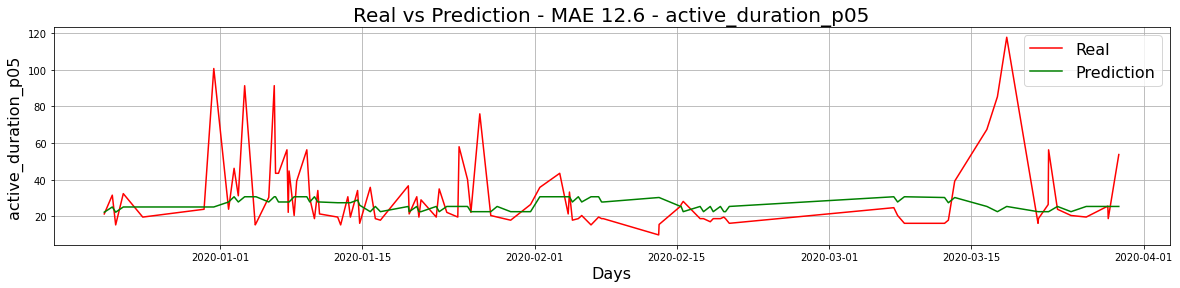

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         31.0            p05
2020-04-02     0    2      4         31.0            p05
2020-04-03     0    3      4         31.0            p05
2020-04-04     0    4      4         31.0            p05
2020-04-05     0    5      4         31.0            p05

In [53]:
#active_duration  prediction
horizon=24*4
X_active_duration_p05= active_duration_p05.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p05 = active_duration_p05['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p05, X_test_active_duration_p05 = X_active_duration_p05.iloc[:-horizon,:], X_active_duration_p05.iloc[-horizon:,:]
y_train_active_duration_p05, y_test_active_duration_p05 = y_active_duration_p05.iloc[:-horizon], y_active_duration_p05.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p05, y_train_active_duration_p05)
predictions_active_duration_p05 = model.predict(X_test_active_duration_p05)

#calculate MAE
mae_active_duration_p05 =np.round(mean_absolute_error(y_test_active_duration_p05, predictions_active_duration_p05),1)    
mape_active_duration_p05 = (mean_absolute_percentage_error(y_test_active_duration_p05, predictions_active_duration_p05))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p05} - active_duration_p05', fontsize=20)
plt.plot(y_test_active_duration_p05, color='red')
plt.plot(pd.Series(predictions_active_duration_p05, index=y_test_active_duration_p05.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p05', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p05 = pd.DataFrame(fut_date)
date_active_duration_p05 = date_active_duration_p05.set_index(date_active_duration_p05.datetime)
date_active_duration_p05['hour'] = date_active_duration_p05.index.hour
date_active_duration_p05['day'] = date_active_duration_p05.index.day
date_active_duration_p05['month'] = date_active_duration_p05.index.month
date_active_duration_p05.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p05 = model.predict(date_active_duration_p05)
date_active_duration_p05['predictions'] = np.round(predictions_active_duration_p05.tolist())
date_active_duration_p05[predictions_active_duration_p05<0] = 0
date_active_duration_p05['Participant_ID']= 'p05'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p05.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p05/active_duration_p05.csv')

date_active_duration_p05.head()

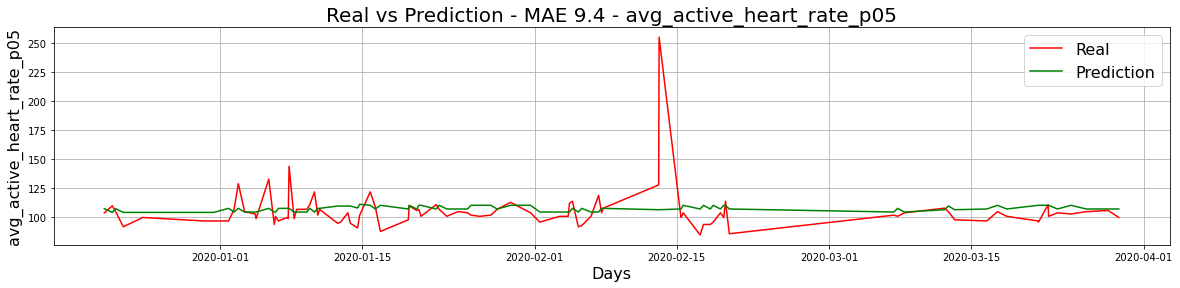

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        105.0            p05
2020-04-02     0    2      4        105.0            p05
2020-04-03     0    3      4        105.0            p05
2020-04-04     0    4      4        105.0            p05
2020-04-05     0    5      4        105.0            p05

In [54]:
#avg_active_heart_rate  prediction
horizon=24*4
X_avg_active_heart_rate_p05= avg_active_heart_rate_p05.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p05 = avg_active_heart_rate_p05['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p05, X_test_avg_active_heart_rate_p05 = X_avg_active_heart_rate_p05.iloc[:-horizon,:], X_avg_active_heart_rate_p05.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p05, y_test_avg_active_heart_rate_p05 = y_avg_active_heart_rate_p05.iloc[:-horizon], y_avg_active_heart_rate_p05.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p05, y_train_avg_active_heart_rate_p05)
predictions_avg_active_heart_rate_p05 = model.predict(X_test_avg_active_heart_rate_p05)

#calculate MAE
mae_avg_active_heart_rate_p05 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p05, predictions_avg_active_heart_rate_p05),1)    
mape_avg_active_heart_rate_p05 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p05, predictions_avg_active_heart_rate_p05))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p05} - avg_active_heart_rate_p05', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p05, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p05, index=y_test_avg_active_heart_rate_p05.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p05', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p05 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p05 = date_avg_active_heart_rate_p05.set_index(date_avg_active_heart_rate_p05.datetime)
date_avg_active_heart_rate_p05['hour'] = date_avg_active_heart_rate_p05.index.hour
date_avg_active_heart_rate_p05['day'] = date_avg_active_heart_rate_p05.index.day
date_avg_active_heart_rate_p05['month'] = date_avg_active_heart_rate_p05.index.month
date_avg_active_heart_rate_p05.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p05 = model.predict(date_avg_active_heart_rate_p05)
date_avg_active_heart_rate_p05['predictions'] = np.round(predictions_avg_active_heart_rate_p05.tolist())
date_avg_active_heart_rate_p05[predictions_avg_active_heart_rate_p05<0] = 0
date_avg_active_heart_rate_p05['Participant_ID']= 'p05'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p05.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p05/avg_active_heart_rate_p05.csv')

date_avg_active_heart_rate_p05.head()

(128, 3)
(80, 2)


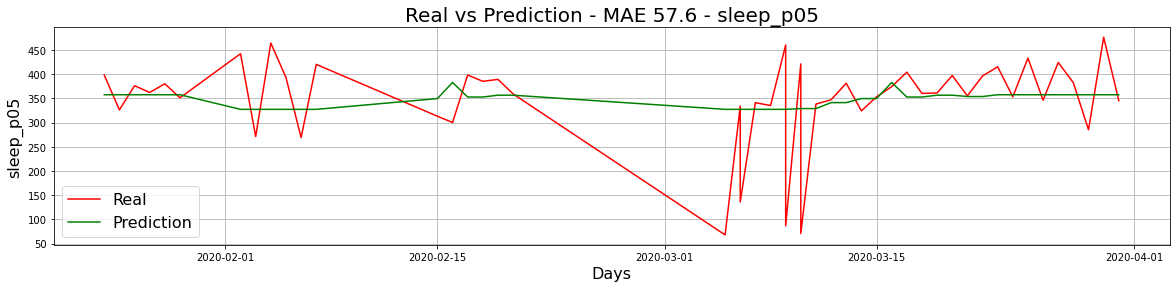

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        327.0            p05
2020-04-02    2      4        327.0            p05
2020-04-03    3      4        327.0            p05
2020-04-04    4      4        327.0            p05
2020-04-05    5      4        327.0            p05

In [55]:
#sleep prediction
horizon=24*2
X_sleep_p05= sleep_p05.drop('Minutes_Asleep', axis=1)
y_sleep_p05 = sleep_p05['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p05, X_test_sleep_p05 = X_sleep_p05.iloc[:-horizon,:], X_sleep_p05.iloc[-horizon:,:]
y_train_sleep_p05, y_test_sleep_p05 = y_sleep_p05.iloc[:-horizon], y_sleep_p05.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p05, y_train_sleep_p05)
predictions_sleep_p05 = model.predict(X_test_sleep_p05)

print(sleep_p05.shape)
print(X_train_sleep_p05.shape)

#calculate MAE
mae_sleep_p05 =np.round(mean_absolute_error(y_test_sleep_p05, predictions_sleep_p05),1)    
mape_sleep_p05 = (mean_absolute_percentage_error(y_test_sleep_p05, predictions_sleep_p05))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p05} - sleep_p05', fontsize=20)
plt.plot(y_test_sleep_p05, color='red')
plt.plot(pd.Series(predictions_sleep_p05, index=y_test_sleep_p05.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p05', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p05 = pd.DataFrame(fut_date)
date_sleep_p05 = date_sleep_p05.set_index(date_sleep_p05.datetime)
#date_sleep_p05['hour'] = date_sleep_p05.index.hour
date_sleep_p05['day'] = date_sleep_p05.index.day
date_sleep_p05['month'] = date_sleep_p05.index.month
date_sleep_p05.drop('datetime', axis=1, inplace=True)
predictions_sleep_p05 = model.predict(date_sleep_p05)
date_sleep_p05['predictions'] = np.round(predictions_sleep_p05.tolist())
date_sleep_p05[predictions_sleep_p05<0] = 0
date_sleep_p05['Participant_ID']= 'p05'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p05.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p05/sleep_p05.csv')

date_sleep_p05.head()

(86, 3)
(71, 2)


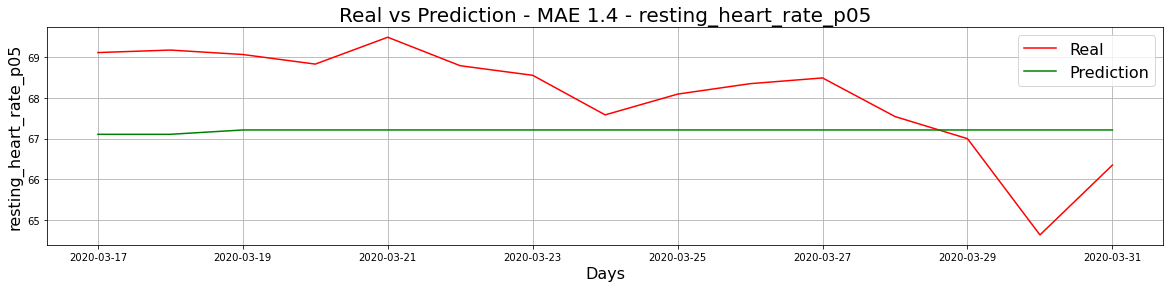

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         65.0            p05
2020-04-02    2      4         65.0            p05
2020-04-03    3      4         65.0            p05
2020-04-04    4      4         65.0            p05
2020-04-05    5      4         65.0            p05

In [56]:
#resting_heart_rate prediction
horizon=15
X_resting_heart_rate_p05= resting_heart_rate_p05.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p05 = resting_heart_rate_p05['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p05, X_test_resting_heart_rate_p05 = X_resting_heart_rate_p05.iloc[:-horizon,:], X_resting_heart_rate_p05.iloc[-horizon:,:]
y_train_resting_heart_rate_p05, y_test_resting_heart_rate_p05 = y_resting_heart_rate_p05.iloc[:-horizon], y_resting_heart_rate_p05.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p05, y_train_resting_heart_rate_p05)
predictions_resting_heart_rate_p05 = model.predict(X_test_resting_heart_rate_p05)

print(resting_heart_rate_p05.shape)
print(X_train_resting_heart_rate_p05.shape)

#calculate MAE
mae_resting_heart_rate_p05 =np.round(mean_absolute_error(y_test_resting_heart_rate_p05, predictions_resting_heart_rate_p05),1)    
mape_resting_heart_rate_p05 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p05, predictions_resting_heart_rate_p05))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p05} - resting_heart_rate_p05', fontsize=20)
plt.plot(y_test_resting_heart_rate_p05, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p05, index=y_test_resting_heart_rate_p05.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p05', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p05 = pd.DataFrame(fut_date)
date_resting_heart_rate_p05 = date_resting_heart_rate_p05.set_index(date_resting_heart_rate_p05.datetime)
#date_resting_heart_rate_p05['hour'] = date_resting_heart_rate_p05.index.hour
date_resting_heart_rate_p05['day'] = date_resting_heart_rate_p05.index.day
date_resting_heart_rate_p05['month'] = date_resting_heart_rate_p05.index.month
date_resting_heart_rate_p05.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p05 = model.predict(date_resting_heart_rate_p05)
date_resting_heart_rate_p05['predictions'] = np.round(predictions_resting_heart_rate_p05.tolist())
date_resting_heart_rate_p05[predictions_resting_heart_rate_p05<0] = 0
date_resting_heart_rate_p05['Participant_ID']= 'p05'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p05.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p05/resting_heart_rate_p05.csv')

date_resting_heart_rate_p05.head()

# Participant 6

In [57]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p06/calories_p06.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p06/distance_p06.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p06/steps_p06.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p06/active_duration_p06.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p06/avg_active_heart_rate_p06.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p06/sleep_p06.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p06/resting_heart_rate_p06.csv'

In [58]:
calories_p06=pd.read_csv(file_to_load1)
distance_p06=pd.read_csv(file_to_load2)
steps_p06=pd.read_csv(file_to_load3)
active_duration_p06=pd.read_csv(file_to_load4)
avg_active_heart_rate_p06=pd.read_csv(file_to_load5)
sleep_p06=pd.read_csv(file_to_load6)
resting_heart_rate_p06=pd.read_csv(file_to_load7)

In [59]:
#Calories
calories_p06['datetime'] = pd.to_datetime(calories_p06['datetime'])
calories_p06 = calories_p06.set_index(calories_p06.datetime)
calories_p06.drop('datetime', axis=1, inplace=True)

#Distance
distance_p06['datetime'] = pd.to_datetime(distance_p06['datetime'])
distance_p06 = distance_p06.set_index(distance_p06.datetime)
distance_p06.drop('datetime', axis=1, inplace=True)

#steps
steps_p06['datetime'] = pd.to_datetime(steps_p06['datetime'])
steps_p06 = steps_p06.set_index(steps_p06.datetime)
steps_p06.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p06['datetime'] = pd.to_datetime(active_duration_p06['datetime'])
active_duration_p06 = active_duration_p06.set_index(active_duration_p06.datetime)
active_duration_p06.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p06['datetime'] = pd.to_datetime(avg_active_heart_rate_p06['datetime'])
avg_active_heart_rate_p06 = avg_active_heart_rate_p06.set_index(avg_active_heart_rate_p06.datetime)
avg_active_heart_rate_p06.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p06['datetime'] = pd.to_datetime(sleep_p06['datetime'])
sleep_p06 = sleep_p06.set_index(sleep_p06.datetime)
sleep_p06.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p06['datetime'] = pd.to_datetime(resting_heart_rate_p06['datetime'])
resting_heart_rate_p06 = resting_heart_rate_p06.set_index(resting_heart_rate_p06.datetime)
resting_heart_rate_p06.drop('datetime', axis=1, inplace=True)

In [60]:
calories_p06 = calories_p06[(calories_p06[['calories']] != 0).any(axis=1)]
distance_p06 = distance_p06[(distance_p06[['distance']] != 0).any(axis=1)]
steps_p06 = steps_p06[(steps_p06[['steps']] != 0).any(axis=1)]
active_duration_p06 = active_duration_p06[(active_duration_p06[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p06 = avg_active_heart_rate_p06[(avg_active_heart_rate_p06[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p06 = sleep_p06[(sleep_p06[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p06 = resting_heart_rate_p06[(resting_heart_rate_p06[['Resting_beats_per_min']] != 0).any(axis=1)]

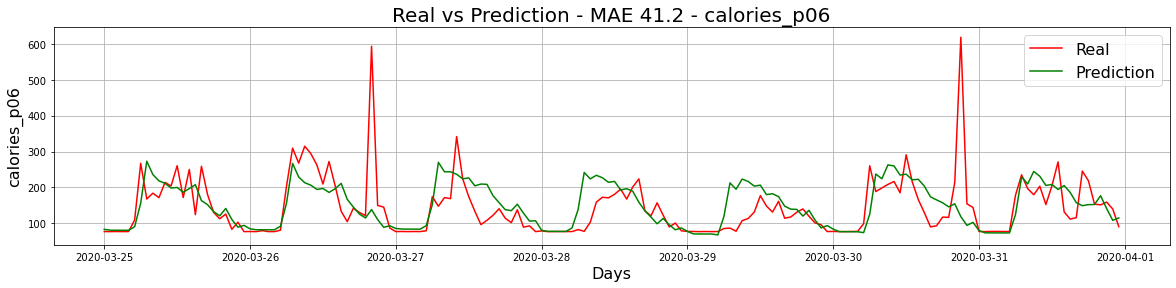

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         85.0            p06
2020-04-02     0    2      4         85.0            p06
2020-04-03     0    3      4         86.0            p06
2020-04-04     0    4      4         82.0            p06
2020-04-05     0    5      4         80.0            p06

In [61]:
#calories prediction
horizon=24*7
X_calories_p06 = calories_p06.drop('calories', axis=1)
y_calories_p06 = calories_p06['calories']
    
#take last week of the dataset for validation
X_train_calories_p06, X_test_calories_p06 = X_calories_p06.iloc[:-horizon,:], X_calories_p06.iloc[-horizon:,:]
y_train_calories_p06, y_test_calories_p06 = y_calories_p06.iloc[:-horizon], y_calories_p06.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p06, y_train_calories_p06)
predictions_calories_p06 = model.predict(X_test_calories_p06)

#calculate MAE
mae_calories_p06 = np.round(mean_absolute_error(y_test_calories_p06, predictions_calories_p06), 1)    
mape_calories_p06 = (mean_absolute_percentage_error(y_test_calories_p06, predictions_calories_p06))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p06} - calories_p06', fontsize=20)
plt.plot(y_test_calories_p06, color='red')
plt.plot(pd.Series(predictions_calories_p06, index=y_test_calories_p06.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p06', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p06 = pd.DataFrame(fut_date)
date_calories_p06 = date_calories_p06.set_index(date_calories_p06.datetime)
date_calories_p06['hour'] = date_calories_p06.index.hour
date_calories_p06['day'] = date_calories_p06.index.day
date_calories_p06['month'] = date_calories_p06.index.month
date_calories_p06.drop('datetime', axis=1, inplace=True)
predictions_calories_p06 = model.predict(date_calories_p06)
date_calories_p06['predictions'] = np.round(predictions_calories_p06.tolist())
date_calories_p06[predictions_calories_p06<0] = 0
date_calories_p06['Participant_ID']= 'p06'

#Saving file for machine learning
file_to_save_calories = date_calories_p06.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p06/calories_p06.csv')

date_calories_p06.head()

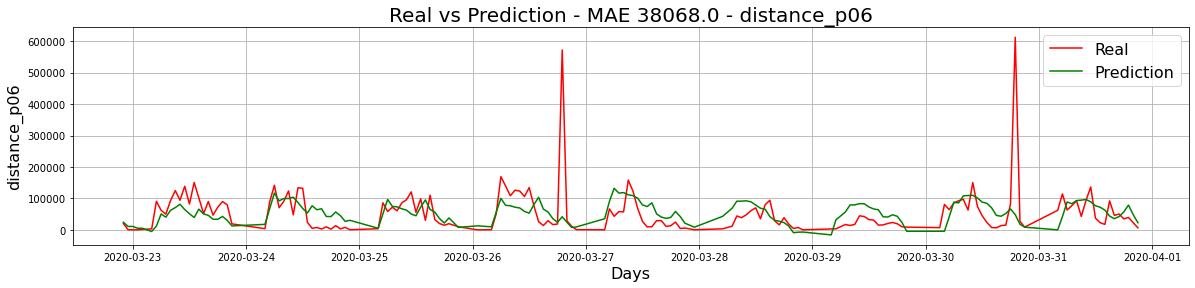

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    0      0          0.0            p06
2020-04-02     0    0      0          0.0            p06
2020-04-03     0    3      4       1887.0            p06
2020-04-04     0    4      4      12139.0            p06
2020-04-05     0    5      4      32664.0            p06

In [62]:
#distance prediction
horizon=24*7
X_distance_p06= distance_p06.drop('distance', axis=1)
y_distance_p06 = distance_p06['distance']
    
#take last week of the dataset for validation
X_train_distance_p06, X_test_distance_p06 = X_distance_p06.iloc[:-horizon,:], X_distance_p06.iloc[-horizon:,:]
y_train_distance_p06, y_test_distance_p06 = y_distance_p06.iloc[:-horizon], y_distance_p06.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p06, y_train_distance_p06)
predictions_distance_p06 = model.predict(X_test_distance_p06)

#calculate MAE
mae_distance_p06 =np.round(mean_absolute_error(y_test_distance_p06, predictions_distance_p06),1)    
mape_distance_p06 = (mean_absolute_percentage_error(y_test_distance_p06, predictions_distance_p06))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p06} - distance_p06', fontsize=20)
plt.plot(y_test_distance_p06, color='red')
plt.plot(pd.Series(predictions_distance_p06, index=y_test_distance_p06.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p06', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p06 = pd.DataFrame(fut_date)
date_distance_p06 = date_distance_p06.set_index(date_distance_p06.datetime)
date_distance_p06['hour'] = date_distance_p06.index.hour
date_distance_p06['day'] = date_distance_p06.index.day
date_distance_p06['month'] = date_distance_p06.index.month
date_distance_p06.drop('datetime', axis=1, inplace=True)
predictions_distance_p06 = model.predict(date_distance_p06)
date_distance_p06['predictions'] = np.round(predictions_distance_p06.tolist())
date_distance_p06[predictions_distance_p06<0] = 0
date_distance_p06['Participant_ID']= 'p06'

#Saving file for machine learning
file_to_save_distance = date_distance_p06.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p06/distance_p06.csv')

date_distance_p06.head()

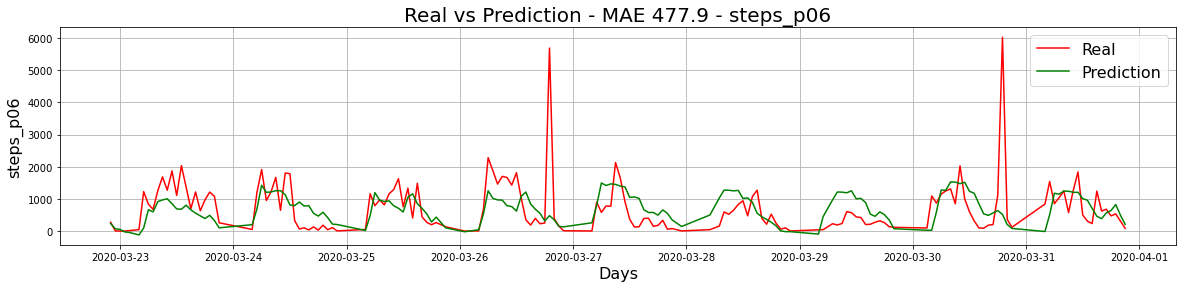

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    0      0          0.0            p06
2020-04-02     0    0      0          0.0            p06
2020-04-03     0    0      0          0.0            p06
2020-04-04     0    4      4         80.0            p06
2020-04-05     0    5      4        427.0            p06

In [63]:
#steps prediction
horizon=24*7
X_steps_p06= steps_p06.drop('steps', axis=1)
y_steps_p06 = steps_p06['steps']
    
#take last week of the dataset for validation
X_train_steps_p06, X_test_steps_p06 = X_steps_p06.iloc[:-horizon,:], X_steps_p06.iloc[-horizon:,:]
y_train_steps_p06, y_test_steps_p06 = y_steps_p06.iloc[:-horizon], y_steps_p06.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p06, y_train_steps_p06)
predictions_steps_p06 = model.predict(X_test_steps_p06)

#calculate MAE
mae_steps_p06 =np.round(mean_absolute_error(y_test_steps_p06, predictions_steps_p06),1)    
mape_steps_p06 = (mean_absolute_percentage_error(y_test_steps_p06, predictions_steps_p06))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p06} - steps_p06', fontsize=20)
plt.plot(y_test_steps_p06, color='red')
plt.plot(pd.Series(predictions_steps_p06, index=y_test_steps_p06.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p06', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p06 = pd.DataFrame(fut_date)
date_steps_p06 = date_steps_p06.set_index(date_steps_p06.datetime)
date_steps_p06['hour'] = date_steps_p06.index.hour
date_steps_p06['day'] = date_steps_p06.index.day
date_steps_p06['month'] = date_steps_p06.index.month
date_steps_p06.drop('datetime', axis=1, inplace=True)
predictions_steps_p06 = model.predict(date_steps_p06)
date_steps_p06['predictions'] = np.round(predictions_steps_p06.tolist())
date_steps_p06[predictions_steps_p06<0] = 0
date_steps_p06['Participant_ID']= 'p06'

#Saving file for machine learning
file_to_save_steps = date_steps_p06.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p06/steps_p06.csv')

date_steps_p06.head()

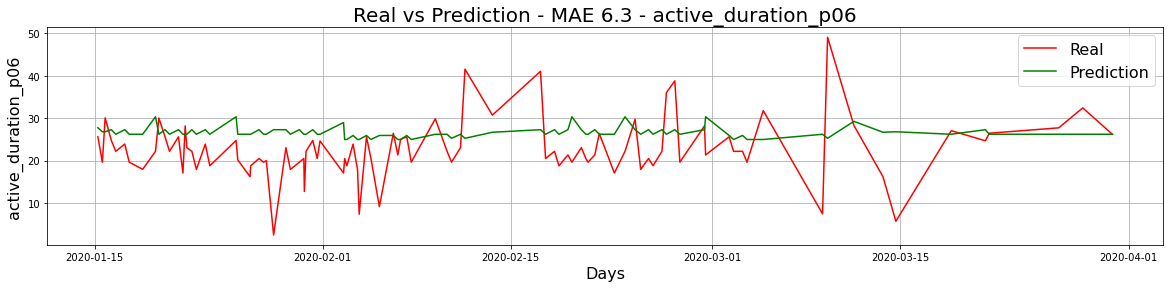

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         26.0            p06
2020-04-02     0    2      4         26.0            p06
2020-04-03     0    3      4         26.0            p06
2020-04-04     0    4      4         26.0            p06
2020-04-05     0    5      4         26.0            p06

In [64]:
#active_duration  prediction
horizon=24*4
X_active_duration_p06= active_duration_p06.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p06 = active_duration_p06['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p06, X_test_active_duration_p06 = X_active_duration_p06.iloc[:-horizon,:], X_active_duration_p06.iloc[-horizon:,:]
y_train_active_duration_p06, y_test_active_duration_p06 = y_active_duration_p06.iloc[:-horizon], y_active_duration_p06.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p06, y_train_active_duration_p06)
predictions_active_duration_p06 = model.predict(X_test_active_duration_p06)

#calculate MAE
mae_active_duration_p06 =np.round(mean_absolute_error(y_test_active_duration_p06, predictions_active_duration_p06),1)    
mape_active_duration_p06 = (mean_absolute_percentage_error(y_test_active_duration_p06, predictions_active_duration_p06))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p06} - active_duration_p06', fontsize=20)
plt.plot(y_test_active_duration_p06, color='red')
plt.plot(pd.Series(predictions_active_duration_p06, index=y_test_active_duration_p06.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p06', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p06 = pd.DataFrame(fut_date)
date_active_duration_p06 = date_active_duration_p06.set_index(date_active_duration_p06.datetime)
date_active_duration_p06['hour'] = date_active_duration_p06.index.hour
date_active_duration_p06['day'] = date_active_duration_p06.index.day
date_active_duration_p06['month'] = date_active_duration_p06.index.month
date_active_duration_p06.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p06 = model.predict(date_active_duration_p06)
date_active_duration_p06['predictions'] = np.round(predictions_active_duration_p06.tolist())
date_active_duration_p06[predictions_active_duration_p06<0] = 0
date_active_duration_p06['Participant_ID']= 'p06'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p06.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p06/active_duration_p06.csv')

date_active_duration_p06.head()

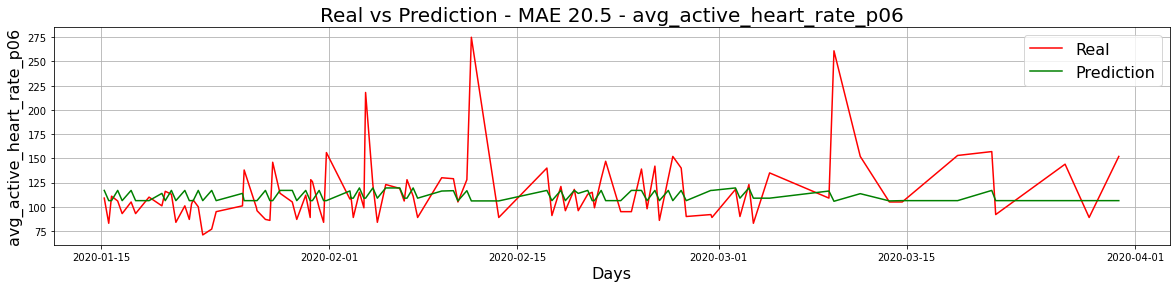

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        119.0            p06
2020-04-02     0    2      4        119.0            p06
2020-04-03     0    3      4        119.0            p06
2020-04-04     0    4      4        119.0            p06
2020-04-05     0    5      4        119.0            p06

In [65]:
#avg_active_heart_rate  prediction
horizon=24*4
X_avg_active_heart_rate_p06= avg_active_heart_rate_p06.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p06 = avg_active_heart_rate_p06['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p06, X_test_avg_active_heart_rate_p06 = X_avg_active_heart_rate_p06.iloc[:-horizon,:], X_avg_active_heart_rate_p06.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p06, y_test_avg_active_heart_rate_p06 = y_avg_active_heart_rate_p06.iloc[:-horizon], y_avg_active_heart_rate_p06.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p06, y_train_avg_active_heart_rate_p06)
predictions_avg_active_heart_rate_p06 = model.predict(X_test_avg_active_heart_rate_p06)

#calculate MAE
mae_avg_active_heart_rate_p06 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p06, predictions_avg_active_heart_rate_p06),1)    
mape_avg_active_heart_rate_p06 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p06, predictions_avg_active_heart_rate_p06))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p06} - avg_active_heart_rate_p06', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p06, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p06, index=y_test_avg_active_heart_rate_p06.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p06', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p06 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p06 = date_avg_active_heart_rate_p06.set_index(date_avg_active_heart_rate_p06.datetime)
date_avg_active_heart_rate_p06['hour'] = date_avg_active_heart_rate_p06.index.hour
date_avg_active_heart_rate_p06['day'] = date_avg_active_heart_rate_p06.index.day
date_avg_active_heart_rate_p06['month'] = date_avg_active_heart_rate_p06.index.month
date_avg_active_heart_rate_p06.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p06 = model.predict(date_avg_active_heart_rate_p06)
date_avg_active_heart_rate_p06['predictions'] = np.round(predictions_avg_active_heart_rate_p06.tolist())
date_avg_active_heart_rate_p06[predictions_avg_active_heart_rate_p06<0] = 0
date_avg_active_heart_rate_p06['Participant_ID']= 'p06'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p06.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p06/avg_active_heart_rate_p06.csv')

date_avg_active_heart_rate_p06.head()

(160, 3)
(112, 2)


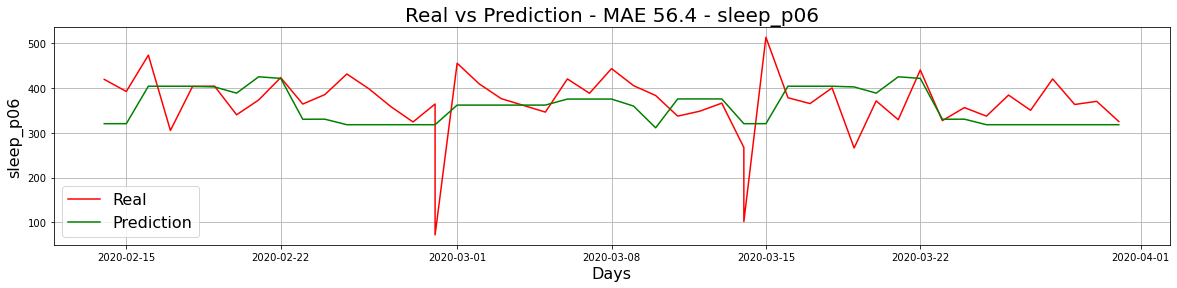

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        362.0            p06
2020-04-02    2      4        362.0            p06
2020-04-03    3      4        362.0            p06
2020-04-04    4      4        362.0            p06
2020-04-05    5      4        362.0            p06

In [66]:
#sleep prediction
horizon=24*2
X_sleep_p06= sleep_p06.drop('Minutes_Asleep', axis=1)
y_sleep_p06 = sleep_p06['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p06, X_test_sleep_p06 = X_sleep_p06.iloc[:-horizon,:], X_sleep_p06.iloc[-horizon:,:]
y_train_sleep_p06, y_test_sleep_p06 = y_sleep_p06.iloc[:-horizon], y_sleep_p06.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p06, y_train_sleep_p06)
predictions_sleep_p06 = model.predict(X_test_sleep_p06)

print(sleep_p06.shape)
print(X_train_sleep_p06.shape)

#calculate MAE
mae_sleep_p06 =np.round(mean_absolute_error(y_test_sleep_p06, predictions_sleep_p06),1)    
mape_sleep_p06 = (mean_absolute_percentage_error(y_test_sleep_p06, predictions_sleep_p06))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p06} - sleep_p06', fontsize=20)
plt.plot(y_test_sleep_p06, color='red')
plt.plot(pd.Series(predictions_sleep_p06, index=y_test_sleep_p06.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p06', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p06 = pd.DataFrame(fut_date)
date_sleep_p06 = date_sleep_p06.set_index(date_sleep_p06.datetime)
#date_sleep_p06['hour'] = date_sleep_p06.index.hour
date_sleep_p06['day'] = date_sleep_p06.index.day
date_sleep_p06['month'] = date_sleep_p06.index.month
date_sleep_p06.drop('datetime', axis=1, inplace=True)
predictions_sleep_p06 = model.predict(date_sleep_p06)
date_sleep_p06['predictions'] = np.round(predictions_sleep_p06.tolist())
date_sleep_p06[predictions_sleep_p06<0] = 0
date_sleep_p06['Participant_ID']= 'p06'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p06.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p06/sleep_p06.csv')

date_sleep_p06.head()

(150, 3)
(135, 2)


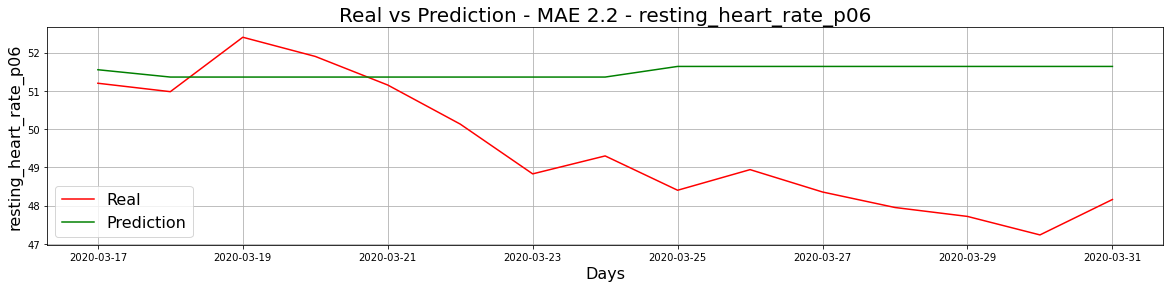

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         52.0            p06
2020-04-02    2      4         52.0            p06
2020-04-03    3      4         52.0            p06
2020-04-04    4      4         52.0            p06
2020-04-05    5      4         52.0            p06

In [67]:
#resting_heart_rate prediction
horizon=15
X_resting_heart_rate_p06= resting_heart_rate_p06.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p06 = resting_heart_rate_p06['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p06, X_test_resting_heart_rate_p06 = X_resting_heart_rate_p06.iloc[:-horizon,:], X_resting_heart_rate_p06.iloc[-horizon:,:]
y_train_resting_heart_rate_p06, y_test_resting_heart_rate_p06 = y_resting_heart_rate_p06.iloc[:-horizon], y_resting_heart_rate_p06.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p06, y_train_resting_heart_rate_p06)
predictions_resting_heart_rate_p06 = model.predict(X_test_resting_heart_rate_p06)

print(resting_heart_rate_p06.shape)
print(X_train_resting_heart_rate_p06.shape)

#calculate MAE
mae_resting_heart_rate_p06 =np.round(mean_absolute_error(y_test_resting_heart_rate_p06, predictions_resting_heart_rate_p06),1)    
mape_resting_heart_rate_p06 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p06, predictions_resting_heart_rate_p06))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p06} - resting_heart_rate_p06', fontsize=20)
plt.plot(y_test_resting_heart_rate_p06, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p06, index=y_test_resting_heart_rate_p06.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p06', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p06 = pd.DataFrame(fut_date)
date_resting_heart_rate_p06 = date_resting_heart_rate_p06.set_index(date_resting_heart_rate_p06.datetime)
#date_resting_heart_rate_p06['hour'] = date_resting_heart_rate_p06.index.hour
date_resting_heart_rate_p06['day'] = date_resting_heart_rate_p06.index.day
date_resting_heart_rate_p06['month'] = date_resting_heart_rate_p06.index.month
date_resting_heart_rate_p06.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p06 = model.predict(date_resting_heart_rate_p06)
date_resting_heart_rate_p06['predictions'] = np.round(predictions_resting_heart_rate_p06.tolist())
date_resting_heart_rate_p06[predictions_resting_heart_rate_p06<0] = 0
date_resting_heart_rate_p06['Participant_ID']= 'p06'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p06.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p06/resting_heart_rate_p06.csv')

date_resting_heart_rate_p06.head()

# Participant 7

In [68]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p07/calories_p07.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p07/distance_p07.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p07/steps_p07.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p07/active_duration_p07.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p07/avg_active_heart_rate_p07.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p07/sleep_p07.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p07/resting_heart_rate_p07.csv'

In [69]:
calories_p07=pd.read_csv(file_to_load1)
distance_p07=pd.read_csv(file_to_load2)
steps_p07=pd.read_csv(file_to_load3)
active_duration_p07=pd.read_csv(file_to_load4)
avg_active_heart_rate_p07=pd.read_csv(file_to_load5)
sleep_p07=pd.read_csv(file_to_load6)
resting_heart_rate_p07=pd.read_csv(file_to_load7)

In [70]:
#Calories
calories_p07['datetime'] = pd.to_datetime(calories_p07['datetime'])
calories_p07 = calories_p07.set_index(calories_p07.datetime)
calories_p07.drop('datetime', axis=1, inplace=True)

#Distance
distance_p07['datetime'] = pd.to_datetime(distance_p07['datetime'])
distance_p07 = distance_p07.set_index(distance_p07.datetime)
distance_p07.drop('datetime', axis=1, inplace=True)

#steps
steps_p07['datetime'] = pd.to_datetime(steps_p07['datetime'])
steps_p07 = steps_p07.set_index(steps_p07.datetime)
steps_p07.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p07['datetime'] = pd.to_datetime(active_duration_p07['datetime'])
active_duration_p07 = active_duration_p07.set_index(active_duration_p07.datetime)
active_duration_p07.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p07['datetime'] = pd.to_datetime(avg_active_heart_rate_p07['datetime'])
avg_active_heart_rate_p07 = avg_active_heart_rate_p07.set_index(avg_active_heart_rate_p07.datetime)
avg_active_heart_rate_p07.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p07['datetime'] = pd.to_datetime(sleep_p07['datetime'])
sleep_p07 = sleep_p07.set_index(sleep_p07.datetime)
sleep_p07.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p07['datetime'] = pd.to_datetime(resting_heart_rate_p07['datetime'])
resting_heart_rate_p07 = resting_heart_rate_p07.set_index(resting_heart_rate_p07.datetime)
resting_heart_rate_p07.drop('datetime', axis=1, inplace=True)

In [71]:
calories_p07 = calories_p07[(calories_p07[['calories']] != 0).any(axis=1)]
distance_p07 = distance_p07[(distance_p07[['distance']] != 0).any(axis=1)]
steps_p07 = steps_p07[(steps_p07[['steps']] != 0).any(axis=1)]
active_duration_p07 = active_duration_p07[(active_duration_p07[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p07 = avg_active_heart_rate_p07[(avg_active_heart_rate_p07[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p07 = sleep_p07[(sleep_p07[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p07 = resting_heart_rate_p07[(resting_heart_rate_p07[['Resting_beats_per_min']] != 0).any(axis=1)]

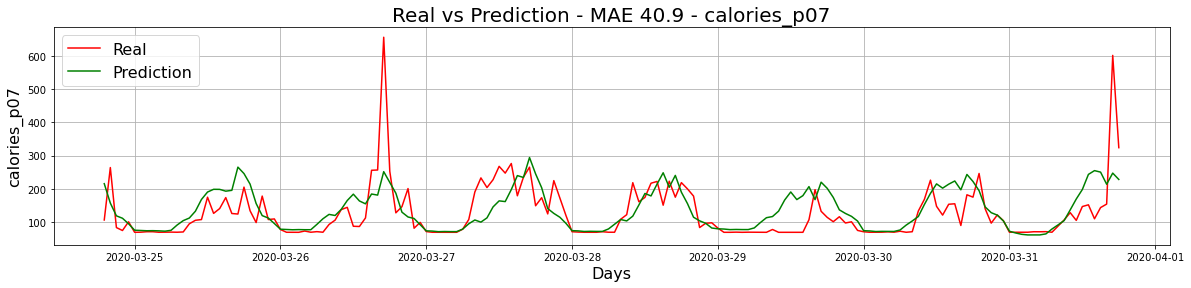

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        100.0            p07
2020-04-02     0    2      4         94.0            p07
2020-04-03     0    3      4         77.0            p07
2020-04-04     0    4      4         78.0            p07
2020-04-05     0    5      4         76.0            p07

In [72]:
#calories prediction
horizon=24*7
X_calories_p07 = calories_p07.drop('calories', axis=1)
y_calories_p07 = calories_p07['calories']
    
#take last week of the dataset for validation
X_train_calories_p07, X_test_calories_p07 = X_calories_p07.iloc[:-horizon,:], X_calories_p07.iloc[-horizon:,:]
y_train_calories_p07, y_test_calories_p07 = y_calories_p07.iloc[:-horizon], y_calories_p07.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p07, y_train_calories_p07)
predictions_calories_p07 = model.predict(X_test_calories_p07)

#calculate MAE
mae_calories_p07 = np.round(mean_absolute_error(y_test_calories_p07, predictions_calories_p07), 1)    
mape_calories_p07 = (mean_absolute_percentage_error(y_test_calories_p07, predictions_calories_p07))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p07} - calories_p07', fontsize=20)
plt.plot(y_test_calories_p07, color='red')
plt.plot(pd.Series(predictions_calories_p07, index=y_test_calories_p07.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p07', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p07 = pd.DataFrame(fut_date)
date_calories_p07 = date_calories_p07.set_index(date_calories_p07.datetime)
date_calories_p07['hour'] = date_calories_p07.index.hour
date_calories_p07['day'] = date_calories_p07.index.day
date_calories_p07['month'] = date_calories_p07.index.month
date_calories_p07.drop('datetime', axis=1, inplace=True)
predictions_calories_p07 = model.predict(date_calories_p07)
date_calories_p07['predictions'] = np.round(predictions_calories_p07.tolist())
date_calories_p07[predictions_calories_p07<0] = 0
date_calories_p07['Participant_ID']= 'p07'

#Saving file for machine learning
file_to_save_calories = date_calories_p07.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p07/calories_p07.csv')

date_calories_p07.head()

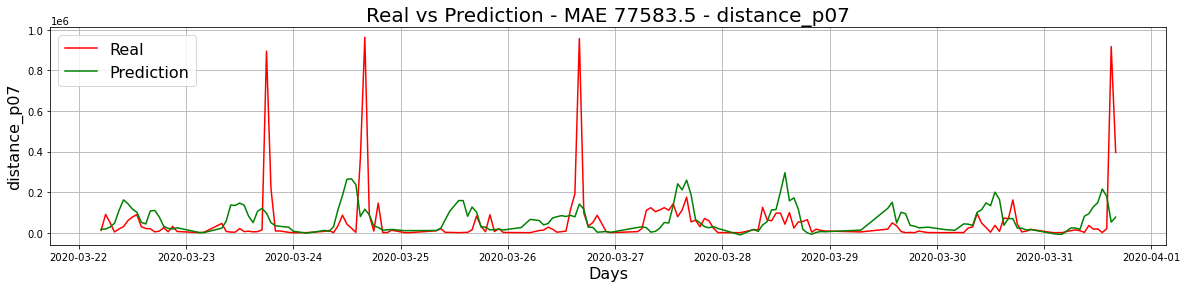

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4      22041.0            p07
2020-04-02     0    2      4      38660.0            p07
2020-04-03     0    3      4      31506.0            p07
2020-04-04     0    4      4       6030.0            p07
2020-04-05     0    5      4       8556.0            p07

In [73]:
#distance prediction
horizon=24*7
X_distance_p07= distance_p07.drop('distance', axis=1)
y_distance_p07 = distance_p07['distance']
    
#take last week of the dataset for validation
X_train_distance_p07, X_test_distance_p07 = X_distance_p07.iloc[:-horizon,:], X_distance_p07.iloc[-horizon:,:]
y_train_distance_p07, y_test_distance_p07 = y_distance_p07.iloc[:-horizon], y_distance_p07.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p07, y_train_distance_p07)
predictions_distance_p07 = model.predict(X_test_distance_p07)

#calculate MAE
mae_distance_p07 =np.round(mean_absolute_error(y_test_distance_p07, predictions_distance_p07),1)    
mape_distance_p07 = (mean_absolute_percentage_error(y_test_distance_p07, predictions_distance_p07))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p07} - distance_p07', fontsize=20)
plt.plot(y_test_distance_p07, color='red')
plt.plot(pd.Series(predictions_distance_p07, index=y_test_distance_p07.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p07', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p07 = pd.DataFrame(fut_date)
date_distance_p07 = date_distance_p07.set_index(date_distance_p07.datetime)
date_distance_p07['hour'] = date_distance_p07.index.hour
date_distance_p07['day'] = date_distance_p07.index.day
date_distance_p07['month'] = date_distance_p07.index.month
date_distance_p07.drop('datetime', axis=1, inplace=True)
predictions_distance_p07 = model.predict(date_distance_p07)
date_distance_p07['predictions'] = np.round(predictions_distance_p07.tolist())
date_distance_p07[predictions_distance_p07<0] = 0
date_distance_p07['Participant_ID']= 'p07'

#Saving file for machine learning
file_to_save_distance = date_distance_p07.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p07/distance_p07.csv')

date_distance_p07.head()

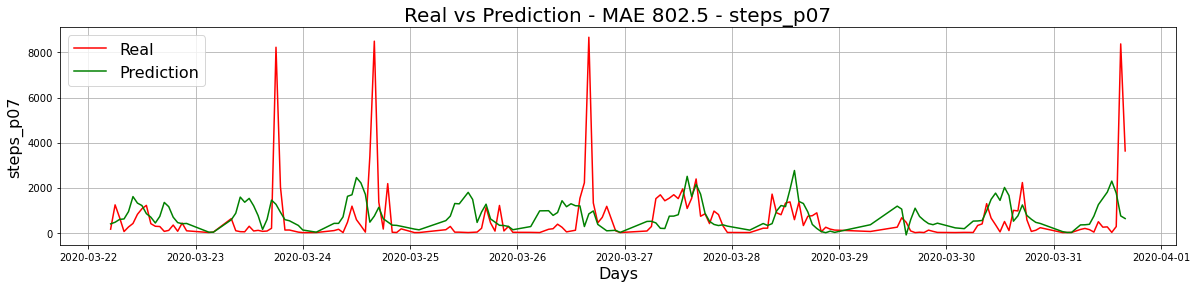

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        312.0            p07
2020-04-02     0    2      4        330.0            p07
2020-04-03     0    3      4        249.0            p07
2020-04-04     0    4      4        197.0            p07
2020-04-05     0    5      4        241.0            p07

In [74]:
#steps prediction
horizon=24*7
X_steps_p07= steps_p07.drop('steps', axis=1)
y_steps_p07 = steps_p07['steps']
    
#take last week of the dataset for validation
X_train_steps_p07, X_test_steps_p07 = X_steps_p07.iloc[:-horizon,:], X_steps_p07.iloc[-horizon:,:]
y_train_steps_p07, y_test_steps_p07 = y_steps_p07.iloc[:-horizon], y_steps_p07.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p07, y_train_steps_p07)
predictions_steps_p07 = model.predict(X_test_steps_p07)

#calculate MAE
mae_steps_p07 =np.round(mean_absolute_error(y_test_steps_p07, predictions_steps_p07),1)    
mape_steps_p07 = (mean_absolute_percentage_error(y_test_steps_p07, predictions_steps_p07))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p07} - steps_p07', fontsize=20)
plt.plot(y_test_steps_p07, color='red')
plt.plot(pd.Series(predictions_steps_p07, index=y_test_steps_p07.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p07', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p07 = pd.DataFrame(fut_date)
date_steps_p07 = date_steps_p07.set_index(date_steps_p07.datetime)
date_steps_p07['hour'] = date_steps_p07.index.hour
date_steps_p07['day'] = date_steps_p07.index.day
date_steps_p07['month'] = date_steps_p07.index.month
date_steps_p07.drop('datetime', axis=1, inplace=True)
predictions_steps_p07 = model.predict(date_steps_p07)
date_steps_p07['predictions'] = np.round(predictions_steps_p07.tolist())
date_steps_p07[predictions_steps_p07<0] = 0
date_steps_p07['Participant_ID']= 'p07'

#Saving file for machine learning
file_to_save_steps = date_steps_p07.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p07/steps_p07.csv')

date_steps_p07.head()

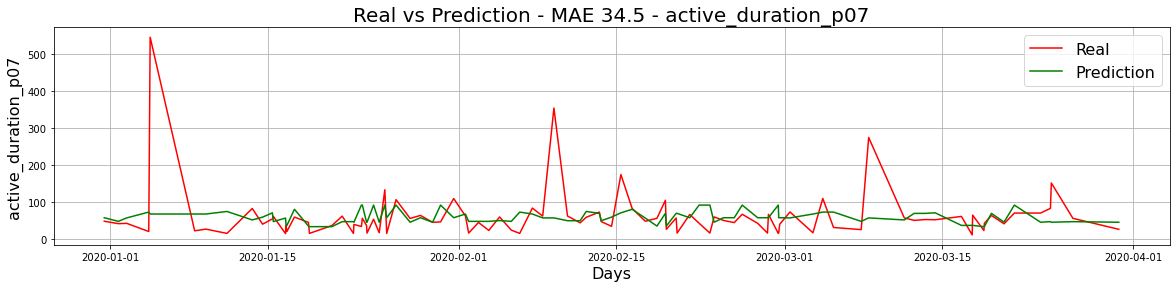

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         73.0            p07
2020-04-02     0    2      4         73.0            p07
2020-04-03     0    3      4         73.0            p07
2020-04-04     0    4      4         73.0            p07
2020-04-05     0    5      4         73.0            p07

In [75]:
#active_duration  prediction
horizon=24*4
X_active_duration_p07= active_duration_p07.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p07 = active_duration_p07['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p07, X_test_active_duration_p07 = X_active_duration_p07.iloc[:-horizon,:], X_active_duration_p07.iloc[-horizon:,:]
y_train_active_duration_p07, y_test_active_duration_p07 = y_active_duration_p07.iloc[:-horizon], y_active_duration_p07.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p07, y_train_active_duration_p07)
predictions_active_duration_p07 = model.predict(X_test_active_duration_p07)

#calculate MAE
mae_active_duration_p07 =np.round(mean_absolute_error(y_test_active_duration_p07, predictions_active_duration_p07),1)    
mape_active_duration_p07 = (mean_absolute_percentage_error(y_test_active_duration_p07, predictions_active_duration_p07))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p07} - active_duration_p07', fontsize=20)
plt.plot(y_test_active_duration_p07, color='red')
plt.plot(pd.Series(predictions_active_duration_p07, index=y_test_active_duration_p07.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p07', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p07 = pd.DataFrame(fut_date)
date_active_duration_p07 = date_active_duration_p07.set_index(date_active_duration_p07.datetime)
date_active_duration_p07['hour'] = date_active_duration_p07.index.hour
date_active_duration_p07['day'] = date_active_duration_p07.index.day
date_active_duration_p07['month'] = date_active_duration_p07.index.month
date_active_duration_p07.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p07 = model.predict(date_active_duration_p07)
date_active_duration_p07['predictions'] = np.round(predictions_active_duration_p07.tolist())
date_active_duration_p07[predictions_active_duration_p07<0] = 0
date_active_duration_p07['Participant_ID']= 'p07'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p07.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p07/active_duration_p07.csv')

date_active_duration_p07.head()

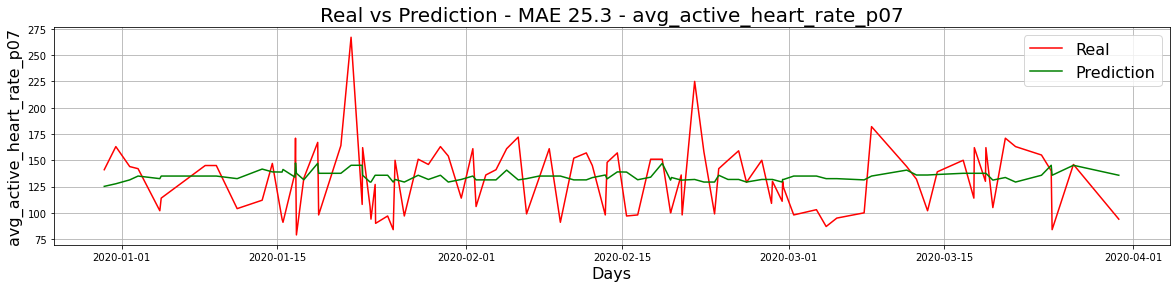

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        133.0            p07
2020-04-02     0    2      4        133.0            p07
2020-04-03     0    3      4        133.0            p07
2020-04-04     0    4      4        133.0            p07
2020-04-05     0    5      4        133.0            p07

In [76]:
#avg_active_heart_rate  prediction
horizon=24*4
X_avg_active_heart_rate_p07= avg_active_heart_rate_p07.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p07 = avg_active_heart_rate_p07['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p07, X_test_avg_active_heart_rate_p07 = X_avg_active_heart_rate_p07.iloc[:-horizon,:], X_avg_active_heart_rate_p07.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p07, y_test_avg_active_heart_rate_p07 = y_avg_active_heart_rate_p07.iloc[:-horizon], y_avg_active_heart_rate_p07.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p07, y_train_avg_active_heart_rate_p07)
predictions_avg_active_heart_rate_p07 = model.predict(X_test_avg_active_heart_rate_p07)

#calculate MAE
mae_avg_active_heart_rate_p07 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p07, predictions_avg_active_heart_rate_p07),1)    
mape_avg_active_heart_rate_p07 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p07, predictions_avg_active_heart_rate_p07))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p07} - avg_active_heart_rate_p07', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p07, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p07, index=y_test_avg_active_heart_rate_p07.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p07', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p07 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p07 = date_avg_active_heart_rate_p07.set_index(date_avg_active_heart_rate_p07.datetime)
date_avg_active_heart_rate_p07['hour'] = date_avg_active_heart_rate_p07.index.hour
date_avg_active_heart_rate_p07['day'] = date_avg_active_heart_rate_p07.index.day
date_avg_active_heart_rate_p07['month'] = date_avg_active_heart_rate_p07.index.month
date_avg_active_heart_rate_p07.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p07 = model.predict(date_avg_active_heart_rate_p07)
date_avg_active_heart_rate_p07['predictions'] = np.round(predictions_avg_active_heart_rate_p07.tolist())
date_avg_active_heart_rate_p07[predictions_avg_active_heart_rate_p07<0] = 0
date_avg_active_heart_rate_p07['Participant_ID']= 'p07'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p07.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p07/avg_active_heart_rate_p07.csv')

date_avg_active_heart_rate_p07.head()

(157, 3)
(61, 2)


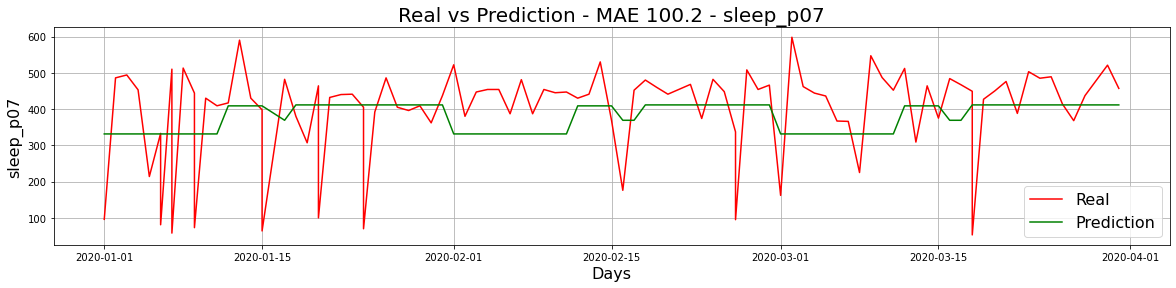

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        331.0            p07
2020-04-02    2      4        331.0            p07
2020-04-03    3      4        331.0            p07
2020-04-04    4      4        331.0            p07
2020-04-05    5      4        331.0            p07

In [77]:
#sleep prediction
horizon=24*4
X_sleep_p07= sleep_p07.drop('Minutes_Asleep', axis=1)
y_sleep_p07 = sleep_p07['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p07, X_test_sleep_p07 = X_sleep_p07.iloc[:-horizon,:], X_sleep_p07.iloc[-horizon:,:]
y_train_sleep_p07, y_test_sleep_p07 = y_sleep_p07.iloc[:-horizon], y_sleep_p07.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p07, y_train_sleep_p07)
predictions_sleep_p07 = model.predict(X_test_sleep_p07)

print(sleep_p07.shape)
print(X_train_sleep_p07.shape)

#calculate MAE
mae_sleep_p07 =np.round(mean_absolute_error(y_test_sleep_p07, predictions_sleep_p07),1)    
mape_sleep_p07 = (mean_absolute_percentage_error(y_test_sleep_p07, predictions_sleep_p07))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p07} - sleep_p07', fontsize=20)
plt.plot(y_test_sleep_p07, color='red')
plt.plot(pd.Series(predictions_sleep_p07, index=y_test_sleep_p07.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p07', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p07 = pd.DataFrame(fut_date)
date_sleep_p07 = date_sleep_p07.set_index(date_sleep_p07.datetime)
#date_sleep_p07['hour'] = date_sleep_p07.index.hour
date_sleep_p07['day'] = date_sleep_p07.index.day
date_sleep_p07['month'] = date_sleep_p07.index.month
date_sleep_p07.drop('datetime', axis=1, inplace=True)
predictions_sleep_p07 = model.predict(date_sleep_p07)
date_sleep_p07['predictions'] = np.round(predictions_sleep_p07.tolist())
date_sleep_p07[predictions_sleep_p07<0] = 0
date_sleep_p07['Participant_ID']= 'p07'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p07.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p07/sleep_p07.csv')

date_sleep_p07.head()

(144, 3)
(129, 2)


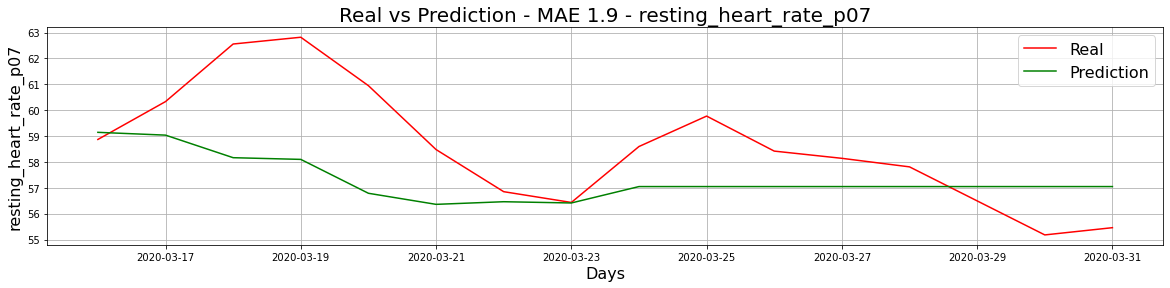

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         58.0            p07
2020-04-02    2      4         58.0            p07
2020-04-03    3      4         58.0            p07
2020-04-04    4      4         58.0            p07
2020-04-05    5      4         58.0            p07

In [78]:
#resting_heart_rate prediction
horizon=15
X_resting_heart_rate_p07= resting_heart_rate_p07.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p07 = resting_heart_rate_p07['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p07, X_test_resting_heart_rate_p07 = X_resting_heart_rate_p07.iloc[:-horizon,:], X_resting_heart_rate_p07.iloc[-horizon:,:]
y_train_resting_heart_rate_p07, y_test_resting_heart_rate_p07 = y_resting_heart_rate_p07.iloc[:-horizon], y_resting_heart_rate_p07.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p07, y_train_resting_heart_rate_p07)
predictions_resting_heart_rate_p07 = model.predict(X_test_resting_heart_rate_p07)

print(resting_heart_rate_p07.shape)
print(X_train_resting_heart_rate_p07.shape)

#calculate MAE
mae_resting_heart_rate_p07 =np.round(mean_absolute_error(y_test_resting_heart_rate_p07, predictions_resting_heart_rate_p07),1)    
mape_resting_heart_rate_p07 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p07, predictions_resting_heart_rate_p07))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p07} - resting_heart_rate_p07', fontsize=20)
plt.plot(y_test_resting_heart_rate_p07, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p07, index=y_test_resting_heart_rate_p07.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p07', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p07 = pd.DataFrame(fut_date)
date_resting_heart_rate_p07 = date_resting_heart_rate_p07.set_index(date_resting_heart_rate_p07.datetime)
#date_resting_heart_rate_p07['hour'] = date_resting_heart_rate_p07.index.hour
date_resting_heart_rate_p07['day'] = date_resting_heart_rate_p07.index.day
date_resting_heart_rate_p07['month'] = date_resting_heart_rate_p07.index.month
date_resting_heart_rate_p07.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p07 = model.predict(date_resting_heart_rate_p07)
date_resting_heart_rate_p07['predictions'] = np.round(predictions_resting_heart_rate_p07.tolist())
date_resting_heart_rate_p07[predictions_resting_heart_rate_p07<0] = 0
date_resting_heart_rate_p07['Participant_ID']= 'p07'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p07.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p07/resting_heart_rate_p07.csv')

date_resting_heart_rate_p07.head()

# Participant 8

In [79]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p08/calories_p08.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p08/distance_p08.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p08/steps_p08.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p08/active_duration_p08.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p08/avg_active_heart_rate_p08.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p08/sleep_p08.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p08/resting_heart_rate_p08.csv'

In [80]:
calories_p08=pd.read_csv(file_to_load1)
distance_p08=pd.read_csv(file_to_load2)
steps_p08=pd.read_csv(file_to_load3)
active_duration_p08=pd.read_csv(file_to_load4)
avg_active_heart_rate_p08=pd.read_csv(file_to_load5)
sleep_p08=pd.read_csv(file_to_load6)
resting_heart_rate_p08=pd.read_csv(file_to_load7)

In [81]:
#Calories
calories_p08['datetime'] = pd.to_datetime(calories_p08['datetime'])
calories_p08 = calories_p08.set_index(calories_p08.datetime)
calories_p08.drop('datetime', axis=1, inplace=True)

#Distance
distance_p08['datetime'] = pd.to_datetime(distance_p08['datetime'])
distance_p08 = distance_p08.set_index(distance_p08.datetime)
distance_p08.drop('datetime', axis=1, inplace=True)

#steps
steps_p08['datetime'] = pd.to_datetime(steps_p08['datetime'])
steps_p08 = steps_p08.set_index(steps_p08.datetime)
steps_p08.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p08['datetime'] = pd.to_datetime(active_duration_p08['datetime'])
active_duration_p08 = active_duration_p08.set_index(active_duration_p08.datetime)
active_duration_p08.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p08['datetime'] = pd.to_datetime(avg_active_heart_rate_p08['datetime'])
avg_active_heart_rate_p08 = avg_active_heart_rate_p08.set_index(avg_active_heart_rate_p08.datetime)
avg_active_heart_rate_p08.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p08['datetime'] = pd.to_datetime(sleep_p08['datetime'])
sleep_p08 = sleep_p08.set_index(sleep_p08.datetime)
sleep_p08.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p08['datetime'] = pd.to_datetime(resting_heart_rate_p08['datetime'])
resting_heart_rate_p08 = resting_heart_rate_p08.set_index(resting_heart_rate_p08.datetime)
resting_heart_rate_p08.drop('datetime', axis=1, inplace=True)

In [82]:
calories_p08 = calories_p08[(calories_p08[['calories']] != 0).any(axis=1)]
distance_p08 = distance_p08[(distance_p08[['distance']] != 0).any(axis=1)]
steps_p08 = steps_p08[(steps_p08[['steps']] != 0).any(axis=1)]
active_duration_p08 = active_duration_p08[(active_duration_p08[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p08 = avg_active_heart_rate_p08[(avg_active_heart_rate_p08[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p08 = sleep_p08[(sleep_p08[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p08 = resting_heart_rate_p08[(resting_heart_rate_p08[['Resting_beats_per_min']] != 0).any(axis=1)]

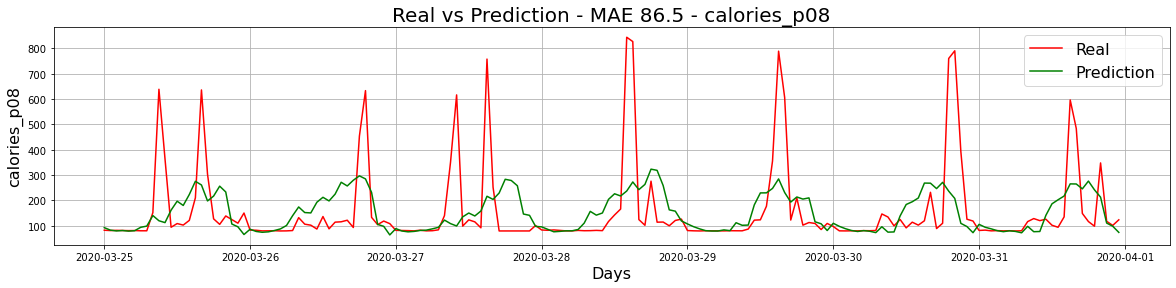

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         99.0            p08
2020-04-02     0    2      4         83.0            p08
2020-04-03     0    3      4         83.0            p08
2020-04-04     0    4      4         82.0            p08
2020-04-05     0    5      4         82.0            p08

In [83]:
#calories prediction
horizon=24*7
X_calories_p08 = calories_p08.drop('calories', axis=1)
y_calories_p08 = calories_p08['calories']
    
#take last week of the dataset for validation
X_train_calories_p08, X_test_calories_p08 = X_calories_p08.iloc[:-horizon,:], X_calories_p08.iloc[-horizon:,:]
y_train_calories_p08, y_test_calories_p08 = y_calories_p08.iloc[:-horizon], y_calories_p08.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p08, y_train_calories_p08)
predictions_calories_p08 = model.predict(X_test_calories_p08)

#calculate MAE
mae_calories_p08 = np.round(mean_absolute_error(y_test_calories_p08, predictions_calories_p08), 1)    
mape_calories_p08 = (mean_absolute_percentage_error(y_test_calories_p08, predictions_calories_p08))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p08} - calories_p08', fontsize=20)
plt.plot(y_test_calories_p08, color='red')
plt.plot(pd.Series(predictions_calories_p08, index=y_test_calories_p08.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p08', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p08 = pd.DataFrame(fut_date)
date_calories_p08 = date_calories_p08.set_index(date_calories_p08.datetime)
date_calories_p08['hour'] = date_calories_p08.index.hour
date_calories_p08['day'] = date_calories_p08.index.day
date_calories_p08['month'] = date_calories_p08.index.month
date_calories_p08.drop('datetime', axis=1, inplace=True)
predictions_calories_p08 = model.predict(date_calories_p08)
date_calories_p08['predictions'] = np.round(predictions_calories_p08.tolist())
date_calories_p08[predictions_calories_p08<0] = 0
date_calories_p08['Participant_ID']= 'p08'

#Saving file for machine learning
file_to_save_calories = date_calories_p08.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p08/calories_p08.csv')

date_calories_p08.head()

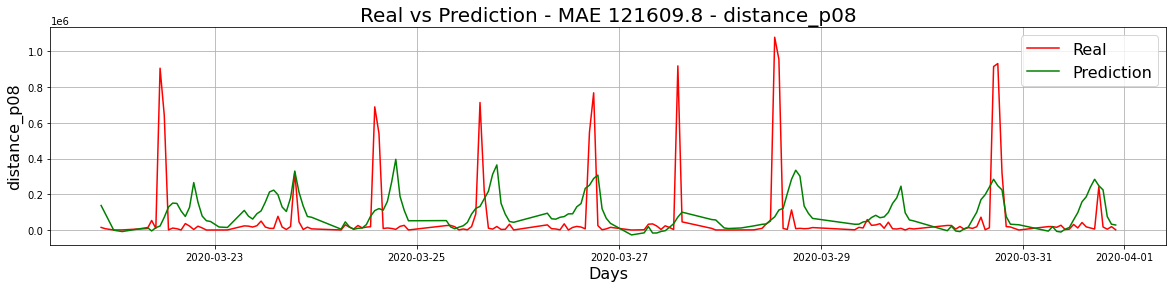

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4      68809.0            p08
2020-04-02     0    2      4        656.0            p08
2020-04-03     0    3      4      17682.0            p08
2020-04-04     0    4      4      20216.0            p08
2020-04-05     0    5      4      23492.0            p08

In [84]:
#distance prediction
horizon=24*7
X_distance_p08= distance_p08.drop('distance', axis=1)
y_distance_p08 = distance_p08['distance']
    
#take last week of the dataset for validation
X_train_distance_p08, X_test_distance_p08 = X_distance_p08.iloc[:-horizon,:], X_distance_p08.iloc[-horizon:,:]
y_train_distance_p08, y_test_distance_p08 = y_distance_p08.iloc[:-horizon], y_distance_p08.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p08, y_train_distance_p08)
predictions_distance_p08 = model.predict(X_test_distance_p08)

#calculate MAE
mae_distance_p08 =np.round(mean_absolute_error(y_test_distance_p08, predictions_distance_p08),1)    
mape_distance_p08 = (mean_absolute_percentage_error(y_test_distance_p08, predictions_distance_p08))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p08} - distance_p08', fontsize=20)
plt.plot(y_test_distance_p08, color='red')
plt.plot(pd.Series(predictions_distance_p08, index=y_test_distance_p08.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p08', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p08 = pd.DataFrame(fut_date)
date_distance_p08 = date_distance_p08.set_index(date_distance_p08.datetime)
date_distance_p08['hour'] = date_distance_p08.index.hour
date_distance_p08['day'] = date_distance_p08.index.day
date_distance_p08['month'] = date_distance_p08.index.month
date_distance_p08.drop('datetime', axis=1, inplace=True)
predictions_distance_p08 = model.predict(date_distance_p08)
date_distance_p08['predictions'] = np.round(predictions_distance_p08.tolist())
date_distance_p08[predictions_distance_p08<0] = 0
date_distance_p08['Participant_ID']= 'p08'

#Saving file for machine learning
file_to_save_distance = date_distance_p08.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p08/distance_p08.csv')

date_distance_p08.head()

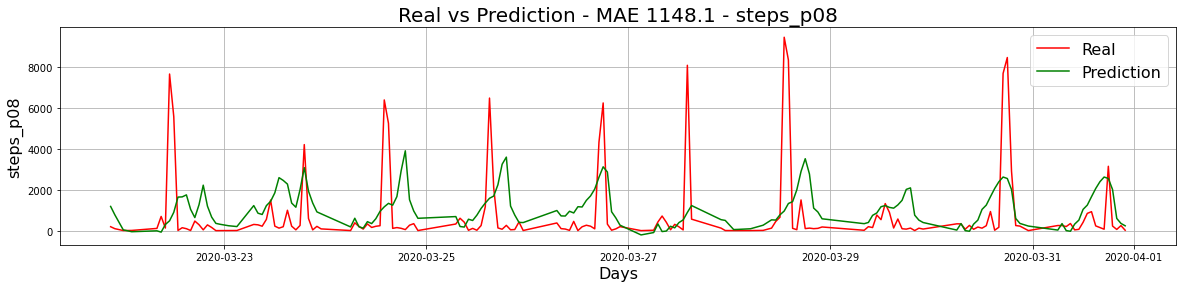

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        666.0            p08
2020-04-02     0    2      4         74.0            p08
2020-04-03     0    3      4        255.0            p08
2020-04-04     0    4      4        427.0            p08
2020-04-05     0    5      4        182.0            p08

In [85]:
#steps prediction
horizon=24*7
X_steps_p08= steps_p08.drop('steps', axis=1)
y_steps_p08 = steps_p08['steps']
    
#take last week of the dataset for validation
X_train_steps_p08, X_test_steps_p08 = X_steps_p08.iloc[:-horizon,:], X_steps_p08.iloc[-horizon:,:]
y_train_steps_p08, y_test_steps_p08 = y_steps_p08.iloc[:-horizon], y_steps_p08.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p08, y_train_steps_p08)
predictions_steps_p08 = model.predict(X_test_steps_p08)

#calculate MAE
mae_steps_p08 =np.round(mean_absolute_error(y_test_steps_p08, predictions_steps_p08),1)    
mape_steps_p08 = (mean_absolute_percentage_error(y_test_steps_p08, predictions_steps_p08))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p08} - steps_p08', fontsize=20)
plt.plot(y_test_steps_p08, color='red')
plt.plot(pd.Series(predictions_steps_p08, index=y_test_steps_p08.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p08', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p08 = pd.DataFrame(fut_date)
date_steps_p08 = date_steps_p08.set_index(date_steps_p08.datetime)
date_steps_p08['hour'] = date_steps_p08.index.hour
date_steps_p08['day'] = date_steps_p08.index.day
date_steps_p08['month'] = date_steps_p08.index.month
date_steps_p08.drop('datetime', axis=1, inplace=True)
predictions_steps_p08 = model.predict(date_steps_p08)
date_steps_p08['predictions'] = np.round(predictions_steps_p08.tolist())
date_steps_p08[predictions_steps_p08<0] = 0
date_steps_p08['Participant_ID']= 'p08'

#Saving file for machine learning
file_to_save_steps = date_steps_p08.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p08/steps_p08.csv')

date_steps_p08.head()

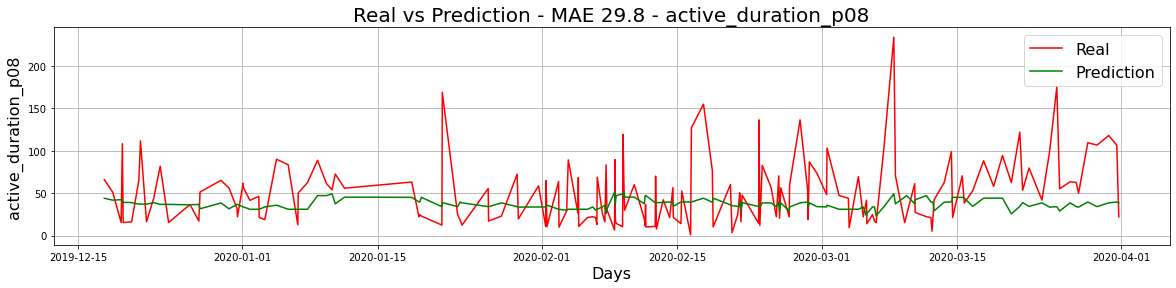

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         34.0            p08
2020-04-02     0    2      4         34.0            p08
2020-04-03     0    3      4         34.0            p08
2020-04-04     0    4      4         34.0            p08
2020-04-05     0    5      4         34.0            p08

In [86]:
#active_duration  prediction
horizon=24*7
X_active_duration_p08= active_duration_p08.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p08 = active_duration_p08['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p08, X_test_active_duration_p08 = X_active_duration_p08.iloc[:-horizon,:], X_active_duration_p08.iloc[-horizon:,:]
y_train_active_duration_p08, y_test_active_duration_p08 = y_active_duration_p08.iloc[:-horizon], y_active_duration_p08.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p08, y_train_active_duration_p08)
predictions_active_duration_p08 = model.predict(X_test_active_duration_p08)

#calculate MAE
mae_active_duration_p08 =np.round(mean_absolute_error(y_test_active_duration_p08, predictions_active_duration_p08),1)    
mape_active_duration_p08 = (mean_absolute_percentage_error(y_test_active_duration_p08, predictions_active_duration_p08))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p08} - active_duration_p08', fontsize=20)
plt.plot(y_test_active_duration_p08, color='red')
plt.plot(pd.Series(predictions_active_duration_p08, index=y_test_active_duration_p08.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p08', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p08 = pd.DataFrame(fut_date)
date_active_duration_p08 = date_active_duration_p08.set_index(date_active_duration_p08.datetime)
date_active_duration_p08['hour'] = date_active_duration_p08.index.hour
date_active_duration_p08['day'] = date_active_duration_p08.index.day
date_active_duration_p08['month'] = date_active_duration_p08.index.month
date_active_duration_p08.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p08 = model.predict(date_active_duration_p08)
date_active_duration_p08['predictions'] = np.round(predictions_active_duration_p08.tolist())
date_active_duration_p08[predictions_active_duration_p08<0] = 0
date_active_duration_p08['Participant_ID']= 'p08'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p08.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p08/active_duration_p08.csv')

date_active_duration_p08.head()

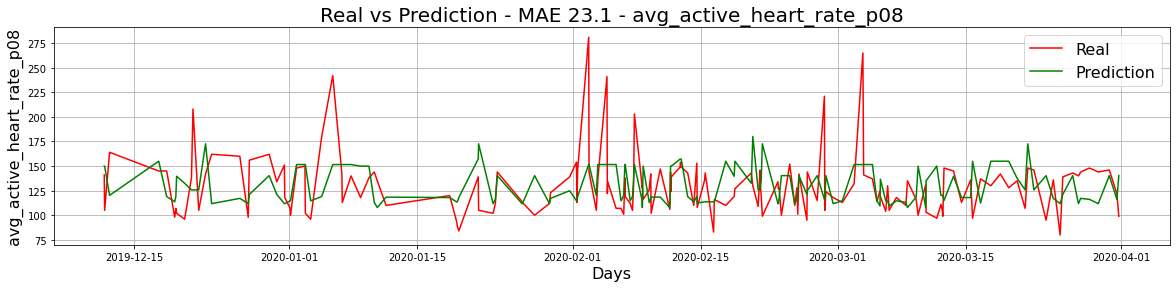

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        115.0            p08
2020-04-02     0    2      4        115.0            p08
2020-04-03     0    3      4        115.0            p08
2020-04-04     0    4      4        115.0            p08
2020-04-05     0    5      4        115.0            p08

In [87]:
#avg_active_heart_rate  prediction
horizon=24*7
X_avg_active_heart_rate_p08= avg_active_heart_rate_p08.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p08 = avg_active_heart_rate_p08['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p08, X_test_avg_active_heart_rate_p08 = X_avg_active_heart_rate_p08.iloc[:-horizon,:], X_avg_active_heart_rate_p08.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p08, y_test_avg_active_heart_rate_p08 = y_avg_active_heart_rate_p08.iloc[:-horizon], y_avg_active_heart_rate_p08.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p08, y_train_avg_active_heart_rate_p08)
predictions_avg_active_heart_rate_p08 = model.predict(X_test_avg_active_heart_rate_p08)

#calculate MAE
mae_avg_active_heart_rate_p08 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p08, predictions_avg_active_heart_rate_p08),1)    
mape_avg_active_heart_rate_p08 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p08, predictions_avg_active_heart_rate_p08))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p08} - avg_active_heart_rate_p08', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p08, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p08, index=y_test_avg_active_heart_rate_p08.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p08', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p08 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p08 = date_avg_active_heart_rate_p08.set_index(date_avg_active_heart_rate_p08.datetime)
date_avg_active_heart_rate_p08['hour'] = date_avg_active_heart_rate_p08.index.hour
date_avg_active_heart_rate_p08['day'] = date_avg_active_heart_rate_p08.index.day
date_avg_active_heart_rate_p08['month'] = date_avg_active_heart_rate_p08.index.month
date_avg_active_heart_rate_p08.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p08 = model.predict(date_avg_active_heart_rate_p08)
date_avg_active_heart_rate_p08['predictions'] = np.round(predictions_avg_active_heart_rate_p08.tolist())
date_avg_active_heart_rate_p08[predictions_avg_active_heart_rate_p08<0] = 0
date_avg_active_heart_rate_p08['Participant_ID']= 'p08'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p08.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p08/avg_active_heart_rate_p08.csv')

date_avg_active_heart_rate_p08.head()

(139, 3)
(91, 2)


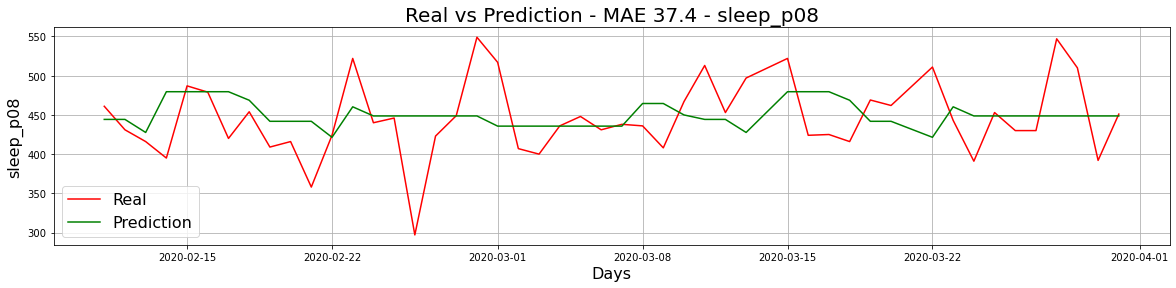

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        436.0            p08
2020-04-02    2      4        436.0            p08
2020-04-03    3      4        436.0            p08
2020-04-04    4      4        436.0            p08
2020-04-05    5      4        436.0            p08

In [88]:
#sleep prediction
horizon=24*2
X_sleep_p08= sleep_p08.drop('Minutes_Asleep', axis=1)
y_sleep_p08 = sleep_p08['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p08, X_test_sleep_p08 = X_sleep_p08.iloc[:-horizon,:], X_sleep_p08.iloc[-horizon:,:]
y_train_sleep_p08, y_test_sleep_p08 = y_sleep_p08.iloc[:-horizon], y_sleep_p08.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p08, y_train_sleep_p08)
predictions_sleep_p08 = model.predict(X_test_sleep_p08)

print(sleep_p08.shape)
print(X_train_sleep_p08.shape)

#calculate MAE
mae_sleep_p08 =np.round(mean_absolute_error(y_test_sleep_p08, predictions_sleep_p08),1)    
mape_sleep_p08 = (mean_absolute_percentage_error(y_test_sleep_p08, predictions_sleep_p08))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p08} - sleep_p08', fontsize=20)
plt.plot(y_test_sleep_p08, color='red')
plt.plot(pd.Series(predictions_sleep_p08, index=y_test_sleep_p08.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p08', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p08 = pd.DataFrame(fut_date)
date_sleep_p08 = date_sleep_p08.set_index(date_sleep_p08.datetime)
#date_sleep_p08['hour'] = date_sleep_p08.index.hour
date_sleep_p08['day'] = date_sleep_p08.index.day
date_sleep_p08['month'] = date_sleep_p08.index.month
date_sleep_p08.drop('datetime', axis=1, inplace=True)
predictions_sleep_p08 = model.predict(date_sleep_p08)
date_sleep_p08['predictions'] = np.round(predictions_sleep_p08.tolist())
date_sleep_p08[predictions_sleep_p08<0] = 0
date_sleep_p08['Participant_ID']= 'p08'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p08.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p08/sleep_p08.csv')

date_sleep_p08.head()

(139, 3)
(124, 2)


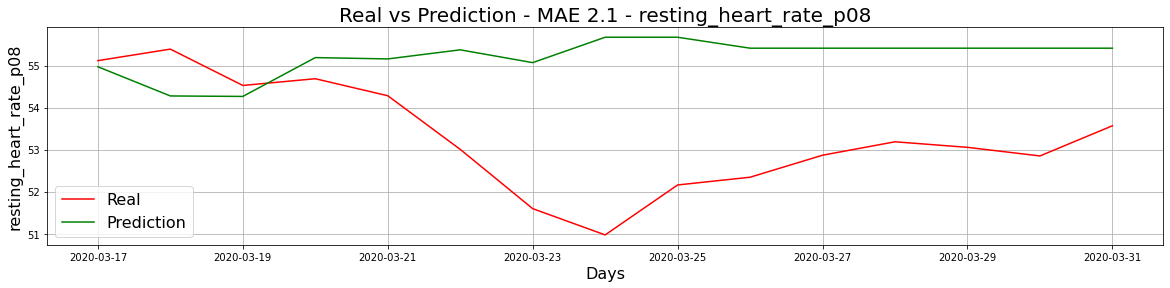

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         55.0            p08
2020-04-02    2      4         55.0            p08
2020-04-03    3      4         55.0            p08
2020-04-04    4      4         55.0            p08
2020-04-05    5      4         55.0            p08

In [89]:
#resting_heart_rate prediction
horizon=15
X_resting_heart_rate_p08= resting_heart_rate_p08.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p08 = resting_heart_rate_p08['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p08, X_test_resting_heart_rate_p08 = X_resting_heart_rate_p08.iloc[:-horizon,:], X_resting_heart_rate_p08.iloc[-horizon:,:]
y_train_resting_heart_rate_p08, y_test_resting_heart_rate_p08 = y_resting_heart_rate_p08.iloc[:-horizon], y_resting_heart_rate_p08.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p08, y_train_resting_heart_rate_p08)
predictions_resting_heart_rate_p08 = model.predict(X_test_resting_heart_rate_p08)

print(resting_heart_rate_p08.shape)
print(X_train_resting_heart_rate_p08.shape)

#calculate MAE
mae_resting_heart_rate_p08 =np.round(mean_absolute_error(y_test_resting_heart_rate_p08, predictions_resting_heart_rate_p08),1)    
mape_resting_heart_rate_p08 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p08, predictions_resting_heart_rate_p08))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p08} - resting_heart_rate_p08', fontsize=20)
plt.plot(y_test_resting_heart_rate_p08, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p08, index=y_test_resting_heart_rate_p08.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p08', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p08 = pd.DataFrame(fut_date)
date_resting_heart_rate_p08 = date_resting_heart_rate_p08.set_index(date_resting_heart_rate_p08.datetime)
#date_resting_heart_rate_p08['hour'] = date_resting_heart_rate_p08.index.hour
date_resting_heart_rate_p08['day'] = date_resting_heart_rate_p08.index.day
date_resting_heart_rate_p08['month'] = date_resting_heart_rate_p08.index.month
date_resting_heart_rate_p08.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p08 = model.predict(date_resting_heart_rate_p08)
date_resting_heart_rate_p08['predictions'] = np.round(predictions_resting_heart_rate_p08.tolist())
date_resting_heart_rate_p08[predictions_resting_heart_rate_p08<0] = 0
date_resting_heart_rate_p08['Participant_ID']= 'p08'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p08.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p08/resting_heart_rate_p08.csv')

date_resting_heart_rate_p08.head()

# Participant 9

In [90]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p09/calories_p09.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p09/distance_p09.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p09/steps_p09.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p09/active_duration_p09.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p09/avg_active_heart_rate_p09.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p09/sleep_p09.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p09/resting_heart_rate_p09.csv'

In [91]:
calories_p09=pd.read_csv(file_to_load1)
distance_p09=pd.read_csv(file_to_load2)
steps_p09=pd.read_csv(file_to_load3)
active_duration_p09=pd.read_csv(file_to_load4)
avg_active_heart_rate_p09=pd.read_csv(file_to_load5)
sleep_p09=pd.read_csv(file_to_load6)
resting_heart_rate_p09=pd.read_csv(file_to_load7)

In [92]:
#Calories
calories_p09['datetime'] = pd.to_datetime(calories_p09['datetime'])
calories_p09 = calories_p09.set_index(calories_p09.datetime)
calories_p09.drop('datetime', axis=1, inplace=True)

#Distance
distance_p09['datetime'] = pd.to_datetime(distance_p09['datetime'])
distance_p09 = distance_p09.set_index(distance_p09.datetime)
distance_p09.drop('datetime', axis=1, inplace=True)

#steps
steps_p09['datetime'] = pd.to_datetime(steps_p09['datetime'])
steps_p09 = steps_p09.set_index(steps_p09.datetime)
steps_p09.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p09['datetime'] = pd.to_datetime(active_duration_p09['datetime'])
active_duration_p09 = active_duration_p09.set_index(active_duration_p09.datetime)
active_duration_p09.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p09['datetime'] = pd.to_datetime(avg_active_heart_rate_p09['datetime'])
avg_active_heart_rate_p09 = avg_active_heart_rate_p09.set_index(avg_active_heart_rate_p09.datetime)
avg_active_heart_rate_p09.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p09['datetime'] = pd.to_datetime(sleep_p09['datetime'])
sleep_p09 = sleep_p09.set_index(sleep_p09.datetime)
sleep_p09.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p09['datetime'] = pd.to_datetime(resting_heart_rate_p09['datetime'])
resting_heart_rate_p09 = resting_heart_rate_p09.set_index(resting_heart_rate_p09.datetime)
resting_heart_rate_p09.drop('datetime', axis=1, inplace=True)

In [93]:
calories_p09 = calories_p09[(calories_p09[['calories']] != 0).any(axis=1)]
distance_p09 = distance_p09[(distance_p09[['distance']] != 0).any(axis=1)]
steps_p09 = steps_p09[(steps_p09[['steps']] != 0).any(axis=1)]
active_duration_p09 = active_duration_p09[(active_duration_p09[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p09 = avg_active_heart_rate_p09[(avg_active_heart_rate_p09[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p09 = sleep_p09[(sleep_p09[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p09 = resting_heart_rate_p09[(resting_heart_rate_p09[['Resting_beats_per_min']] != 0).any(axis=1)]

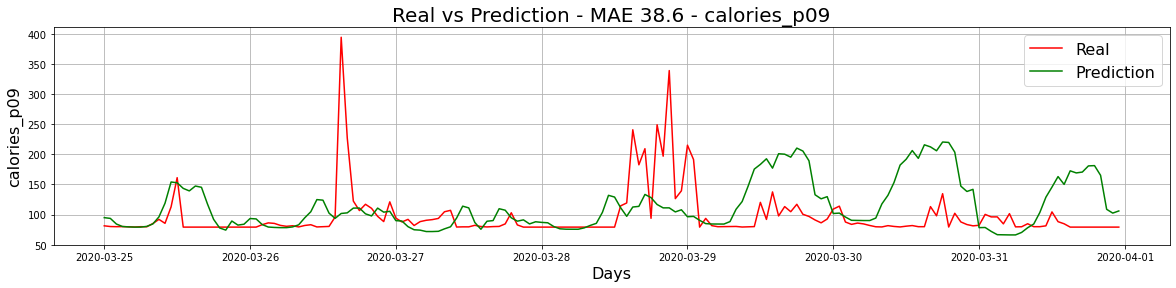

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        117.0            p09
2020-04-02     0    2      4        124.0            p09
2020-04-03     0    3      4         99.0            p09
2020-04-04     0    4      4         86.0            p09
2020-04-05     0    5      4         89.0            p09

In [94]:
#calories prediction
horizon=24*7
X_calories_p09 = calories_p09.drop('calories', axis=1)
y_calories_p09 = calories_p09['calories']
    
#take last week of the dataset for validation
X_train_calories_p09, X_test_calories_p09 = X_calories_p09.iloc[:-horizon,:], X_calories_p09.iloc[-horizon:,:]
y_train_calories_p09, y_test_calories_p09 = y_calories_p09.iloc[:-horizon], y_calories_p09.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p09, y_train_calories_p09)
predictions_calories_p09 = model.predict(X_test_calories_p09)

#calculate MAE
mae_calories_p09 = np.round(mean_absolute_error(y_test_calories_p09, predictions_calories_p09), 1)    
mape_calories_p09 = (mean_absolute_percentage_error(y_test_calories_p09, predictions_calories_p09))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p09} - calories_p09', fontsize=20)
plt.plot(y_test_calories_p09, color='red')
plt.plot(pd.Series(predictions_calories_p09, index=y_test_calories_p09.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p09', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p09 = pd.DataFrame(fut_date)
date_calories_p09 = date_calories_p09.set_index(date_calories_p09.datetime)
date_calories_p09['hour'] = date_calories_p09.index.hour
date_calories_p09['day'] = date_calories_p09.index.day
date_calories_p09['month'] = date_calories_p09.index.month
date_calories_p09.drop('datetime', axis=1, inplace=True)
predictions_calories_p09 = model.predict(date_calories_p09)
date_calories_p09['predictions'] = np.round(predictions_calories_p09.tolist())
date_calories_p09[predictions_calories_p09<0] = 0
date_calories_p09['Participant_ID']= 'p09'

#Saving file for machine learning
file_to_save_calories = date_calories_p09.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p09/calories_p09.csv')

date_calories_p09.head()

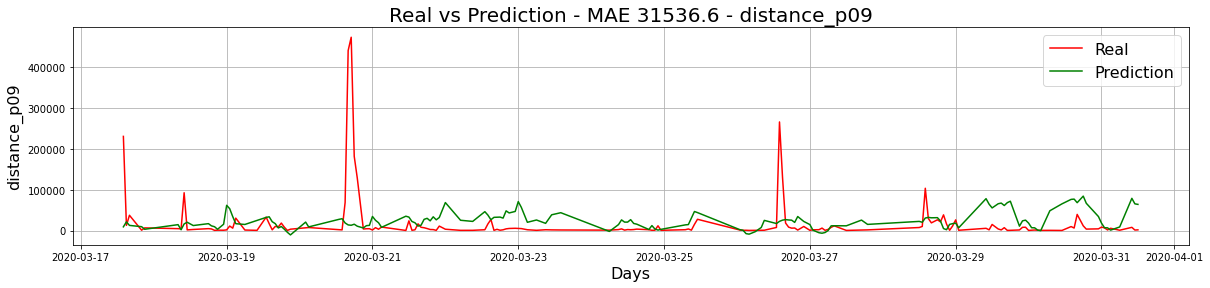

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4      27536.0            p09
2020-04-02     0    2      4      58273.0            p09
2020-04-03     0    3      4      76207.0            p09
2020-04-04     0    4      4      24402.0            p09
2020-04-05     0    5      4      15261.0            p09

In [95]:
#distance prediction
horizon=24*7
X_distance_p09= distance_p09.drop('distance', axis=1)
y_distance_p09 = distance_p09['distance']
    
#take last week of the dataset for validation
X_train_distance_p09, X_test_distance_p09 = X_distance_p09.iloc[:-horizon,:], X_distance_p09.iloc[-horizon:,:]
y_train_distance_p09, y_test_distance_p09 = y_distance_p09.iloc[:-horizon], y_distance_p09.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p09, y_train_distance_p09)
predictions_distance_p09 = model.predict(X_test_distance_p09)

#calculate MAE
mae_distance_p09 =np.round(mean_absolute_error(y_test_distance_p09, predictions_distance_p09),1)    
mape_distance_p09 = (mean_absolute_percentage_error(y_test_distance_p09, predictions_distance_p09))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p09} - distance_p09', fontsize=20)
plt.plot(y_test_distance_p09, color='red')
plt.plot(pd.Series(predictions_distance_p09, index=y_test_distance_p09.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p09', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p09 = pd.DataFrame(fut_date)
date_distance_p09 = date_distance_p09.set_index(date_distance_p09.datetime)
date_distance_p09['hour'] = date_distance_p09.index.hour
date_distance_p09['day'] = date_distance_p09.index.day
date_distance_p09['month'] = date_distance_p09.index.month
date_distance_p09.drop('datetime', axis=1, inplace=True)
predictions_distance_p09 = model.predict(date_distance_p09)
date_distance_p09['predictions'] = np.round(predictions_distance_p09.tolist())
date_distance_p09[predictions_distance_p09<0] = 0
date_distance_p09['Participant_ID']= 'p09'

#Saving file for machine learning
file_to_save_distance = date_distance_p09.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p09/distance_p09.csv')

date_distance_p09.head()

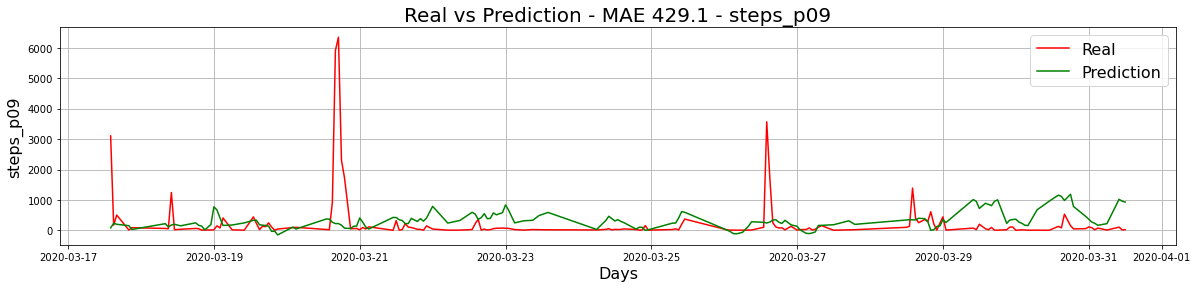

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        381.0            p09
2020-04-02     0    2      4        848.0            p09
2020-04-03     0    3      4        855.0            p09
2020-04-04     0    4      4        317.0            p09
2020-04-05     0    5      4        187.0            p09

In [96]:
#steps prediction
horizon=24*7
X_steps_p09= steps_p09.drop('steps', axis=1)
y_steps_p09 = steps_p09['steps']
    
#take last week of the dataset for validation
X_train_steps_p09, X_test_steps_p09 = X_steps_p09.iloc[:-horizon,:], X_steps_p09.iloc[-horizon:,:]
y_train_steps_p09, y_test_steps_p09 = y_steps_p09.iloc[:-horizon], y_steps_p09.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p09, y_train_steps_p09)
predictions_steps_p09 = model.predict(X_test_steps_p09)

#calculate MAE
mae_steps_p09 =np.round(mean_absolute_error(y_test_steps_p09, predictions_steps_p09),1)    
mape_steps_p09 = (mean_absolute_percentage_error(y_test_steps_p09, predictions_steps_p09))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p09} - steps_p09', fontsize=20)
plt.plot(y_test_steps_p09, color='red')
plt.plot(pd.Series(predictions_steps_p09, index=y_test_steps_p09.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p09', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p09 = pd.DataFrame(fut_date)
date_steps_p09 = date_steps_p09.set_index(date_steps_p09.datetime)
date_steps_p09['hour'] = date_steps_p09.index.hour
date_steps_p09['day'] = date_steps_p09.index.day
date_steps_p09['month'] = date_steps_p09.index.month
date_steps_p09.drop('datetime', axis=1, inplace=True)
predictions_steps_p09 = model.predict(date_steps_p09)
date_steps_p09['predictions'] = np.round(predictions_steps_p09.tolist())
date_steps_p09[predictions_steps_p09<0] = 0
date_steps_p09['Participant_ID']= 'p09'

#Saving file for machine learning
file_to_save_steps = date_steps_p09.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p09/steps_p09.csv')

date_steps_p09.head()

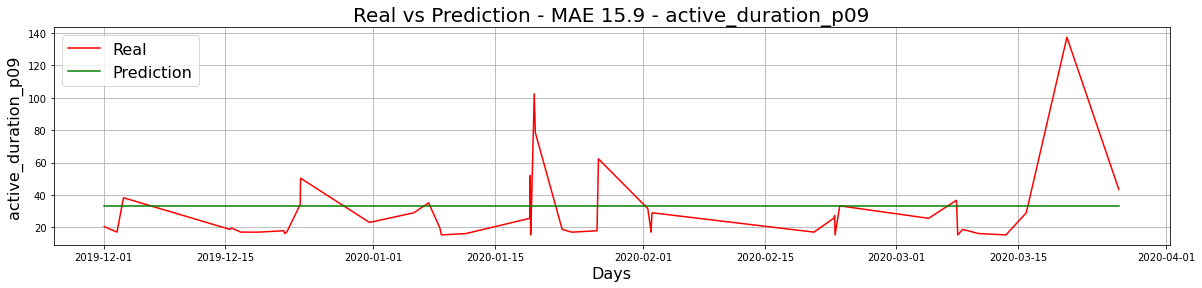

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         33.0            p09
2020-04-02     0    2      4         33.0            p09
2020-04-03     0    3      4         33.0            p09
2020-04-04     0    4      4         33.0            p09
2020-04-05     0    5      4         33.0            p09

In [97]:
#active_duration  prediction
horizon=24*2
X_active_duration_p09= active_duration_p09.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p09 = active_duration_p09['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p09, X_test_active_duration_p09 = X_active_duration_p09.iloc[:-horizon,:], X_active_duration_p09.iloc[-horizon:,:]
y_train_active_duration_p09, y_test_active_duration_p09 = y_active_duration_p09.iloc[:-horizon], y_active_duration_p09.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p09, y_train_active_duration_p09)
predictions_active_duration_p09 = model.predict(X_test_active_duration_p09)

#calculate MAE
mae_active_duration_p09 =np.round(mean_absolute_error(y_test_active_duration_p09, predictions_active_duration_p09),1)    
mape_active_duration_p09 = (mean_absolute_percentage_error(y_test_active_duration_p09, predictions_active_duration_p09))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p09} - active_duration_p09', fontsize=20)
plt.plot(y_test_active_duration_p09, color='red')
plt.plot(pd.Series(predictions_active_duration_p09, index=y_test_active_duration_p09.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p09', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p09 = pd.DataFrame(fut_date)
date_active_duration_p09 = date_active_duration_p09.set_index(date_active_duration_p09.datetime)
date_active_duration_p09['hour'] = date_active_duration_p09.index.hour
date_active_duration_p09['day'] = date_active_duration_p09.index.day
date_active_duration_p09['month'] = date_active_duration_p09.index.month
date_active_duration_p09.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p09 = model.predict(date_active_duration_p09)
date_active_duration_p09['predictions'] = np.round(predictions_active_duration_p09.tolist())
date_active_duration_p09[predictions_active_duration_p09<0] = 0
date_active_duration_p09['Participant_ID']= 'p09'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p09.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p09/active_duration_p09.csv')

date_active_duration_p09.head()

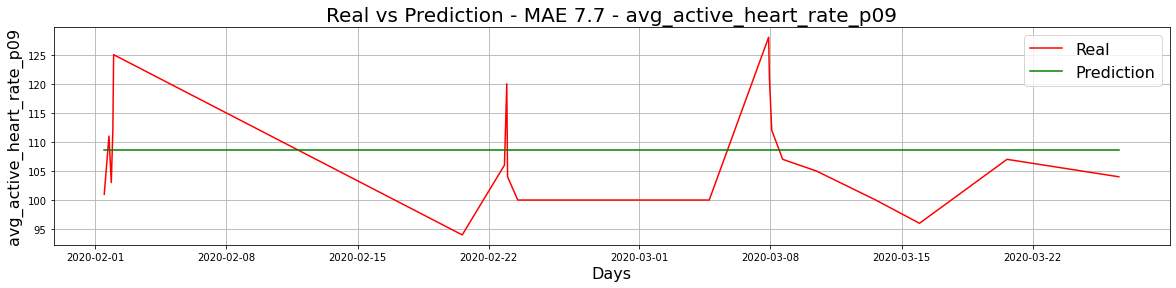

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        109.0            p09
2020-04-02     0    2      4        109.0            p09
2020-04-03     0    3      4        109.0            p09
2020-04-04     0    4      4        109.0            p09
2020-04-05     0    5      4        109.0            p09

In [98]:
#avg_active_heart_rate  prediction
horizon=20
X_avg_active_heart_rate_p09= avg_active_heart_rate_p09.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p09 = avg_active_heart_rate_p09['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p09, X_test_avg_active_heart_rate_p09 = X_avg_active_heart_rate_p09.iloc[:-horizon,:], X_avg_active_heart_rate_p09.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p09, y_test_avg_active_heart_rate_p09 = y_avg_active_heart_rate_p09.iloc[:-horizon], y_avg_active_heart_rate_p09.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p09, y_train_avg_active_heart_rate_p09)
predictions_avg_active_heart_rate_p09 = model.predict(X_test_avg_active_heart_rate_p09)

#calculate MAE
mae_avg_active_heart_rate_p09 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p09, predictions_avg_active_heart_rate_p09),1)    
mape_avg_active_heart_rate_p09 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p09, predictions_avg_active_heart_rate_p09))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p09} - avg_active_heart_rate_p09', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p09, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p09, index=y_test_avg_active_heart_rate_p09.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p09', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p09 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p09 = date_avg_active_heart_rate_p09.set_index(date_avg_active_heart_rate_p09.datetime)
date_avg_active_heart_rate_p09['hour'] = date_avg_active_heart_rate_p09.index.hour
date_avg_active_heart_rate_p09['day'] = date_avg_active_heart_rate_p09.index.day
date_avg_active_heart_rate_p09['month'] = date_avg_active_heart_rate_p09.index.month
date_avg_active_heart_rate_p09.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p09 = model.predict(date_avg_active_heart_rate_p09)
date_avg_active_heart_rate_p09['predictions'] = np.round(predictions_avg_active_heart_rate_p09.tolist())
date_avg_active_heart_rate_p09[predictions_avg_active_heart_rate_p09<0] = 0
date_avg_active_heart_rate_p09['Participant_ID']= 'p09'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p09.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p09/avg_active_heart_rate_p09.csv')

date_avg_active_heart_rate_p09.head()

(137, 3)
(89, 2)


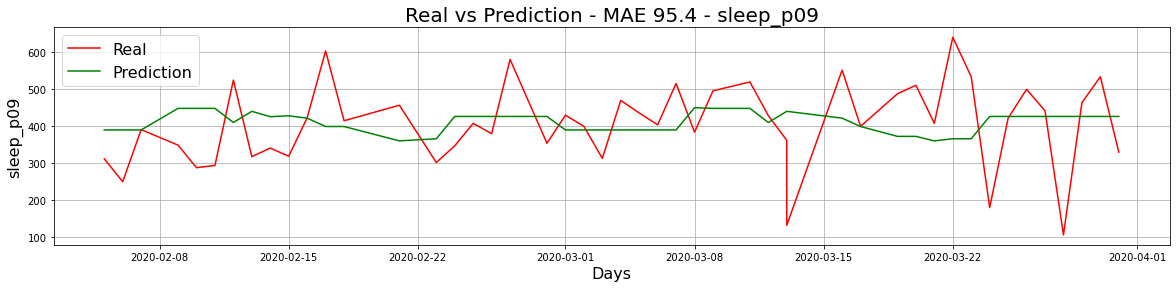

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        390.0            p09
2020-04-02    2      4        390.0            p09
2020-04-03    3      4        390.0            p09
2020-04-04    4      4        390.0            p09
2020-04-05    5      4        390.0            p09

In [99]:
#sleep prediction
horizon=24*2
X_sleep_p09= sleep_p09.drop('Minutes_Asleep', axis=1)
y_sleep_p09 = sleep_p09['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p09, X_test_sleep_p09 = X_sleep_p09.iloc[:-horizon,:], X_sleep_p09.iloc[-horizon:,:]
y_train_sleep_p09, y_test_sleep_p09 = y_sleep_p09.iloc[:-horizon], y_sleep_p09.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p09, y_train_sleep_p09)
predictions_sleep_p09 = model.predict(X_test_sleep_p09)

print(sleep_p09.shape)
print(X_train_sleep_p09.shape)

#calculate MAE
mae_sleep_p09 =np.round(mean_absolute_error(y_test_sleep_p09, predictions_sleep_p09),1)    
mape_sleep_p09 = (mean_absolute_percentage_error(y_test_sleep_p09, predictions_sleep_p09))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p09} - sleep_p09', fontsize=20)
plt.plot(y_test_sleep_p09, color='red')
plt.plot(pd.Series(predictions_sleep_p09, index=y_test_sleep_p09.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p09', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p09 = pd.DataFrame(fut_date)
date_sleep_p09 = date_sleep_p09.set_index(date_sleep_p09.datetime)
#date_sleep_p09['hour'] = date_sleep_p09.index.hour
date_sleep_p09['day'] = date_sleep_p09.index.day
date_sleep_p09['month'] = date_sleep_p09.index.month
date_sleep_p09.drop('datetime', axis=1, inplace=True)
predictions_sleep_p09 = model.predict(date_sleep_p09)
date_sleep_p09['predictions'] = np.round(predictions_sleep_p09.tolist())
date_sleep_p09[predictions_sleep_p09<0] = 0
date_sleep_p09['Participant_ID']= 'p09'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p09.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p09/sleep_p09.csv')

date_sleep_p09.head()

(147, 3)
(132, 2)


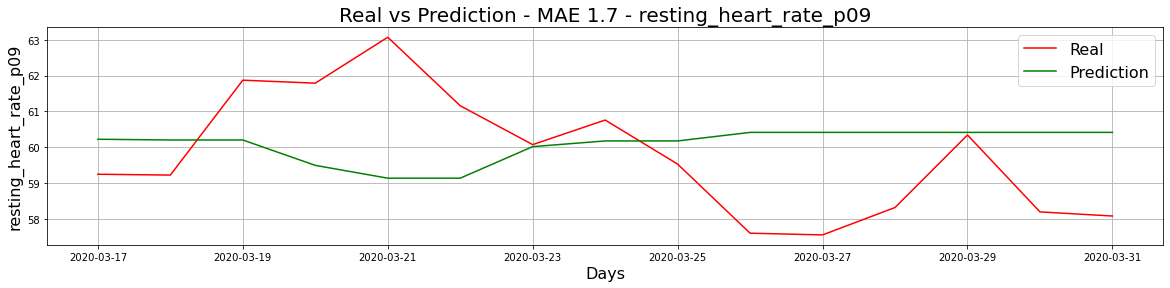

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         63.0            p09
2020-04-02    2      4         63.0            p09
2020-04-03    3      4         63.0            p09
2020-04-04    4      4         63.0            p09
2020-04-05    5      4         63.0            p09

In [100]:
#resting_heart_rate prediction
horizon=15
X_resting_heart_rate_p09= resting_heart_rate_p09.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p09 = resting_heart_rate_p09['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p09, X_test_resting_heart_rate_p09 = X_resting_heart_rate_p09.iloc[:-horizon,:], X_resting_heart_rate_p09.iloc[-horizon:,:]
y_train_resting_heart_rate_p09, y_test_resting_heart_rate_p09 = y_resting_heart_rate_p09.iloc[:-horizon], y_resting_heart_rate_p09.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p09, y_train_resting_heart_rate_p09)
predictions_resting_heart_rate_p09 = model.predict(X_test_resting_heart_rate_p09)

print(resting_heart_rate_p09.shape)
print(X_train_resting_heart_rate_p09.shape)

#calculate MAE
mae_resting_heart_rate_p09 =np.round(mean_absolute_error(y_test_resting_heart_rate_p09, predictions_resting_heart_rate_p09),1)    
mape_resting_heart_rate_p09 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p09, predictions_resting_heart_rate_p09))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p09} - resting_heart_rate_p09', fontsize=20)
plt.plot(y_test_resting_heart_rate_p09, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p09, index=y_test_resting_heart_rate_p09.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p09', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p09 = pd.DataFrame(fut_date)
date_resting_heart_rate_p09 = date_resting_heart_rate_p09.set_index(date_resting_heart_rate_p09.datetime)
#date_resting_heart_rate_p09['hour'] = date_resting_heart_rate_p09.index.hour
date_resting_heart_rate_p09['day'] = date_resting_heart_rate_p09.index.day
date_resting_heart_rate_p09['month'] = date_resting_heart_rate_p09.index.month
date_resting_heart_rate_p09.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p09 = model.predict(date_resting_heart_rate_p09)
date_resting_heart_rate_p09['predictions'] = np.round(predictions_resting_heart_rate_p09.tolist())
date_resting_heart_rate_p09[predictions_resting_heart_rate_p09<0] = 0
date_resting_heart_rate_p09['Participant_ID']= 'p09'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p09.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p09/resting_heart_rate_p09.csv')

date_resting_heart_rate_p09.head()

# Participant 10

In [101]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p10/calories_p10.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p10/distance_p10.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p10/steps_p10.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p10/active_duration_p10.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p10/avg_active_heart_rate_p10.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p10/sleep_p10.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p10/resting_heart_rate_p10.csv'

In [102]:
calories_p10=pd.read_csv(file_to_load1)
distance_p10=pd.read_csv(file_to_load2)
steps_p10=pd.read_csv(file_to_load3)
active_duration_p10=pd.read_csv(file_to_load4)
avg_active_heart_rate_p10=pd.read_csv(file_to_load5)
sleep_p10=pd.read_csv(file_to_load6)
resting_heart_rate_p10=pd.read_csv(file_to_load7)

In [103]:
#Calories
calories_p10['datetime'] = pd.to_datetime(calories_p10['datetime'])
calories_p10 = calories_p10.set_index(calories_p10.datetime)
calories_p10.drop('datetime', axis=1, inplace=True)

#Distance
distance_p10['datetime'] = pd.to_datetime(distance_p10['datetime'])
distance_p10 = distance_p10.set_index(distance_p10.datetime)
distance_p10.drop('datetime', axis=1, inplace=True)

#steps
steps_p10['datetime'] = pd.to_datetime(steps_p10['datetime'])
steps_p10 = steps_p10.set_index(steps_p10.datetime)
steps_p10.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p10['datetime'] = pd.to_datetime(active_duration_p10['datetime'])
active_duration_p10 = active_duration_p10.set_index(active_duration_p10.datetime)
active_duration_p10.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p10['datetime'] = pd.to_datetime(avg_active_heart_rate_p10['datetime'])
avg_active_heart_rate_p10 = avg_active_heart_rate_p10.set_index(avg_active_heart_rate_p10.datetime)
avg_active_heart_rate_p10.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p10['datetime'] = pd.to_datetime(sleep_p10['datetime'])
sleep_p10 = sleep_p10.set_index(sleep_p10.datetime)
sleep_p10.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p10['datetime'] = pd.to_datetime(resting_heart_rate_p10['datetime'])
resting_heart_rate_p10 = resting_heart_rate_p10.set_index(resting_heart_rate_p10.datetime)
resting_heart_rate_p10.drop('datetime', axis=1, inplace=True)

In [104]:
calories_p10 = calories_p10[(calories_p10[['calories']] != 0).any(axis=1)]
distance_p10 = distance_p10[(distance_p10[['distance']] != 0).any(axis=1)]
steps_p10 = steps_p10[(steps_p10[['steps']] != 0).any(axis=1)]
active_duration_p10 = active_duration_p10[(active_duration_p10[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p10 = avg_active_heart_rate_p10[(avg_active_heart_rate_p10[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p10 = sleep_p10[(sleep_p10[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p10 = resting_heart_rate_p10[(resting_heart_rate_p10[['Resting_beats_per_min']] != 0).any(axis=1)]

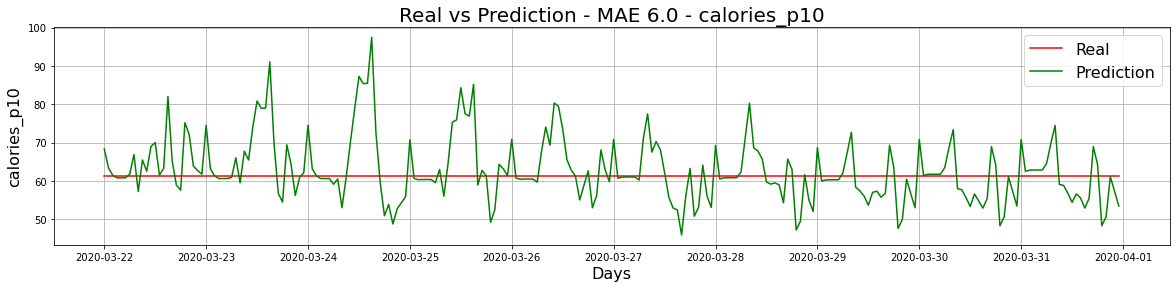

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         65.0            p10
2020-04-02     0    2      4         62.0            p10
2020-04-03     0    3      4         63.0            p10
2020-04-04     0    4      4         62.0            p10
2020-04-05     0    5      4         61.0            p10

In [105]:
#calories prediction
horizon=24*10
X_calories_p10 = calories_p10.drop('calories', axis=1)
y_calories_p10 = calories_p10['calories']
    
#take last week of the dataset for validation
X_train_calories_p10, X_test_calories_p10 = X_calories_p10.iloc[:-horizon,:], X_calories_p10.iloc[-horizon:,:]
y_train_calories_p10, y_test_calories_p10 = y_calories_p10.iloc[:-horizon], y_calories_p10.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p10, y_train_calories_p10)
predictions_calories_p10 = model.predict(X_test_calories_p10)

#calculate MAE
mae_calories_p10 = np.round(mean_absolute_error(y_test_calories_p10, predictions_calories_p10), 1)    
mape_calories_p10 = (mean_absolute_percentage_error(y_test_calories_p10, predictions_calories_p10))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p10} - calories_p10', fontsize=20)
plt.plot(y_test_calories_p10, color='red')
plt.plot(pd.Series(predictions_calories_p10, index=y_test_calories_p10.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p10', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p10 = pd.DataFrame(fut_date)
date_calories_p10 = date_calories_p10.set_index(date_calories_p10.datetime)
date_calories_p10['hour'] = date_calories_p10.index.hour
date_calories_p10['day'] = date_calories_p10.index.day
date_calories_p10['month'] = date_calories_p10.index.month
date_calories_p10.drop('datetime', axis=1, inplace=True)
predictions_calories_p10 = model.predict(date_calories_p10)
date_calories_p10['predictions'] = np.round(predictions_calories_p10.tolist())
date_calories_p10[predictions_calories_p10<0] = 0
date_calories_p10['Participant_ID']= 'p10'

#Saving file for machine learning
file_to_save_calories = date_calories_p10.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p10/calories_p10.csv')

date_calories_p10.head()

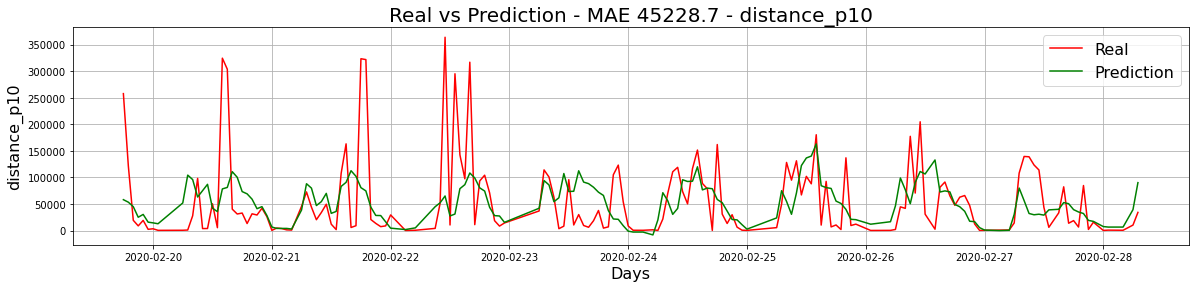

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4       7934.0            p10
2020-04-02     0    2      4       9570.0            p10
2020-04-03     0    3      4       1638.0            p10
2020-04-04     0    4      4      15008.0            p10
2020-04-05     0    5      4       9840.0            p10

In [106]:
#distance prediction
horizon=24*7
X_distance_p10= distance_p10.drop('distance', axis=1)
y_distance_p10 = distance_p10['distance']
    
#take last week of the dataset for validation
X_train_distance_p10, X_test_distance_p10 = X_distance_p10.iloc[:-horizon,:], X_distance_p10.iloc[-horizon:,:]
y_train_distance_p10, y_test_distance_p10 = y_distance_p10.iloc[:-horizon], y_distance_p10.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p10, y_train_distance_p10)
predictions_distance_p10 = model.predict(X_test_distance_p10)

#calculate MAE
mae_distance_p10 =np.round(mean_absolute_error(y_test_distance_p10, predictions_distance_p10),1)    
mape_distance_p10 = (mean_absolute_percentage_error(y_test_distance_p10, predictions_distance_p10))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p10} - distance_p10', fontsize=20)
plt.plot(y_test_distance_p10, color='red')
plt.plot(pd.Series(predictions_distance_p10, index=y_test_distance_p10.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p10', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p10 = pd.DataFrame(fut_date)
date_distance_p10 = date_distance_p10.set_index(date_distance_p10.datetime)
date_distance_p10['hour'] = date_distance_p10.index.hour
date_distance_p10['day'] = date_distance_p10.index.day
date_distance_p10['month'] = date_distance_p10.index.month
date_distance_p10.drop('datetime', axis=1, inplace=True)
predictions_distance_p10 = model.predict(date_distance_p10)
date_distance_p10['predictions'] = np.round(predictions_distance_p10.tolist())
date_distance_p10[predictions_distance_p10<0] = 0
date_distance_p10['Participant_ID']= 'p10'

#Saving file for machine learning
file_to_save_distance = date_distance_p10.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p10/distance_p10.csv')

date_distance_p10.head()

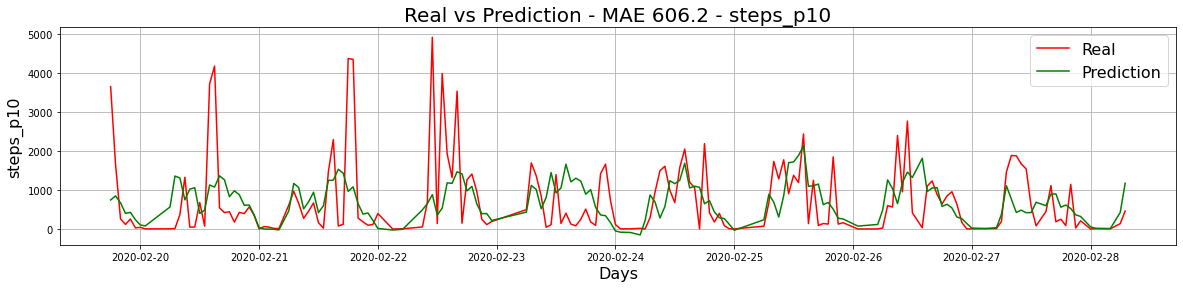

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        188.0            p10
2020-04-02     0    2      4        127.0            p10
2020-04-03     0    3      4         89.0            p10
2020-04-04     0    4      4        161.0            p10
2020-04-05     0    5      4        134.0            p10

In [107]:
#steps prediction
horizon=24*7
X_steps_p10= steps_p10.drop('steps', axis=1)
y_steps_p10 = steps_p10['steps']
    
#take last week of the dataset for validation
X_train_steps_p10, X_test_steps_p10 = X_steps_p10.iloc[:-horizon,:], X_steps_p10.iloc[-horizon:,:]
y_train_steps_p10, y_test_steps_p10 = y_steps_p10.iloc[:-horizon], y_steps_p10.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p10, y_train_steps_p10)
predictions_steps_p10 = model.predict(X_test_steps_p10)

#calculate MAE
mae_steps_p10 =np.round(mean_absolute_error(y_test_steps_p10, predictions_steps_p10),1)    
mape_steps_p10 = (mean_absolute_percentage_error(y_test_steps_p10, predictions_steps_p10))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p10} - steps_p10', fontsize=20)
plt.plot(y_test_steps_p10, color='red')
plt.plot(pd.Series(predictions_steps_p10, index=y_test_steps_p10.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p10', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p10 = pd.DataFrame(fut_date)
date_steps_p10 = date_steps_p10.set_index(date_steps_p10.datetime)
date_steps_p10['hour'] = date_steps_p10.index.hour
date_steps_p10['day'] = date_steps_p10.index.day
date_steps_p10['month'] = date_steps_p10.index.month
date_steps_p10.drop('datetime', axis=1, inplace=True)
predictions_steps_p10 = model.predict(date_steps_p10)
date_steps_p10['predictions'] = np.round(predictions_steps_p10.tolist())
date_steps_p10[predictions_steps_p10<0] = 0
date_steps_p10['Participant_ID']= 'p10'

#Saving file for machine learning
file_to_save_steps = date_steps_p10.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p10/steps_p10.csv')

date_steps_p10.head()

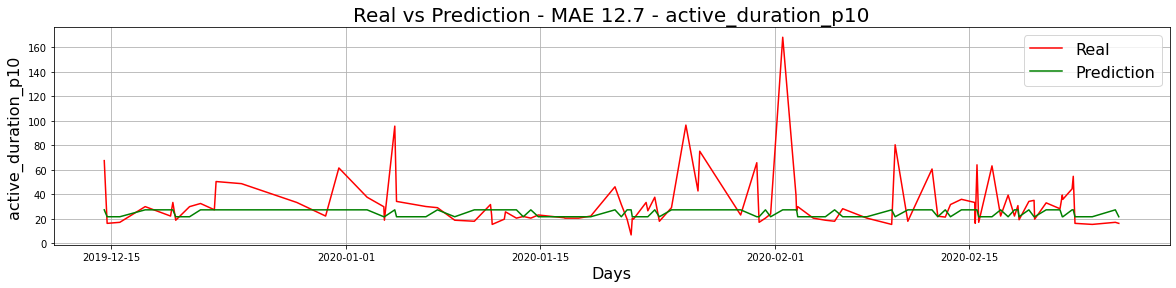

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         27.0            p10
2020-04-02     0    2      4         27.0            p10
2020-04-03     0    3      4         27.0            p10
2020-04-04     0    4      4         27.0            p10
2020-04-05     0    5      4         27.0            p10

In [108]:
#active_duration  prediction
horizon=24*4
X_active_duration_p10= active_duration_p10.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p10 = active_duration_p10['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p10, X_test_active_duration_p10 = X_active_duration_p10.iloc[:-horizon,:], X_active_duration_p10.iloc[-horizon:,:]
y_train_active_duration_p10, y_test_active_duration_p10 = y_active_duration_p10.iloc[:-horizon], y_active_duration_p10.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p10, y_train_active_duration_p10)
predictions_active_duration_p10 = model.predict(X_test_active_duration_p10)

#calculate MAE
mae_active_duration_p10 =np.round(mean_absolute_error(y_test_active_duration_p10, predictions_active_duration_p10),1)    
mape_active_duration_p10 = (mean_absolute_percentage_error(y_test_active_duration_p10, predictions_active_duration_p10))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p10} - active_duration_p10', fontsize=20)
plt.plot(y_test_active_duration_p10, color='red')
plt.plot(pd.Series(predictions_active_duration_p10, index=y_test_active_duration_p10.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p10', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p10 = pd.DataFrame(fut_date)
date_active_duration_p10 = date_active_duration_p10.set_index(date_active_duration_p10.datetime)
date_active_duration_p10['hour'] = date_active_duration_p10.index.hour
date_active_duration_p10['day'] = date_active_duration_p10.index.day
date_active_duration_p10['month'] = date_active_duration_p10.index.month
date_active_duration_p10.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p10 = model.predict(date_active_duration_p10)
date_active_duration_p10['predictions'] = np.round(predictions_active_duration_p10.tolist())
date_active_duration_p10[predictions_active_duration_p10<0] = 0
date_active_duration_p10['Participant_ID']= 'p10'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p10.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p10/active_duration_p10.csv')

date_active_duration_p10.head()

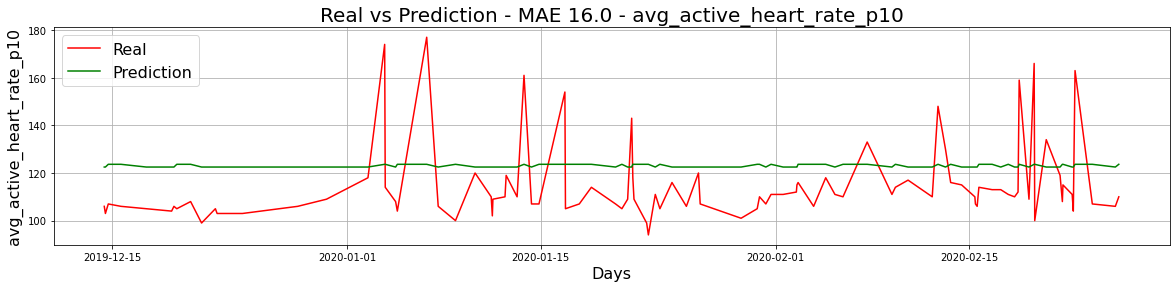

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        123.0            p10
2020-04-02     0    2      4        123.0            p10
2020-04-03     0    3      4        123.0            p10
2020-04-04     0    4      4        123.0            p10
2020-04-05     0    5      4        123.0            p10

In [109]:
#avg_active_heart_rate  prediction
horizon=24*4
X_avg_active_heart_rate_p10= avg_active_heart_rate_p10.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p10 = avg_active_heart_rate_p10['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p10, X_test_avg_active_heart_rate_p10 = X_avg_active_heart_rate_p10.iloc[:-horizon,:], X_avg_active_heart_rate_p10.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p10, y_test_avg_active_heart_rate_p10 = y_avg_active_heart_rate_p10.iloc[:-horizon], y_avg_active_heart_rate_p10.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p10, y_train_avg_active_heart_rate_p10)
predictions_avg_active_heart_rate_p10 = model.predict(X_test_avg_active_heart_rate_p10)

#calculate MAE
mae_avg_active_heart_rate_p10 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p10, predictions_avg_active_heart_rate_p10),1)    
mape_avg_active_heart_rate_p10 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p10, predictions_avg_active_heart_rate_p10))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p10} - avg_active_heart_rate_p10', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p10, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p10, index=y_test_avg_active_heart_rate_p10.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p10', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p10 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p10 = date_avg_active_heart_rate_p10.set_index(date_avg_active_heart_rate_p10.datetime)
date_avg_active_heart_rate_p10['hour'] = date_avg_active_heart_rate_p10.index.hour
date_avg_active_heart_rate_p10['day'] = date_avg_active_heart_rate_p10.index.day
date_avg_active_heart_rate_p10['month'] = date_avg_active_heart_rate_p10.index.month
date_avg_active_heart_rate_p10.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p10 = model.predict(date_avg_active_heart_rate_p10)
date_avg_active_heart_rate_p10['predictions'] = np.round(predictions_avg_active_heart_rate_p10.tolist())
date_avg_active_heart_rate_p10[predictions_avg_active_heart_rate_p10<0] = 0
date_avg_active_heart_rate_p10['Participant_ID']= 'p10'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p10.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p10/avg_active_heart_rate_p10.csv')

date_avg_active_heart_rate_p10.head()

(101, 3)
(53, 2)


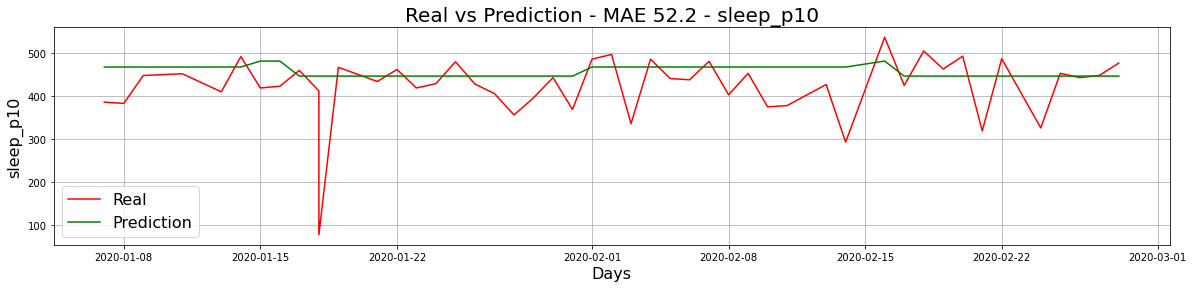

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        468.0            p10
2020-04-02    2      4        468.0            p10
2020-04-03    3      4        468.0            p10
2020-04-04    4      4        468.0            p10
2020-04-05    5      4        468.0            p10

In [110]:
#sleep prediction
horizon=24*2
X_sleep_p10= sleep_p10.drop('Minutes_Asleep', axis=1)
y_sleep_p10 = sleep_p10['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p10, X_test_sleep_p10 = X_sleep_p10.iloc[:-horizon,:], X_sleep_p10.iloc[-horizon:,:]
y_train_sleep_p10, y_test_sleep_p10 = y_sleep_p10.iloc[:-horizon], y_sleep_p10.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p10, y_train_sleep_p10)
predictions_sleep_p10 = model.predict(X_test_sleep_p10)

print(sleep_p10.shape)
print(X_train_sleep_p10.shape)

#calculate MAE
mae_sleep_p10 =np.round(mean_absolute_error(y_test_sleep_p10, predictions_sleep_p10),1)    
mape_sleep_p10 = (mean_absolute_percentage_error(y_test_sleep_p10, predictions_sleep_p10))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p10} - sleep_p10', fontsize=20)
plt.plot(y_test_sleep_p10, color='red')
plt.plot(pd.Series(predictions_sleep_p10, index=y_test_sleep_p10.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p10', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p10 = pd.DataFrame(fut_date)
date_sleep_p10 = date_sleep_p10.set_index(date_sleep_p10.datetime)
#date_sleep_p10['hour'] = date_sleep_p10.index.hour
date_sleep_p10['day'] = date_sleep_p10.index.day
date_sleep_p10['month'] = date_sleep_p10.index.month
date_sleep_p10.drop('datetime', axis=1, inplace=True)
predictions_sleep_p10 = model.predict(date_sleep_p10)
date_sleep_p10['predictions'] = np.round(predictions_sleep_p10.tolist())
date_sleep_p10[predictions_sleep_p10<0] = 0
date_sleep_p10['Participant_ID']= 'p10'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p10.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p10/sleep_p10.csv')

date_sleep_p10.head()

(110, 3)
(86, 2)


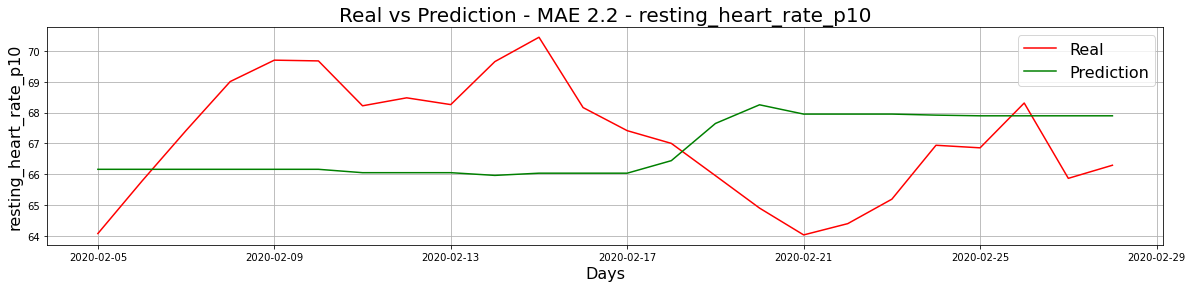

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         66.0            p10
2020-04-02    2      4         66.0            p10
2020-04-03    3      4         66.0            p10
2020-04-04    4      4         66.0            p10
2020-04-05    5      4         66.0            p10

In [111]:
#resting_heart_rate prediction
horizon=24
X_resting_heart_rate_p10= resting_heart_rate_p10.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p10 = resting_heart_rate_p10['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p10, X_test_resting_heart_rate_p10 = X_resting_heart_rate_p10.iloc[:-horizon,:], X_resting_heart_rate_p10.iloc[-horizon:,:]
y_train_resting_heart_rate_p10, y_test_resting_heart_rate_p10 = y_resting_heart_rate_p10.iloc[:-horizon], y_resting_heart_rate_p10.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p10, y_train_resting_heart_rate_p10)
predictions_resting_heart_rate_p10 = model.predict(X_test_resting_heart_rate_p10)

print(resting_heart_rate_p10.shape)
print(X_train_resting_heart_rate_p10.shape)

#calculate MAE
mae_resting_heart_rate_p10 =np.round(mean_absolute_error(y_test_resting_heart_rate_p10, predictions_resting_heart_rate_p10),1)    
mape_resting_heart_rate_p10 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p10, predictions_resting_heart_rate_p10))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p10} - resting_heart_rate_p10', fontsize=20)
plt.plot(y_test_resting_heart_rate_p10, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p10, index=y_test_resting_heart_rate_p10.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p10', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p10 = pd.DataFrame(fut_date)
date_resting_heart_rate_p10 = date_resting_heart_rate_p10.set_index(date_resting_heart_rate_p10.datetime)
#date_resting_heart_rate_p10['hour'] = date_resting_heart_rate_p10.index.hour
date_resting_heart_rate_p10['day'] = date_resting_heart_rate_p10.index.day
date_resting_heart_rate_p10['month'] = date_resting_heart_rate_p10.index.month
date_resting_heart_rate_p10.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p10 = model.predict(date_resting_heart_rate_p10)
date_resting_heart_rate_p10['predictions'] = np.round(predictions_resting_heart_rate_p10.tolist())
date_resting_heart_rate_p10[predictions_resting_heart_rate_p10<0] = 0
date_resting_heart_rate_p10['Participant_ID']= 'p10'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p10.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p10/resting_heart_rate_p10.csv')

date_resting_heart_rate_p10.head()

# Participant 11

In [112]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p11/calories_p11.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p11/distance_p11.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p11/steps_p11.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p11/active_duration_p11.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p11/avg_active_heart_rate_p11.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p11/sleep_p11.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p11/resting_heart_rate_p11.csv'

In [113]:
calories_p11=pd.read_csv(file_to_load1)
distance_p11=pd.read_csv(file_to_load2)
steps_p11=pd.read_csv(file_to_load3)
active_duration_p11=pd.read_csv(file_to_load4)
avg_active_heart_rate_p11=pd.read_csv(file_to_load5)
sleep_p11=pd.read_csv(file_to_load6)
resting_heart_rate_p11=pd.read_csv(file_to_load7)

In [114]:
#Calories
calories_p11['datetime'] = pd.to_datetime(calories_p11['datetime'])
calories_p11 = calories_p11.set_index(calories_p11.datetime)
calories_p11.drop('datetime', axis=1, inplace=True)

#Distance
distance_p11['datetime'] = pd.to_datetime(distance_p11['datetime'])
distance_p11 = distance_p11.set_index(distance_p11.datetime)
distance_p11.drop('datetime', axis=1, inplace=True)

#steps
steps_p11['datetime'] = pd.to_datetime(steps_p11['datetime'])
steps_p11 = steps_p11.set_index(steps_p11.datetime)
steps_p11.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p11['datetime'] = pd.to_datetime(active_duration_p11['datetime'])
active_duration_p11 = active_duration_p11.set_index(active_duration_p11.datetime)
active_duration_p11.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p11['datetime'] = pd.to_datetime(avg_active_heart_rate_p11['datetime'])
avg_active_heart_rate_p11 = avg_active_heart_rate_p11.set_index(avg_active_heart_rate_p11.datetime)
avg_active_heart_rate_p11.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p11['datetime'] = pd.to_datetime(sleep_p11['datetime'])
sleep_p11 = sleep_p11.set_index(sleep_p11.datetime)
sleep_p11.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p11['datetime'] = pd.to_datetime(resting_heart_rate_p11['datetime'])
resting_heart_rate_p11 = resting_heart_rate_p11.set_index(resting_heart_rate_p11.datetime)
resting_heart_rate_p11.drop('datetime', axis=1, inplace=True)

In [115]:
calories_p11 = calories_p11[(calories_p11[['calories']] != 0).any(axis=1)]
distance_p11 = distance_p11[(distance_p11[['distance']] != 0).any(axis=1)]
steps_p11 = steps_p11[(steps_p11[['steps']] != 0).any(axis=1)]
active_duration_p11 = active_duration_p11[(active_duration_p11[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p11 = avg_active_heart_rate_p11[(avg_active_heart_rate_p11[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p11 = sleep_p11[(sleep_p11[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p11 = resting_heart_rate_p11[(resting_heart_rate_p11[['Resting_beats_per_min']] != 0).any(axis=1)]

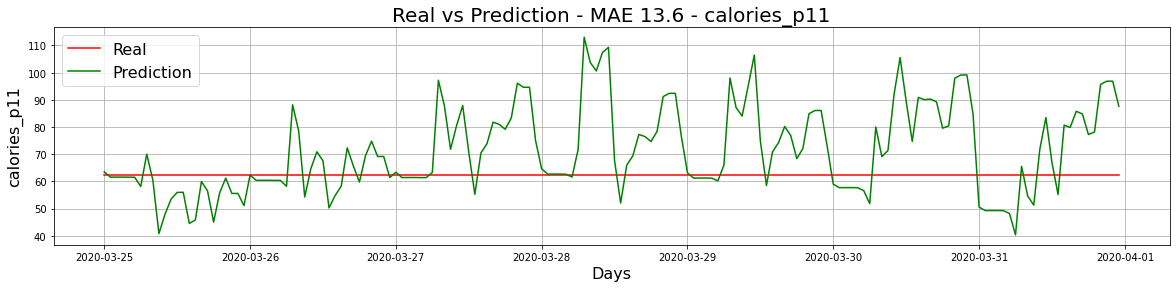

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         71.0            p11
2020-04-02     0    2      4         65.0            p11
2020-04-03     0    3      4         65.0            p11
2020-04-04     0    4      4         68.0            p11
2020-04-05     0    5      4         66.0            p11

In [116]:
#calories prediction
horizon=24*7
X_calories_p11 = calories_p11.drop('calories', axis=1)
y_calories_p11 = calories_p11['calories']
    
#take last week of the dataset for validation
X_train_calories_p11, X_test_calories_p11 = X_calories_p11.iloc[:-horizon,:], X_calories_p11.iloc[-horizon:,:]
y_train_calories_p11, y_test_calories_p11 = y_calories_p11.iloc[:-horizon], y_calories_p11.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p11, y_train_calories_p11)
predictions_calories_p11 = model.predict(X_test_calories_p11)

#calculate MAE
mae_calories_p11 = np.round(mean_absolute_error(y_test_calories_p11, predictions_calories_p11), 1)    
mape_calories_p11 = (mean_absolute_percentage_error(y_test_calories_p11, predictions_calories_p11))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p11} - calories_p11', fontsize=20)
plt.plot(y_test_calories_p11, color='red')
plt.plot(pd.Series(predictions_calories_p11, index=y_test_calories_p11.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p11', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p11 = pd.DataFrame(fut_date)
date_calories_p11 = date_calories_p11.set_index(date_calories_p11.datetime)
date_calories_p11['hour'] = date_calories_p11.index.hour
date_calories_p11['day'] = date_calories_p11.index.day
date_calories_p11['month'] = date_calories_p11.index.month
date_calories_p11.drop('datetime', axis=1, inplace=True)
predictions_calories_p11 = model.predict(date_calories_p11)
date_calories_p11['predictions'] = np.round(predictions_calories_p11.tolist())
date_calories_p11[predictions_calories_p11<0] = 0
date_calories_p11['Participant_ID']= 'p11'

#Saving file for machine learning
file_to_save_calories = date_calories_p11.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p11/calories_p11.csv')

date_calories_p11.head()

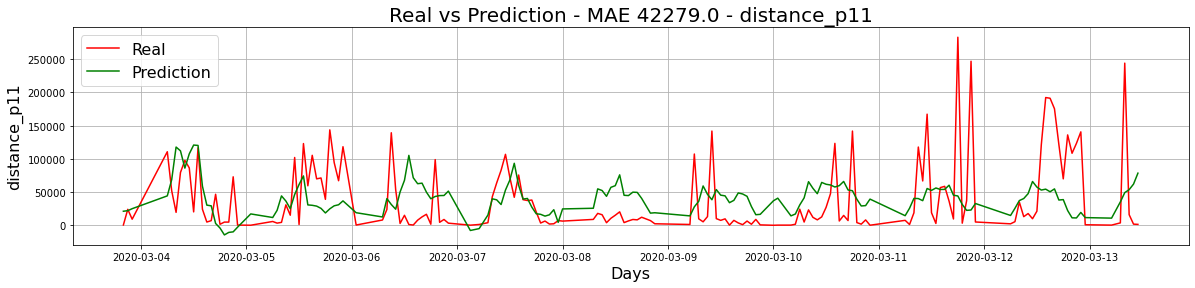

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    0      0          0.0            p11
2020-04-02     0    2      4       8825.0            p11
2020-04-03     0    3      4       8260.0            p11
2020-04-04     0    4      4      29579.0            p11
2020-04-05     0    5      4      13899.0            p11

In [117]:
#distance prediction
horizon=24*7
X_distance_p11= distance_p11.drop('distance', axis=1)
y_distance_p11 = distance_p11['distance']
    
#take last week of the dataset for validation
X_train_distance_p11, X_test_distance_p11 = X_distance_p11.iloc[:-horizon,:], X_distance_p11.iloc[-horizon:,:]
y_train_distance_p11, y_test_distance_p11 = y_distance_p11.iloc[:-horizon], y_distance_p11.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p11, y_train_distance_p11)
predictions_distance_p11 = model.predict(X_test_distance_p11)

#calculate MAE
mae_distance_p11 =np.round(mean_absolute_error(y_test_distance_p11, predictions_distance_p11),1)    
mape_distance_p11 = (mean_absolute_percentage_error(y_test_distance_p11, predictions_distance_p11))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p11} - distance_p11', fontsize=20)
plt.plot(y_test_distance_p11, color='red')
plt.plot(pd.Series(predictions_distance_p11, index=y_test_distance_p11.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p11', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p11 = pd.DataFrame(fut_date)
date_distance_p11 = date_distance_p11.set_index(date_distance_p11.datetime)
date_distance_p11['hour'] = date_distance_p11.index.hour
date_distance_p11['day'] = date_distance_p11.index.day
date_distance_p11['month'] = date_distance_p11.index.month
date_distance_p11.drop('datetime', axis=1, inplace=True)
predictions_distance_p11 = model.predict(date_distance_p11)
date_distance_p11['predictions'] = np.round(predictions_distance_p11.tolist())
date_distance_p11[predictions_distance_p11<0] = 0
date_distance_p11['Participant_ID']= 'p11'

#Saving file for machine learning
file_to_save_distance = date_distance_p11.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p11/distance_p11.csv')

date_distance_p11.head()

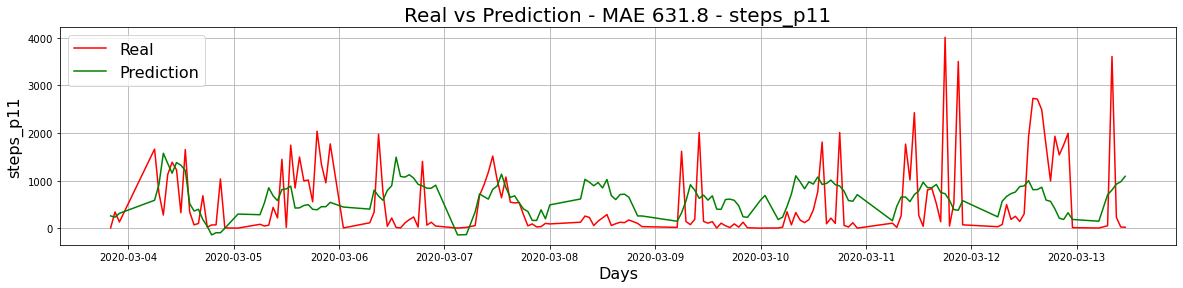

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         62.0            p11
2020-04-02     0    2      4        213.0            p11
2020-04-03     0    3      4         69.0            p11
2020-04-04     0    4      4        349.0            p11
2020-04-05     0    5      4        245.0            p11

In [118]:
#steps prediction
horizon=24*7
X_steps_p11= steps_p11.drop('steps', axis=1)
y_steps_p11 = steps_p11['steps']
    
#take last week of the dataset for validation
X_train_steps_p11, X_test_steps_p11 = X_steps_p11.iloc[:-horizon,:], X_steps_p11.iloc[-horizon:,:]
y_train_steps_p11, y_test_steps_p11 = y_steps_p11.iloc[:-horizon], y_steps_p11.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p11, y_train_steps_p11)
predictions_steps_p11 = model.predict(X_test_steps_p11)

#calculate MAE
mae_steps_p11 =np.round(mean_absolute_error(y_test_steps_p11, predictions_steps_p11),1)    
mape_steps_p11 = (mean_absolute_percentage_error(y_test_steps_p11, predictions_steps_p11))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p11} - steps_p11', fontsize=20)
plt.plot(y_test_steps_p11, color='red')
plt.plot(pd.Series(predictions_steps_p11, index=y_test_steps_p11.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p11', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p11 = pd.DataFrame(fut_date)
date_steps_p11 = date_steps_p11.set_index(date_steps_p11.datetime)
date_steps_p11['hour'] = date_steps_p11.index.hour
date_steps_p11['day'] = date_steps_p11.index.day
date_steps_p11['month'] = date_steps_p11.index.month
date_steps_p11.drop('datetime', axis=1, inplace=True)
predictions_steps_p11 = model.predict(date_steps_p11)
date_steps_p11['predictions'] = np.round(predictions_steps_p11.tolist())
date_steps_p11[predictions_steps_p11<0] = 0
date_steps_p11['Participant_ID']= 'p11'

#Saving file for machine learning
file_to_save_steps = date_steps_p11.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p11/steps_p11.csv')

date_steps_p11.head()

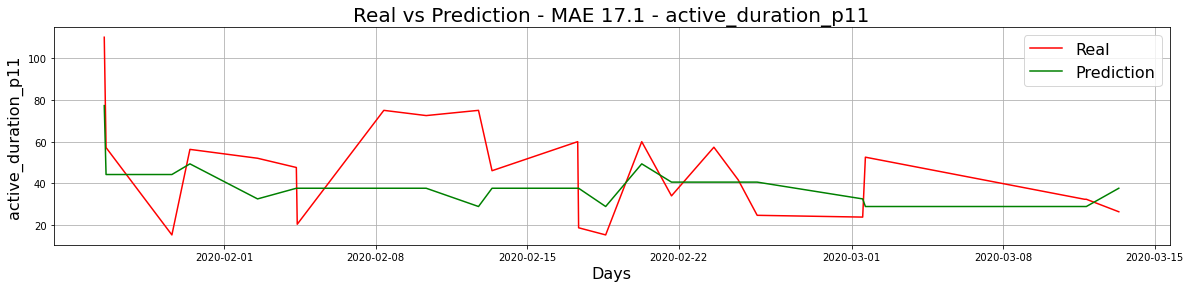

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         38.0            p11
2020-04-02     0    2      4         38.0            p11
2020-04-03     0    3      4         38.0            p11
2020-04-04     0    4      4         38.0            p11
2020-04-05     0    5      4         38.0            p11

In [119]:
#active_duration  prediction
horizon=24*1
X_active_duration_p11= active_duration_p11.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p11 = active_duration_p11['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p11, X_test_active_duration_p11 = X_active_duration_p11.iloc[:-horizon,:], X_active_duration_p11.iloc[-horizon:,:]
y_train_active_duration_p11, y_test_active_duration_p11 = y_active_duration_p11.iloc[:-horizon], y_active_duration_p11.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p11, y_train_active_duration_p11)
predictions_active_duration_p11 = model.predict(X_test_active_duration_p11)

#calculate MAE
mae_active_duration_p11 =np.round(mean_absolute_error(y_test_active_duration_p11, predictions_active_duration_p11),1)    
mape_active_duration_p11 = (mean_absolute_percentage_error(y_test_active_duration_p11, predictions_active_duration_p11))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p11} - active_duration_p11', fontsize=20)
plt.plot(y_test_active_duration_p11, color='red')
plt.plot(pd.Series(predictions_active_duration_p11, index=y_test_active_duration_p11.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p11', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p11 = pd.DataFrame(fut_date)
date_active_duration_p11 = date_active_duration_p11.set_index(date_active_duration_p11.datetime)
date_active_duration_p11['hour'] = date_active_duration_p11.index.hour
date_active_duration_p11['day'] = date_active_duration_p11.index.day
date_active_duration_p11['month'] = date_active_duration_p11.index.month
date_active_duration_p11.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p11 = model.predict(date_active_duration_p11)
date_active_duration_p11['predictions'] = np.round(predictions_active_duration_p11.tolist())
date_active_duration_p11[predictions_active_duration_p11<0] = 0
date_active_duration_p11['Participant_ID']= 'p11'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p11.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p11/active_duration_p11.csv')

date_active_duration_p11.head()

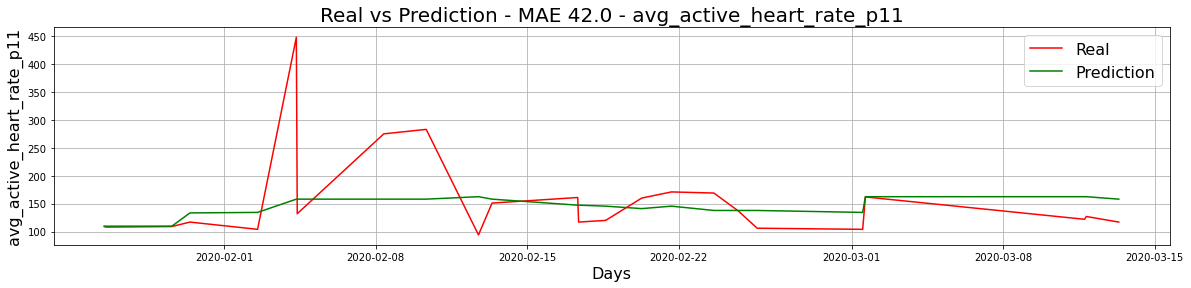

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        158.0            p11
2020-04-02     0    2      4        158.0            p11
2020-04-03     0    3      4        158.0            p11
2020-04-04     0    4      4        158.0            p11
2020-04-05     0    5      4        158.0            p11

In [120]:
#avg_active_heart_rate  prediction
horizon=24*1
X_avg_active_heart_rate_p11= avg_active_heart_rate_p11.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p11 = avg_active_heart_rate_p11['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p11, X_test_avg_active_heart_rate_p11 = X_avg_active_heart_rate_p11.iloc[:-horizon,:], X_avg_active_heart_rate_p11.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p11, y_test_avg_active_heart_rate_p11 = y_avg_active_heart_rate_p11.iloc[:-horizon], y_avg_active_heart_rate_p11.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p11, y_train_avg_active_heart_rate_p11)
predictions_avg_active_heart_rate_p11 = model.predict(X_test_avg_active_heart_rate_p11)

#calculate MAE
mae_avg_active_heart_rate_p11 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p11, predictions_avg_active_heart_rate_p11),1)    
mape_avg_active_heart_rate_p11 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p11, predictions_avg_active_heart_rate_p11))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p11} - avg_active_heart_rate_p11', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p11, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p11, index=y_test_avg_active_heart_rate_p11.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p11', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p11 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p11 = date_avg_active_heart_rate_p11.set_index(date_avg_active_heart_rate_p11.datetime)
date_avg_active_heart_rate_p11['hour'] = date_avg_active_heart_rate_p11.index.hour
date_avg_active_heart_rate_p11['day'] = date_avg_active_heart_rate_p11.index.day
date_avg_active_heart_rate_p11['month'] = date_avg_active_heart_rate_p11.index.month
date_avg_active_heart_rate_p11.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p11 = model.predict(date_avg_active_heart_rate_p11)
date_avg_active_heart_rate_p11['predictions'] = np.round(predictions_avg_active_heart_rate_p11.tolist())
date_avg_active_heart_rate_p11[predictions_avg_active_heart_rate_p11<0] = 0
date_avg_active_heart_rate_p11['Participant_ID']= 'p11'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p11.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p11/avg_active_heart_rate_p11.csv')

date_avg_active_heart_rate_p11.head()

(124, 3)
(76, 2)


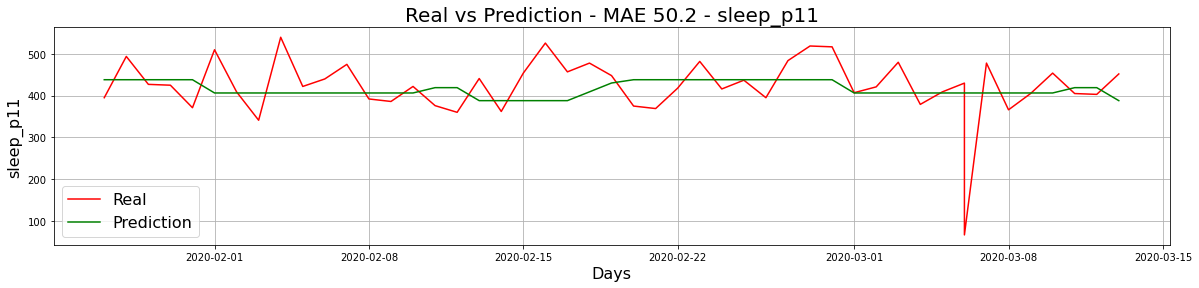

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        406.0            p11
2020-04-02    2      4        406.0            p11
2020-04-03    3      4        406.0            p11
2020-04-04    4      4        406.0            p11
2020-04-05    5      4        406.0            p11

In [121]:
#sleep prediction
horizon=24*2
X_sleep_p11= sleep_p11.drop('Minutes_Asleep', axis=1)
y_sleep_p11 = sleep_p11['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p11, X_test_sleep_p11 = X_sleep_p11.iloc[:-horizon,:], X_sleep_p11.iloc[-horizon:,:]
y_train_sleep_p11, y_test_sleep_p11 = y_sleep_p11.iloc[:-horizon], y_sleep_p11.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p11, y_train_sleep_p11)
predictions_sleep_p11 = model.predict(X_test_sleep_p11)

print(sleep_p11.shape)
print(X_train_sleep_p11.shape)

#calculate MAE
mae_sleep_p11 =np.round(mean_absolute_error(y_test_sleep_p11, predictions_sleep_p11),1)    
mape_sleep_p11 = (mean_absolute_percentage_error(y_test_sleep_p11, predictions_sleep_p11))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p11} - sleep_p11', fontsize=20)
plt.plot(y_test_sleep_p11, color='red')
plt.plot(pd.Series(predictions_sleep_p11, index=y_test_sleep_p11.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p11', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p11 = pd.DataFrame(fut_date)
date_sleep_p11 = date_sleep_p11.set_index(date_sleep_p11.datetime)
#date_sleep_p11['hour'] = date_sleep_p11.index.hour
date_sleep_p11['day'] = date_sleep_p11.index.day
date_sleep_p11['month'] = date_sleep_p11.index.month
date_sleep_p11.drop('datetime', axis=1, inplace=True)
predictions_sleep_p11 = model.predict(date_sleep_p11)
date_sleep_p11['predictions'] = np.round(predictions_sleep_p11.tolist())
date_sleep_p11[predictions_sleep_p11<0] = 0
date_sleep_p11['Participant_ID']= 'p11'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p11.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p11/sleep_p11.csv')

date_sleep_p11.head()

(80, 3)
(56, 2)


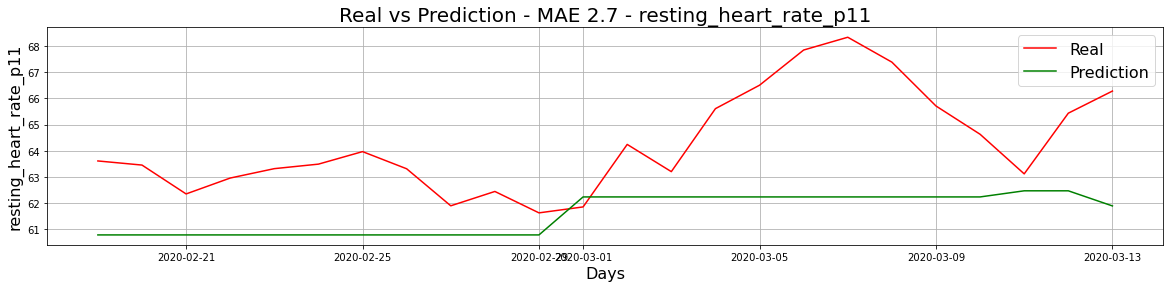

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         62.0            p11
2020-04-02    2      4         62.0            p11
2020-04-03    3      4         62.0            p11
2020-04-04    4      4         62.0            p11
2020-04-05    5      4         62.0            p11

In [122]:
#resting_heart_rate prediction
horizon=24
X_resting_heart_rate_p11= resting_heart_rate_p11.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p11 = resting_heart_rate_p11['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p11, X_test_resting_heart_rate_p11 = X_resting_heart_rate_p11.iloc[:-horizon,:], X_resting_heart_rate_p11.iloc[-horizon:,:]
y_train_resting_heart_rate_p11, y_test_resting_heart_rate_p11 = y_resting_heart_rate_p11.iloc[:-horizon], y_resting_heart_rate_p11.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p11, y_train_resting_heart_rate_p11)
predictions_resting_heart_rate_p11 = model.predict(X_test_resting_heart_rate_p11)

print(resting_heart_rate_p11.shape)
print(X_train_resting_heart_rate_p11.shape)

#calculate MAE
mae_resting_heart_rate_p11 =np.round(mean_absolute_error(y_test_resting_heart_rate_p11, predictions_resting_heart_rate_p11),1)    
mape_resting_heart_rate_p11 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p11, predictions_resting_heart_rate_p11))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p11} - resting_heart_rate_p11', fontsize=20)
plt.plot(y_test_resting_heart_rate_p11, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p11, index=y_test_resting_heart_rate_p11.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p11', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p11 = pd.DataFrame(fut_date)
date_resting_heart_rate_p11 = date_resting_heart_rate_p11.set_index(date_resting_heart_rate_p11.datetime)
#date_resting_heart_rate_p11['hour'] = date_resting_heart_rate_p11.index.hour
date_resting_heart_rate_p11['day'] = date_resting_heart_rate_p11.index.day
date_resting_heart_rate_p11['month'] = date_resting_heart_rate_p11.index.month
date_resting_heart_rate_p11.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p11 = model.predict(date_resting_heart_rate_p11)
date_resting_heart_rate_p11['predictions'] = np.round(predictions_resting_heart_rate_p11.tolist())
date_resting_heart_rate_p11[predictions_resting_heart_rate_p11<0] = 0
date_resting_heart_rate_p11['Participant_ID']= 'p11'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p11.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p11/resting_heart_rate_p11.csv')

date_resting_heart_rate_p11.head()

# Participant 12

In [123]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p12/calories_p12.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p12/distance_p12.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p12/steps_p12.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p12/active_duration_p12.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p12/avg_active_heart_rate_p12.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p12/sleep_p12.csv'
#file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p12/resting_heart_rate_p12.csv'

In [124]:
calories_p12=pd.read_csv(file_to_load1)
distance_p12=pd.read_csv(file_to_load2)
steps_p12=pd.read_csv(file_to_load3)
active_duration_p12=pd.read_csv(file_to_load4)
avg_active_heart_rate_p12=pd.read_csv(file_to_load5)
sleep_p12=pd.read_csv(file_to_load6)
#resting_heart_rate_p12=pd.read_csv(file_to_load7)

In [125]:
#Calories
calories_p12['datetime'] = pd.to_datetime(calories_p12['datetime'])
calories_p12 = calories_p12.set_index(calories_p12.datetime)
calories_p12.drop('datetime', axis=1, inplace=True)

#Distance
distance_p12['datetime'] = pd.to_datetime(distance_p12['datetime'])
distance_p12 = distance_p12.set_index(distance_p12.datetime)
distance_p12.drop('datetime', axis=1, inplace=True)

#steps
steps_p12['datetime'] = pd.to_datetime(steps_p12['datetime'])
steps_p12 = steps_p12.set_index(steps_p12.datetime)
steps_p12.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p12['datetime'] = pd.to_datetime(active_duration_p12['datetime'])
active_duration_p12 = active_duration_p12.set_index(active_duration_p12.datetime)
active_duration_p12.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p12['datetime'] = pd.to_datetime(avg_active_heart_rate_p12['datetime'])
avg_active_heart_rate_p12 = avg_active_heart_rate_p12.set_index(avg_active_heart_rate_p12.datetime)
avg_active_heart_rate_p12.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p12['datetime'] = pd.to_datetime(sleep_p12['datetime'])
sleep_p12 = sleep_p12.set_index(sleep_p12.datetime)
sleep_p12.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
#resting_heart_rate_p12['datetime'] = pd.to_datetime(resting_heart_rate_p12['datetime'])
#resting_heart_rate_p12 = resting_heart_rate_p12.set_index(resting_heart_rate_p12.datetime)
#resting_heart_rate_p12.drop('datetime', axis=1, inplace=True)

In [126]:
calories_p12 = calories_p12[(calories_p12[['calories']] != 0).any(axis=1)]
distance_p12 = distance_p12[(distance_p12[['distance']] != 0).any(axis=1)]
steps_p12 = steps_p12[(steps_p12[['steps']] != 0).any(axis=1)]
active_duration_p12 = active_duration_p12[(active_duration_p12[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p12 = avg_active_heart_rate_p12[(avg_active_heart_rate_p12[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p12 = sleep_p12[(sleep_p12[['Minutes_Asleep']] != 0).any(axis=1)]
#resting_heart_rate_p12 = resting_heart_rate_p12[(resting_heart_rate_p12[['Resting_beats_per_min']] != 0).any(axis=1)]

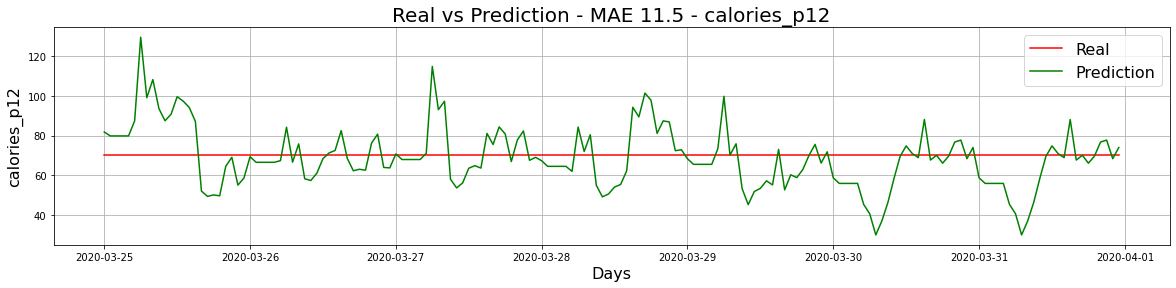

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         68.0            p12
2020-04-02     0    2      4         82.0            p12
2020-04-03     0    3      4         71.0            p12
2020-04-04     0    4      4         71.0            p12
2020-04-05     0    5      4         72.0            p12

In [127]:
#calories prediction
horizon=24*7
X_calories_p12 = calories_p12.drop('calories', axis=1)
y_calories_p12 = calories_p12['calories']
    
#take last week of the dataset for validation
X_train_calories_p12, X_test_calories_p12 = X_calories_p12.iloc[:-horizon,:], X_calories_p12.iloc[-horizon:,:]
y_train_calories_p12, y_test_calories_p12 = y_calories_p12.iloc[:-horizon], y_calories_p12.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p12, y_train_calories_p12)
predictions_calories_p12 = model.predict(X_test_calories_p12)

#calculate MAE
mae_calories_p12 = np.round(mean_absolute_error(y_test_calories_p12, predictions_calories_p12), 1)    
mape_calories_p12 = (mean_absolute_percentage_error(y_test_calories_p12, predictions_calories_p12))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p12} - calories_p12', fontsize=20)
plt.plot(y_test_calories_p12, color='red')
plt.plot(pd.Series(predictions_calories_p12, index=y_test_calories_p12.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p12', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p12 = pd.DataFrame(fut_date)
date_calories_p12 = date_calories_p12.set_index(date_calories_p12.datetime)
date_calories_p12['hour'] = date_calories_p12.index.hour
date_calories_p12['day'] = date_calories_p12.index.day
date_calories_p12['month'] = date_calories_p12.index.month
date_calories_p12.drop('datetime', axis=1, inplace=True)
predictions_calories_p12 = model.predict(date_calories_p12)
date_calories_p12['predictions'] = np.round(predictions_calories_p12.tolist())
date_calories_p12[predictions_calories_p12<0] = 0
date_calories_p12['Participant_ID']= 'p12'

#Saving file for machine learning
file_to_save_calories = date_calories_p12.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p12/calories_p12.csv')

date_calories_p12.head()

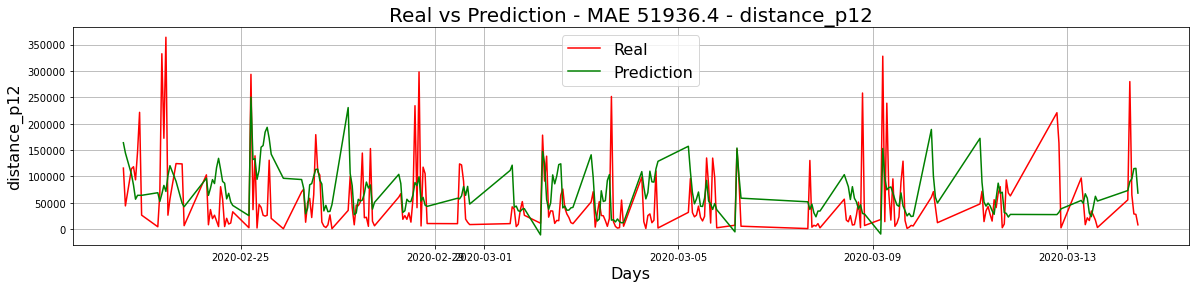

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    0      0          0.0            p12
2020-04-02     0    0      0          0.0            p12
2020-04-03     0    0      0          0.0            p12
2020-04-04     0    0      0          0.0            p12
2020-04-05     0    0      0          0.0            p12

In [128]:
#distance prediction
horizon=24*10
X_distance_p12= distance_p12.drop('distance', axis=1)
y_distance_p12 = distance_p12['distance']
    
#take last week of the dataset for validation
X_train_distance_p12, X_test_distance_p12 = X_distance_p12.iloc[:-horizon,:], X_distance_p12.iloc[-horizon:,:]
y_train_distance_p12, y_test_distance_p12 = y_distance_p12.iloc[:-horizon], y_distance_p12.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p12, y_train_distance_p12)
predictions_distance_p12 = model.predict(X_test_distance_p12)

#calculate MAE
mae_distance_p12 =np.round(mean_absolute_error(y_test_distance_p12, predictions_distance_p12),1)    
mape_distance_p12 = (mean_absolute_percentage_error(y_test_distance_p12, predictions_distance_p12))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p12} - distance_p12', fontsize=20)
plt.plot(y_test_distance_p12, color='red')
plt.plot(pd.Series(predictions_distance_p12, index=y_test_distance_p12.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p12', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p12 = pd.DataFrame(fut_date)
date_distance_p12 = date_distance_p12.set_index(date_distance_p12.datetime)
date_distance_p12['hour'] = date_distance_p12.index.hour
date_distance_p12['day'] = date_distance_p12.index.day
date_distance_p12['month'] = date_distance_p12.index.month
date_distance_p12.drop('datetime', axis=1, inplace=True)
predictions_distance_p12 = model.predict(date_distance_p12)
date_distance_p12['predictions'] = np.round(predictions_distance_p12.tolist())
date_distance_p12[predictions_distance_p12<0] = 0
date_distance_p12['Participant_ID']= 'p12'

#Saving file for machine learning
file_to_save_distance = date_distance_p12.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p12/distance_p12.csv')

date_distance_p12.head()

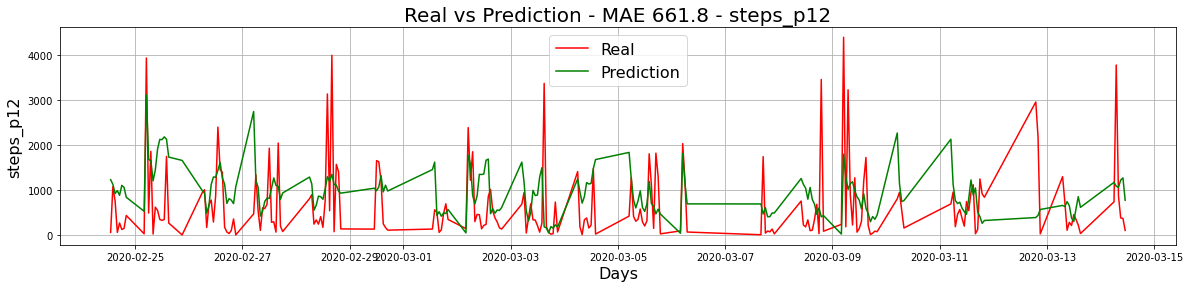

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    0      0          0.0            p12
2020-04-02     0    2      4         52.0            p12
2020-04-03     0    0      0          0.0            p12
2020-04-04     0    4      4         78.0            p12
2020-04-05     0    5      4         66.0            p12

In [129]:
#steps prediction
horizon=24*9
X_steps_p12= steps_p12.drop('steps', axis=1)
y_steps_p12 = steps_p12['steps']
    
#take last week of the dataset for validation
X_train_steps_p12, X_test_steps_p12 = X_steps_p12.iloc[:-horizon,:], X_steps_p12.iloc[-horizon:,:]
y_train_steps_p12, y_test_steps_p12 = y_steps_p12.iloc[:-horizon], y_steps_p12.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p12, y_train_steps_p12)
predictions_steps_p12 = model.predict(X_test_steps_p12)

#calculate MAE
mae_steps_p12 =np.round(mean_absolute_error(y_test_steps_p12, predictions_steps_p12),1)    
mape_steps_p12 = (mean_absolute_percentage_error(y_test_steps_p12, predictions_steps_p12))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p12} - steps_p12', fontsize=20)
plt.plot(y_test_steps_p12, color='red')
plt.plot(pd.Series(predictions_steps_p12, index=y_test_steps_p12.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p12', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p12 = pd.DataFrame(fut_date)
date_steps_p12 = date_steps_p12.set_index(date_steps_p12.datetime)
date_steps_p12['hour'] = date_steps_p12.index.hour
date_steps_p12['day'] = date_steps_p12.index.day
date_steps_p12['month'] = date_steps_p12.index.month
date_steps_p12.drop('datetime', axis=1, inplace=True)
predictions_steps_p12 = model.predict(date_steps_p12)
date_steps_p12['predictions'] = np.round(predictions_steps_p12.tolist())
date_steps_p12[predictions_steps_p12<0] = 0
date_steps_p12['Participant_ID']= 'p12'

#Saving file for machine learning
file_to_save_steps = date_steps_p12.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p12/steps_p12.csv')

date_steps_p12.head()

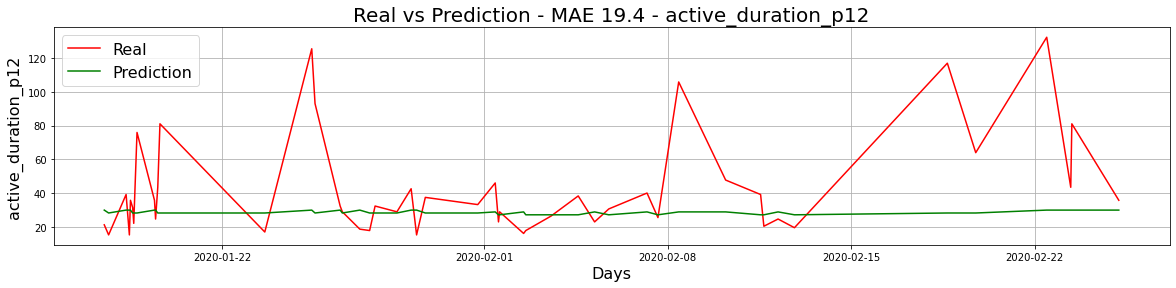

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         29.0            p12
2020-04-02     0    2      4         29.0            p12
2020-04-03     0    3      4         29.0            p12
2020-04-04     0    4      4         29.0            p12
2020-04-05     0    5      4         29.0            p12

In [130]:
#active_duration  prediction
horizon=24*2
X_active_duration_p12= active_duration_p12.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p12 = active_duration_p12['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p12, X_test_active_duration_p12 = X_active_duration_p12.iloc[:-horizon,:], X_active_duration_p12.iloc[-horizon:,:]
y_train_active_duration_p12, y_test_active_duration_p12 = y_active_duration_p12.iloc[:-horizon], y_active_duration_p12.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p12, y_train_active_duration_p12)
predictions_active_duration_p12 = model.predict(X_test_active_duration_p12)

#calculate MAE
mae_active_duration_p12 =np.round(mean_absolute_error(y_test_active_duration_p12, predictions_active_duration_p12),1)    
mape_active_duration_p12 = (mean_absolute_percentage_error(y_test_active_duration_p12, predictions_active_duration_p12))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p12} - active_duration_p12', fontsize=20)
plt.plot(y_test_active_duration_p12, color='red')
plt.plot(pd.Series(predictions_active_duration_p12, index=y_test_active_duration_p12.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p12', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p12 = pd.DataFrame(fut_date)
date_active_duration_p12 = date_active_duration_p12.set_index(date_active_duration_p12.datetime)
date_active_duration_p12['hour'] = date_active_duration_p12.index.hour
date_active_duration_p12['day'] = date_active_duration_p12.index.day
date_active_duration_p12['month'] = date_active_duration_p12.index.month
date_active_duration_p12.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p12 = model.predict(date_active_duration_p12)
date_active_duration_p12['predictions'] = np.round(predictions_active_duration_p12.tolist())
date_active_duration_p12[predictions_active_duration_p12<0] = 0
date_active_duration_p12['Participant_ID']= 'p12'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p12.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p12/active_duration_p12.csv')

date_active_duration_p12.head()

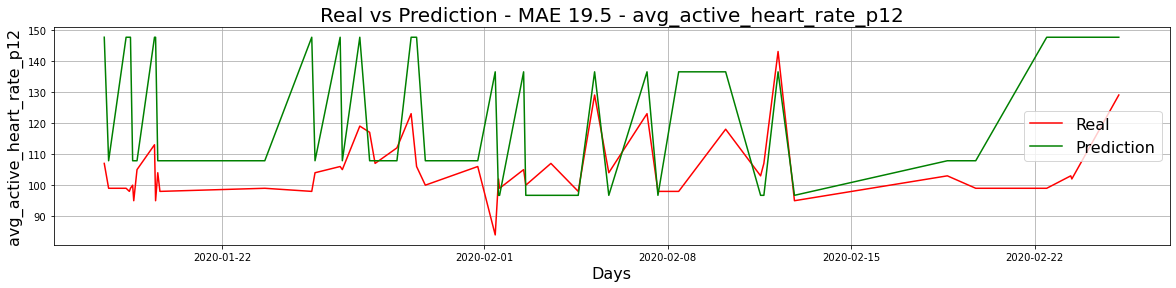

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        136.0            p12
2020-04-02     0    2      4        136.0            p12
2020-04-03     0    3      4        136.0            p12
2020-04-04     0    4      4        136.0            p12
2020-04-05     0    5      4        136.0            p12

In [131]:
#avg_active_heart_rate  prediction
horizon=24*2
X_avg_active_heart_rate_p12= avg_active_heart_rate_p12.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p12 = avg_active_heart_rate_p12['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p12, X_test_avg_active_heart_rate_p12 = X_avg_active_heart_rate_p12.iloc[:-horizon,:], X_avg_active_heart_rate_p12.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p12, y_test_avg_active_heart_rate_p12 = y_avg_active_heart_rate_p12.iloc[:-horizon], y_avg_active_heart_rate_p12.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p12, y_train_avg_active_heart_rate_p12)
predictions_avg_active_heart_rate_p12 = model.predict(X_test_avg_active_heart_rate_p12)

#calculate MAE
mae_avg_active_heart_rate_p12 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p12, predictions_avg_active_heart_rate_p12),1)    
mape_avg_active_heart_rate_p12 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p12, predictions_avg_active_heart_rate_p12))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p12} - avg_active_heart_rate_p12', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p12, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p12, index=y_test_avg_active_heart_rate_p12.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p12', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p12 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p12 = date_avg_active_heart_rate_p12.set_index(date_avg_active_heart_rate_p12.datetime)
date_avg_active_heart_rate_p12['hour'] = date_avg_active_heart_rate_p12.index.hour
date_avg_active_heart_rate_p12['day'] = date_avg_active_heart_rate_p12.index.day
date_avg_active_heart_rate_p12['month'] = date_avg_active_heart_rate_p12.index.month
date_avg_active_heart_rate_p12.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p12 = model.predict(date_avg_active_heart_rate_p12)
date_avg_active_heart_rate_p12['predictions'] = np.round(predictions_avg_active_heart_rate_p12.tolist())
date_avg_active_heart_rate_p12[predictions_avg_active_heart_rate_p12<0] = 0
date_avg_active_heart_rate_p12['Participant_ID']= 'p12'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p12.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p12/avg_active_heart_rate_p12.csv')

date_avg_active_heart_rate_p12.head()

(8, 3)
(6, 2)


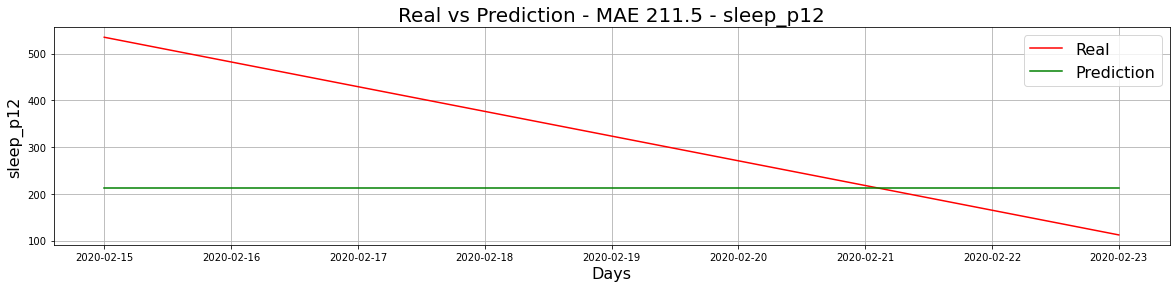

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        213.0            p12
2020-04-02    2      4        213.0            p12
2020-04-03    3      4        213.0            p12
2020-04-04    4      4        213.0            p12
2020-04-05    5      4        213.0            p12

In [132]:
#sleep prediction
horizon=2
X_sleep_p12= sleep_p12.drop('Minutes_Asleep', axis=1)
y_sleep_p12 = sleep_p12['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p12, X_test_sleep_p12 = X_sleep_p12.iloc[:-horizon,:], X_sleep_p12.iloc[-horizon:,:]
y_train_sleep_p12, y_test_sleep_p12 = y_sleep_p12.iloc[:-horizon], y_sleep_p12.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p12, y_train_sleep_p12)
predictions_sleep_p12 = model.predict(X_test_sleep_p12)

print(sleep_p12.shape)
print(X_train_sleep_p12.shape)

#calculate MAE
mae_sleep_p12 =np.round(mean_absolute_error(y_test_sleep_p12, predictions_sleep_p12),1)    
mape_sleep_p12 = (mean_absolute_percentage_error(y_test_sleep_p12, predictions_sleep_p12))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p12} - sleep_p12', fontsize=20)
plt.plot(y_test_sleep_p12, color='red')
plt.plot(pd.Series(predictions_sleep_p12, index=y_test_sleep_p12.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p12', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p12 = pd.DataFrame(fut_date)
date_sleep_p12 = date_sleep_p12.set_index(date_sleep_p12.datetime)
#date_sleep_p12['hour'] = date_sleep_p12.index.hour
date_sleep_p12['day'] = date_sleep_p12.index.day
date_sleep_p12['month'] = date_sleep_p12.index.month
date_sleep_p12.drop('datetime', axis=1, inplace=True)
predictions_sleep_p12 = model.predict(date_sleep_p12)
date_sleep_p12['predictions'] = np.round(predictions_sleep_p12.tolist())
date_sleep_p12[predictions_sleep_p12<0] = 0
date_sleep_p12['Participant_ID']= 'p12'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p12.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p12/sleep_p12.csv')

date_sleep_p12.head()

# Participant 13

In [133]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p13/calories_p13.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p13/distance_p13.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p13/steps_p13.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p13/active_duration_p13.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p13/avg_active_heart_rate_p13.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p13/sleep_p13.csv'
#file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p13/resting_heart_rate_p13.csv'

In [134]:
calories_p13=pd.read_csv(file_to_load1)
distance_p13=pd.read_csv(file_to_load2)
steps_p13=pd.read_csv(file_to_load3)
active_duration_p13=pd.read_csv(file_to_load4)
avg_active_heart_rate_p13=pd.read_csv(file_to_load5)
sleep_p13=pd.read_csv(file_to_load6)
#resting_heart_rate_p13=pd.read_csv(file_to_load7)

In [135]:
#Calories
calories_p13['datetime'] = pd.to_datetime(calories_p13['datetime'])
calories_p13 = calories_p13.set_index(calories_p13.datetime)
calories_p13.drop('datetime', axis=1, inplace=True)

#Distance
distance_p13['datetime'] = pd.to_datetime(distance_p13['datetime'])
distance_p13 = distance_p13.set_index(distance_p13.datetime)
distance_p13.drop('datetime', axis=1, inplace=True)

#steps
steps_p13['datetime'] = pd.to_datetime(steps_p13['datetime'])
steps_p13 = steps_p13.set_index(steps_p13.datetime)
steps_p13.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p13['datetime'] = pd.to_datetime(active_duration_p13['datetime'])
active_duration_p13 = active_duration_p13.set_index(active_duration_p13.datetime)
active_duration_p13.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p13['datetime'] = pd.to_datetime(avg_active_heart_rate_p13['datetime'])
avg_active_heart_rate_p13 = avg_active_heart_rate_p13.set_index(avg_active_heart_rate_p13.datetime)
avg_active_heart_rate_p13.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p13['datetime'] = pd.to_datetime(sleep_p13['datetime'])
sleep_p13 = sleep_p13.set_index(sleep_p13.datetime)
sleep_p13.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
#resting_heart_rate_p13['datetime'] = pd.to_datetime(resting_heart_rate_p13['datetime'])
#resting_heart_rate_p13 = resting_heart_rate_p13.set_index(resting_heart_rate_p13.datetime)
#resting_heart_rate_p13.drop('datetime', axis=1, inplace=True)

In [136]:
calories_p13 = calories_p13[(calories_p13[['calories']] != 0).any(axis=1)]
distance_p13 = distance_p13[(distance_p13[['distance']] != 0).any(axis=1)]
steps_p13 = steps_p13[(steps_p13[['steps']] != 0).any(axis=1)]
active_duration_p13 = active_duration_p13[(active_duration_p13[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p13 = avg_active_heart_rate_p13[(avg_active_heart_rate_p13[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p13 = sleep_p13[(sleep_p13[['Minutes_Asleep']] != 0).any(axis=1)]
#resting_heart_rate_p13 = resting_heart_rate_p13[(resting_heart_rate_p13[['Resting_beats_per_min']] != 0).any(axis=1)]

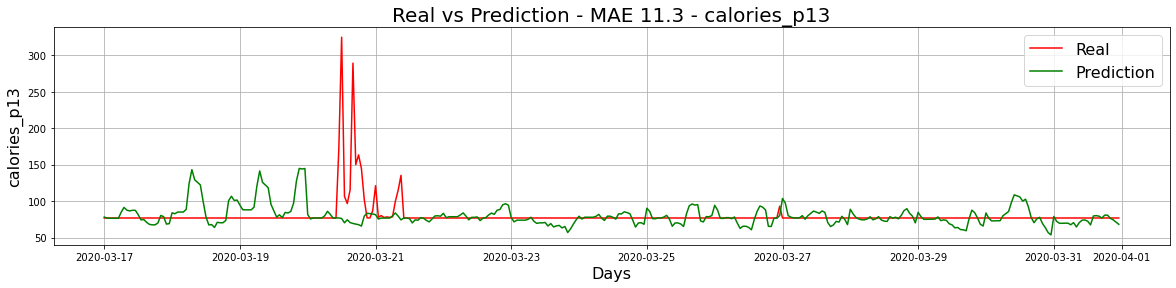

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         80.0            p13
2020-04-02     0    2      4         80.0            p13
2020-04-03     0    3      4         79.0            p13
2020-04-04     0    4      4         77.0            p13
2020-04-05     0    5      4         77.0            p13

In [137]:
#calories prediction
horizon=24*15
X_calories_p13 = calories_p13.drop('calories', axis=1)
y_calories_p13 = calories_p13['calories']
    
#take last week of the dataset for validation
X_train_calories_p13, X_test_calories_p13 = X_calories_p13.iloc[:-horizon,:], X_calories_p13.iloc[-horizon:,:]
y_train_calories_p13, y_test_calories_p13 = y_calories_p13.iloc[:-horizon], y_calories_p13.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p13, y_train_calories_p13)
predictions_calories_p13 = model.predict(X_test_calories_p13)

#calculate MAE
mae_calories_p13 = np.round(mean_absolute_error(y_test_calories_p13, predictions_calories_p13), 1)    
mape_calories_p13 = (mean_absolute_percentage_error(y_test_calories_p13, predictions_calories_p13))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p13} - calories_p13', fontsize=20)
plt.plot(y_test_calories_p13, color='red')
plt.plot(pd.Series(predictions_calories_p13, index=y_test_calories_p13.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p13', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p13 = pd.DataFrame(fut_date)
date_calories_p13 = date_calories_p13.set_index(date_calories_p13.datetime)
date_calories_p13['hour'] = date_calories_p13.index.hour
date_calories_p13['day'] = date_calories_p13.index.day
date_calories_p13['month'] = date_calories_p13.index.month
date_calories_p13.drop('datetime', axis=1, inplace=True)
predictions_calories_p13 = model.predict(date_calories_p13)
date_calories_p13['predictions'] = np.round(predictions_calories_p13.tolist())
date_calories_p13[predictions_calories_p13<0] = 0
date_calories_p13['Participant_ID']= 'p13'

#Saving file for machine learning
file_to_save_calories = date_calories_p13.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p13/calories_p13.csv')

date_calories_p13.head()

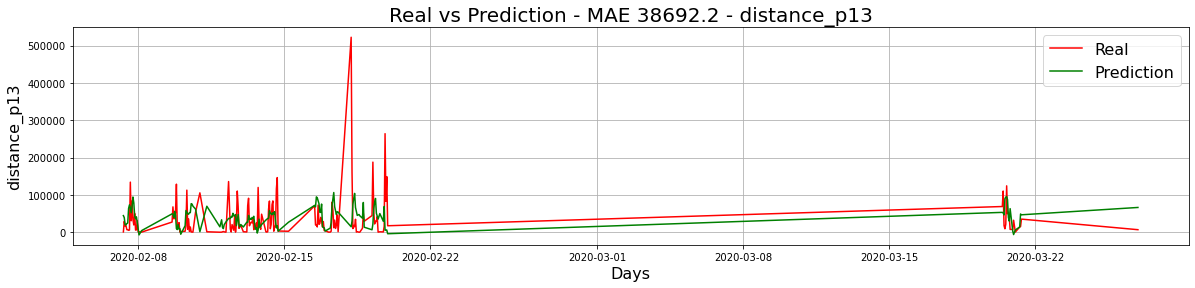

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4       9130.0            p13
2020-04-02     0    2      4       9130.0            p13
2020-04-03     0    3      4       8386.0            p13
2020-04-04     0    4      4       9766.0            p13
2020-04-05     0    5      4      10899.0            p13

In [138]:
#distance prediction
horizon=24*7
X_distance_p13= distance_p13.drop('distance', axis=1)
y_distance_p13 = distance_p13['distance']
    
#take last week of the dataset for validation
X_train_distance_p13, X_test_distance_p13 = X_distance_p13.iloc[:-horizon,:], X_distance_p13.iloc[-horizon:,:]
y_train_distance_p13, y_test_distance_p13 = y_distance_p13.iloc[:-horizon], y_distance_p13.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p13, y_train_distance_p13)
predictions_distance_p13 = model.predict(X_test_distance_p13)

#calculate MAE
mae_distance_p13 =np.round(mean_absolute_error(y_test_distance_p13, predictions_distance_p13),1)    
mape_distance_p13 = (mean_absolute_percentage_error(y_test_distance_p13, predictions_distance_p13))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p13} - distance_p13', fontsize=20)
plt.plot(y_test_distance_p13, color='red')
plt.plot(pd.Series(predictions_distance_p13, index=y_test_distance_p13.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p13', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p13 = pd.DataFrame(fut_date)
date_distance_p13 = date_distance_p13.set_index(date_distance_p13.datetime)
date_distance_p13['hour'] = date_distance_p13.index.hour
date_distance_p13['day'] = date_distance_p13.index.day
date_distance_p13['month'] = date_distance_p13.index.month
date_distance_p13.drop('datetime', axis=1, inplace=True)
predictions_distance_p13 = model.predict(date_distance_p13)
date_distance_p13['predictions'] = np.round(predictions_distance_p13.tolist())
date_distance_p13[predictions_distance_p13<0] = 0
date_distance_p13['Participant_ID']= 'p13'

#Saving file for machine learning
file_to_save_distance = date_distance_p13.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p13/distance_p13.csv')

date_distance_p13.head()

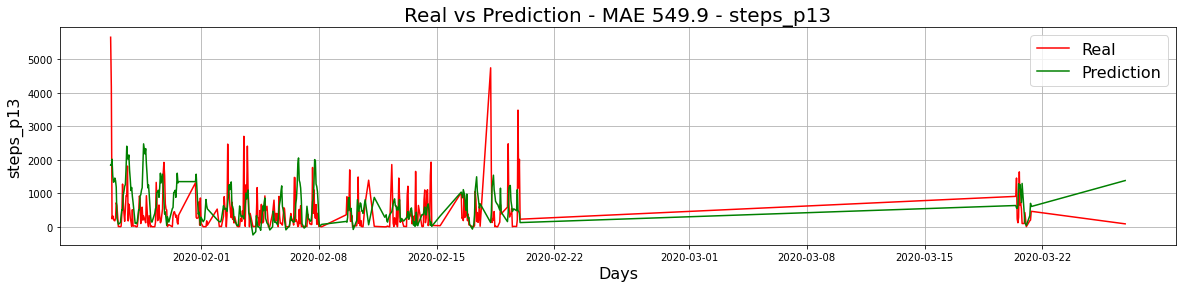

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        289.0            p13
2020-04-02     0    2      4        289.0            p13
2020-04-03     0    3      4        187.0            p13
2020-04-04     0    0      0          0.0            p13
2020-04-05     0    5      4         63.0            p13

In [139]:
#steps prediction
horizon=24*15
X_steps_p13= steps_p13.drop('steps', axis=1)
y_steps_p13 = steps_p13['steps']
    
#take last week of the dataset for validation
X_train_steps_p13, X_test_steps_p13 = X_steps_p13.iloc[:-horizon,:], X_steps_p13.iloc[-horizon:,:]
y_train_steps_p13, y_test_steps_p13 = y_steps_p13.iloc[:-horizon], y_steps_p13.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p13, y_train_steps_p13)
predictions_steps_p13 = model.predict(X_test_steps_p13)

#calculate MAE
mae_steps_p13 =np.round(mean_absolute_error(y_test_steps_p13, predictions_steps_p13),1)    
mape_steps_p13 = (mean_absolute_percentage_error(y_test_steps_p13, predictions_steps_p13))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p13} - steps_p13', fontsize=20)
plt.plot(y_test_steps_p13, color='red')
plt.plot(pd.Series(predictions_steps_p13, index=y_test_steps_p13.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p13', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p13 = pd.DataFrame(fut_date)
date_steps_p13 = date_steps_p13.set_index(date_steps_p13.datetime)
date_steps_p13['hour'] = date_steps_p13.index.hour
date_steps_p13['day'] = date_steps_p13.index.day
date_steps_p13['month'] = date_steps_p13.index.month
date_steps_p13.drop('datetime', axis=1, inplace=True)
predictions_steps_p13 = model.predict(date_steps_p13)
date_steps_p13['predictions'] = np.round(predictions_steps_p13.tolist())
date_steps_p13[predictions_steps_p13<0] = 0
date_steps_p13['Participant_ID']= 'p13'

#Saving file for machine learning
file_to_save_steps = date_steps_p13.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p13/steps_p13.csv')

date_steps_p13.head()

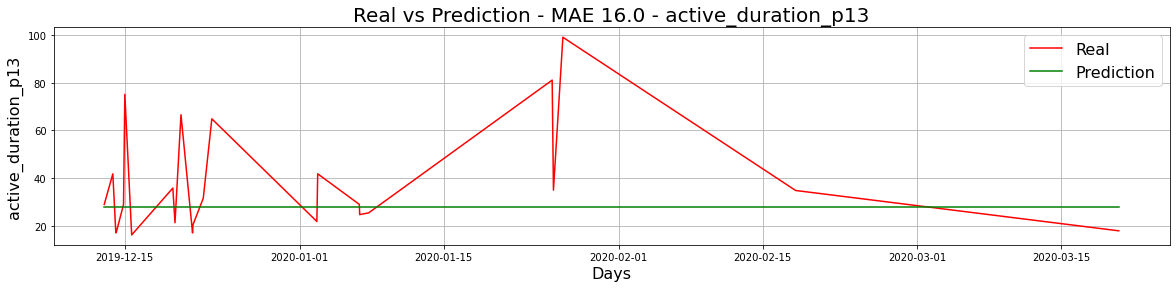

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         28.0            p13
2020-04-02     0    2      4         28.0            p13
2020-04-03     0    3      4         28.0            p13
2020-04-04     0    4      4         28.0            p13
2020-04-05     0    5      4         28.0            p13

In [140]:
#active_duration  prediction
horizon=24*1
X_active_duration_p13= active_duration_p13.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p13 = active_duration_p13['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p13, X_test_active_duration_p13 = X_active_duration_p13.iloc[:-horizon,:], X_active_duration_p13.iloc[-horizon:,:]
y_train_active_duration_p13, y_test_active_duration_p13 = y_active_duration_p13.iloc[:-horizon], y_active_duration_p13.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p13, y_train_active_duration_p13)
predictions_active_duration_p13 = model.predict(X_test_active_duration_p13)

#calculate MAE
mae_active_duration_p13 =np.round(mean_absolute_error(y_test_active_duration_p13, predictions_active_duration_p13),1)    
mape_active_duration_p13 = (mean_absolute_percentage_error(y_test_active_duration_p13, predictions_active_duration_p13))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p13} - active_duration_p13', fontsize=20)
plt.plot(y_test_active_duration_p13, color='red')
plt.plot(pd.Series(predictions_active_duration_p13, index=y_test_active_duration_p13.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p13', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p13 = pd.DataFrame(fut_date)
date_active_duration_p13 = date_active_duration_p13.set_index(date_active_duration_p13.datetime)
date_active_duration_p13['hour'] = date_active_duration_p13.index.hour
date_active_duration_p13['day'] = date_active_duration_p13.index.day
date_active_duration_p13['month'] = date_active_duration_p13.index.month
date_active_duration_p13.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p13 = model.predict(date_active_duration_p13)
date_active_duration_p13['predictions'] = np.round(predictions_active_duration_p13.tolist())
date_active_duration_p13[predictions_active_duration_p13<0] = 0
date_active_duration_p13['Participant_ID']= 'p13'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p13.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p13/active_duration_p13.csv')

date_active_duration_p13.head()

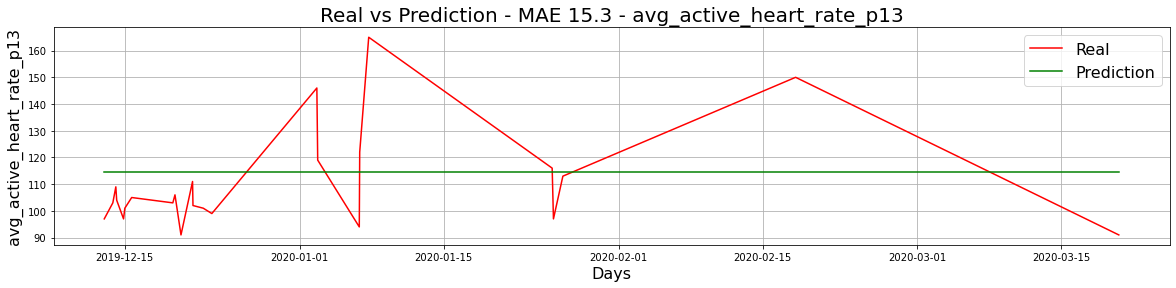

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        115.0            p13
2020-04-02     0    2      4        115.0            p13
2020-04-03     0    3      4        115.0            p13
2020-04-04     0    4      4        115.0            p13
2020-04-05     0    5      4        115.0            p13

In [141]:
#avg_active_heart_rate  prediction
horizon=24*1
X_avg_active_heart_rate_p13= avg_active_heart_rate_p13.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p13 = avg_active_heart_rate_p13['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p13, X_test_avg_active_heart_rate_p13 = X_avg_active_heart_rate_p13.iloc[:-horizon,:], X_avg_active_heart_rate_p13.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p13, y_test_avg_active_heart_rate_p13 = y_avg_active_heart_rate_p13.iloc[:-horizon], y_avg_active_heart_rate_p13.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p13, y_train_avg_active_heart_rate_p13)
predictions_avg_active_heart_rate_p13 = model.predict(X_test_avg_active_heart_rate_p13)

#calculate MAE
mae_avg_active_heart_rate_p13 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p13, predictions_avg_active_heart_rate_p13),1)    
mape_avg_active_heart_rate_p13 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p13, predictions_avg_active_heart_rate_p13))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p13} - avg_active_heart_rate_p13', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p13, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p13, index=y_test_avg_active_heart_rate_p13.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p13', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p13 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p13 = date_avg_active_heart_rate_p13.set_index(date_avg_active_heart_rate_p13.datetime)
date_avg_active_heart_rate_p13['hour'] = date_avg_active_heart_rate_p13.index.hour
date_avg_active_heart_rate_p13['day'] = date_avg_active_heart_rate_p13.index.day
date_avg_active_heart_rate_p13['month'] = date_avg_active_heart_rate_p13.index.month
date_avg_active_heart_rate_p13.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p13 = model.predict(date_avg_active_heart_rate_p13)
date_avg_active_heart_rate_p13['predictions'] = np.round(predictions_avg_active_heart_rate_p13.tolist())
date_avg_active_heart_rate_p13[predictions_avg_active_heart_rate_p13<0] = 0
date_avg_active_heart_rate_p13['Participant_ID']= 'p13'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p13.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p13/avg_active_heart_rate_p13.csv')

date_avg_active_heart_rate_p13.head()

(55, 3)
(31, 2)


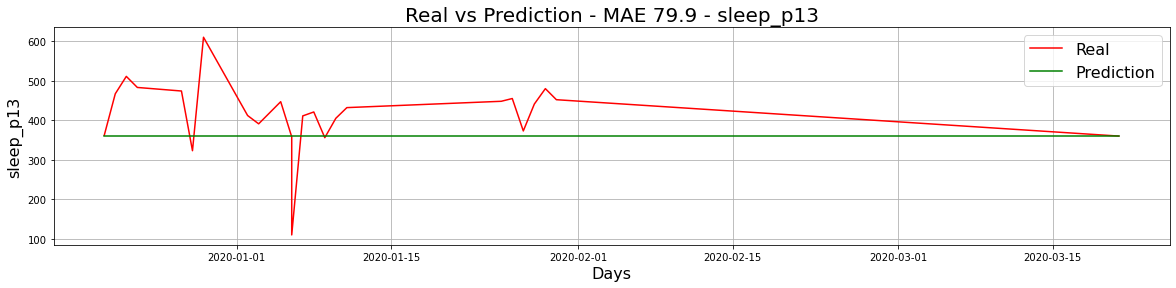

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        361.0            p13
2020-04-02    2      4        361.0            p13
2020-04-03    3      4        361.0            p13
2020-04-04    4      4        361.0            p13
2020-04-05    5      4        361.0            p13

In [142]:
#sleep prediction
horizon=24*1
X_sleep_p13= sleep_p13.drop('Minutes_Asleep', axis=1)
y_sleep_p13 = sleep_p13['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p13, X_test_sleep_p13 = X_sleep_p13.iloc[:-horizon,:], X_sleep_p13.iloc[-horizon:,:]
y_train_sleep_p13, y_test_sleep_p13 = y_sleep_p13.iloc[:-horizon], y_sleep_p13.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p13, y_train_sleep_p13)
predictions_sleep_p13 = model.predict(X_test_sleep_p13)

print(sleep_p13.shape)
print(X_train_sleep_p13.shape)

#calculate MAE
mae_sleep_p13 =np.round(mean_absolute_error(y_test_sleep_p13, predictions_sleep_p13),1)    
mape_sleep_p13 = (mean_absolute_percentage_error(y_test_sleep_p13, predictions_sleep_p13))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p13} - sleep_p13', fontsize=20)
plt.plot(y_test_sleep_p13, color='red')
plt.plot(pd.Series(predictions_sleep_p13, index=y_test_sleep_p13.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p13', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p13 = pd.DataFrame(fut_date)
date_sleep_p13 = date_sleep_p13.set_index(date_sleep_p13.datetime)
#date_sleep_p13['hour'] = date_sleep_p13.index.hour
date_sleep_p13['day'] = date_sleep_p13.index.day
date_sleep_p13['month'] = date_sleep_p13.index.month
date_sleep_p13.drop('datetime', axis=1, inplace=True)
predictions_sleep_p13 = model.predict(date_sleep_p13)
date_sleep_p13['predictions'] = np.round(predictions_sleep_p13.tolist())
date_sleep_p13[predictions_sleep_p13<0] = 0
date_sleep_p13['Participant_ID']= 'p13'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p13.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p13/sleep_p13.csv')

date_sleep_p13.head()

# Participant 14

In [143]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p14/calories_p14.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p14/distance_p14.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p14/steps_p14.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p14/active_duration_p14.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p14/avg_active_heart_rate_p14.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p14/sleep_p14.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p14/resting_heart_rate_p14.csv'

In [144]:
calories_p14=pd.read_csv(file_to_load1)
distance_p14=pd.read_csv(file_to_load2)
steps_p14=pd.read_csv(file_to_load3)
active_duration_p14=pd.read_csv(file_to_load4)
avg_active_heart_rate_p14=pd.read_csv(file_to_load5)
sleep_p14=pd.read_csv(file_to_load6)
resting_heart_rate_p14=pd.read_csv(file_to_load7)

In [145]:
#Calories
calories_p14['datetime'] = pd.to_datetime(calories_p14['datetime'])
calories_p14 = calories_p14.set_index(calories_p14.datetime)
calories_p14.drop('datetime', axis=1, inplace=True)

#Distance
distance_p14['datetime'] = pd.to_datetime(distance_p14['datetime'])
distance_p14 = distance_p14.set_index(distance_p14.datetime)
distance_p14.drop('datetime', axis=1, inplace=True)

#steps
steps_p14['datetime'] = pd.to_datetime(steps_p14['datetime'])
steps_p14 = steps_p14.set_index(steps_p14.datetime)
steps_p14.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p14['datetime'] = pd.to_datetime(active_duration_p14['datetime'])
active_duration_p14 = active_duration_p14.set_index(active_duration_p14.datetime)
active_duration_p14.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p14['datetime'] = pd.to_datetime(avg_active_heart_rate_p14['datetime'])
avg_active_heart_rate_p14 = avg_active_heart_rate_p14.set_index(avg_active_heart_rate_p14.datetime)
avg_active_heart_rate_p14.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p14['datetime'] = pd.to_datetime(sleep_p14['datetime'])
sleep_p14 = sleep_p14.set_index(sleep_p14.datetime)
sleep_p14.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p14['datetime'] = pd.to_datetime(resting_heart_rate_p14['datetime'])
resting_heart_rate_p14 = resting_heart_rate_p14.set_index(resting_heart_rate_p14.datetime)
resting_heart_rate_p14.drop('datetime', axis=1, inplace=True)

In [146]:
calories_p14 = calories_p14[(calories_p14[['calories']] != 0).any(axis=1)]
distance_p14 = distance_p14[(distance_p14[['distance']] != 0).any(axis=1)]
steps_p14 = steps_p14[(steps_p14[['steps']] != 0).any(axis=1)]
active_duration_p14 = active_duration_p14[(active_duration_p14[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p14 = avg_active_heart_rate_p14[(avg_active_heart_rate_p14[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p14 = sleep_p14[(sleep_p14[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p14 = resting_heart_rate_p14[(resting_heart_rate_p14[['Resting_beats_per_min']] != 0).any(axis=1)]

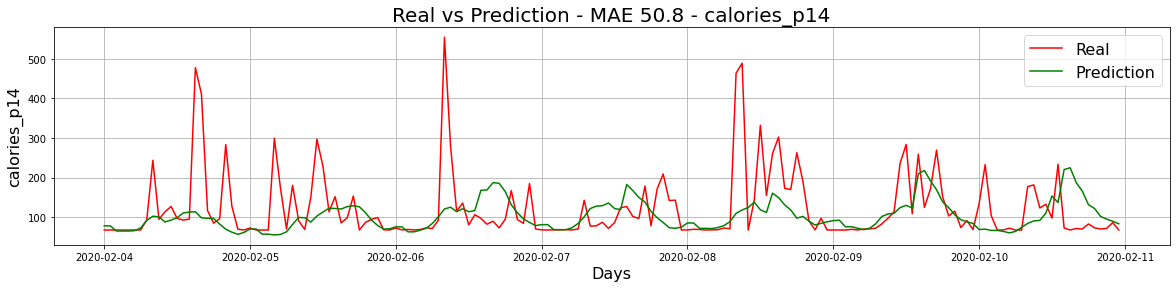

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         80.0            p14
2020-04-02     0    2      4         70.0            p14
2020-04-03     0    3      4         87.0            p14
2020-04-04     0    4      4         78.0            p14
2020-04-05     0    5      4         70.0            p14

In [147]:
#calories prediction
horizon=24*7
X_calories_p14 = calories_p14.drop('calories', axis=1)
y_calories_p14 = calories_p14['calories']
    
#take last week of the dataset for validation
X_train_calories_p14, X_test_calories_p14 = X_calories_p14.iloc[:-horizon,:], X_calories_p14.iloc[-horizon:,:]
y_train_calories_p14, y_test_calories_p14 = y_calories_p14.iloc[:-horizon], y_calories_p14.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p14, y_train_calories_p14)
predictions_calories_p14 = model.predict(X_test_calories_p14)

#calculate MAE
mae_calories_p14 = np.round(mean_absolute_error(y_test_calories_p14, predictions_calories_p14), 1)    
mape_calories_p14 = (mean_absolute_percentage_error(y_test_calories_p14, predictions_calories_p14))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p14} - calories_p14', fontsize=20)
plt.plot(y_test_calories_p14, color='red')
plt.plot(pd.Series(predictions_calories_p14, index=y_test_calories_p14.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p14', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p14 = pd.DataFrame(fut_date)
date_calories_p14 = date_calories_p14.set_index(date_calories_p14.datetime)
date_calories_p14['hour'] = date_calories_p14.index.hour
date_calories_p14['day'] = date_calories_p14.index.day
date_calories_p14['month'] = date_calories_p14.index.month
date_calories_p14.drop('datetime', axis=1, inplace=True)
predictions_calories_p14 = model.predict(date_calories_p14)
date_calories_p14['predictions'] = np.round(predictions_calories_p14.tolist())
date_calories_p14[predictions_calories_p14<0] = 0
date_calories_p14['Participant_ID']= 'p14'

#Saving file for machine learning
file_to_save_calories = date_calories_p14.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p14/calories_p14.csv')

date_calories_p14.head()

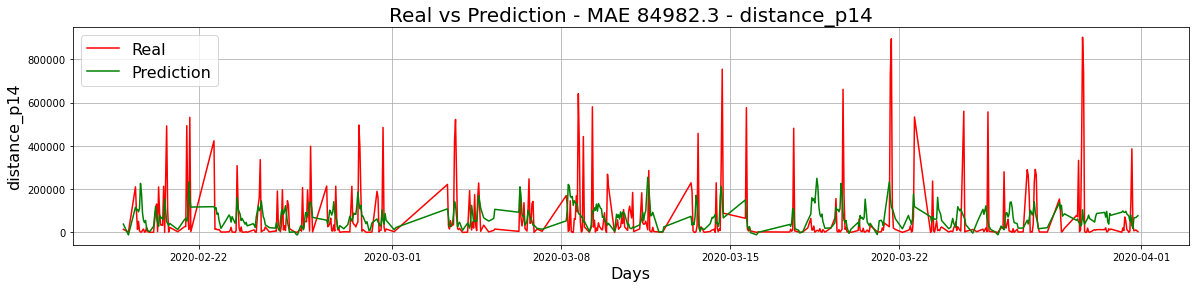

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4      26418.0            p14
2020-04-02     0    2      4      23503.0            p14
2020-04-03     0    3      4      28385.0            p14
2020-04-04     0    4      4      25664.0            p14
2020-04-05     0    5      4      52614.0            p14

In [148]:
#distance prediction
horizon=24*20
X_distance_p14= distance_p14.drop('distance', axis=1)
y_distance_p14 = distance_p14['distance']
    
#take last week of the dataset for validation
X_train_distance_p14, X_test_distance_p14 = X_distance_p14.iloc[:-horizon,:], X_distance_p14.iloc[-horizon:,:]
y_train_distance_p14, y_test_distance_p14 = y_distance_p14.iloc[:-horizon], y_distance_p14.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p14, y_train_distance_p14)
predictions_distance_p14 = model.predict(X_test_distance_p14)

#calculate MAE
mae_distance_p14 =np.round(mean_absolute_error(y_test_distance_p14, predictions_distance_p14),1)    
mape_distance_p14 = (mean_absolute_percentage_error(y_test_distance_p14, predictions_distance_p14))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p14} - distance_p14', fontsize=20)
plt.plot(y_test_distance_p14, color='red')
plt.plot(pd.Series(predictions_distance_p14, index=y_test_distance_p14.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p14', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p14 = pd.DataFrame(fut_date)
date_distance_p14 = date_distance_p14.set_index(date_distance_p14.datetime)
date_distance_p14['hour'] = date_distance_p14.index.hour
date_distance_p14['day'] = date_distance_p14.index.day
date_distance_p14['month'] = date_distance_p14.index.month
date_distance_p14.drop('datetime', axis=1, inplace=True)
predictions_distance_p14 = model.predict(date_distance_p14)
date_distance_p14['predictions'] = np.round(predictions_distance_p14.tolist())
date_distance_p14[predictions_distance_p14<0] = 0
date_distance_p14['Participant_ID']= 'p14'

#Saving file for machine learning
file_to_save_distance = date_distance_p14.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p14/distance_p14.csv')

date_distance_p14.head()

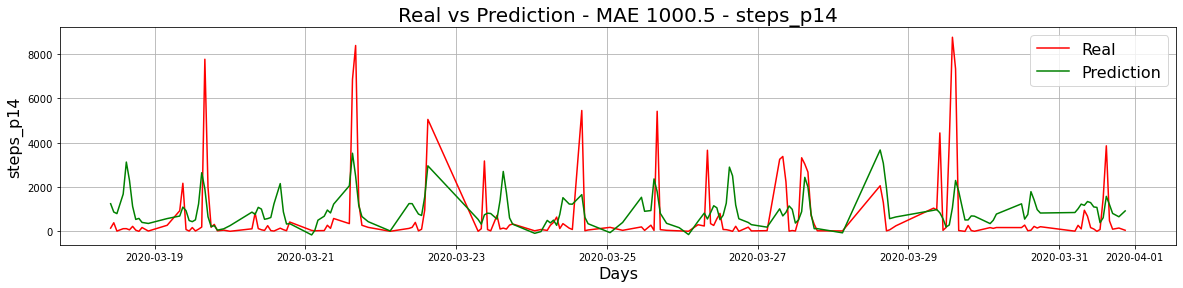

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        477.0            p14
2020-04-02     0    2      4        464.0            p14
2020-04-03     0    3      4        462.0            p14
2020-04-04     0    4      4        468.0            p14
2020-04-05     0    5      4        246.0            p14

In [149]:
#steps prediction
horizon=24*7
X_steps_p14= steps_p14.drop('steps', axis=1)
y_steps_p14 = steps_p14['steps']
    
#take last week of the dataset for validation
X_train_steps_p14, X_test_steps_p14 = X_steps_p14.iloc[:-horizon,:], X_steps_p14.iloc[-horizon:,:]
y_train_steps_p14, y_test_steps_p14 = y_steps_p14.iloc[:-horizon], y_steps_p14.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p14, y_train_steps_p14)
predictions_steps_p14 = model.predict(X_test_steps_p14)

#calculate MAE
mae_steps_p14 =np.round(mean_absolute_error(y_test_steps_p14, predictions_steps_p14),1)    
mape_steps_p14 = (mean_absolute_percentage_error(y_test_steps_p14, predictions_steps_p14))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p14} - steps_p14', fontsize=20)
plt.plot(y_test_steps_p14, color='red')
plt.plot(pd.Series(predictions_steps_p14, index=y_test_steps_p14.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p14', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p14 = pd.DataFrame(fut_date)
date_steps_p14 = date_steps_p14.set_index(date_steps_p14.datetime)
date_steps_p14['hour'] = date_steps_p14.index.hour
date_steps_p14['day'] = date_steps_p14.index.day
date_steps_p14['month'] = date_steps_p14.index.month
date_steps_p14.drop('datetime', axis=1, inplace=True)
predictions_steps_p14 = model.predict(date_steps_p14)
date_steps_p14['predictions'] = np.round(predictions_steps_p14.tolist())
date_steps_p14[predictions_steps_p14<0] = 0
date_steps_p14['Participant_ID']= 'p14'

#Saving file for machine learning
file_to_save_steps = date_steps_p14.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p14/steps_p14.csv')

date_steps_p14.head()

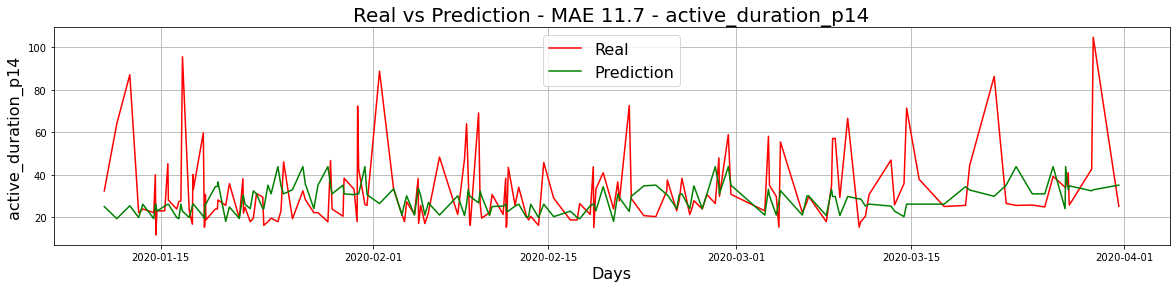

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         21.0            p14
2020-04-02     0    2      4         21.0            p14
2020-04-03     0    3      4         21.0            p14
2020-04-04     0    4      4         21.0            p14
2020-04-05     0    5      4         21.0            p14

In [150]:
#active_duration  prediction
horizon=24*7
X_active_duration_p14= active_duration_p14.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p14 = active_duration_p14['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p14, X_test_active_duration_p14 = X_active_duration_p14.iloc[:-horizon,:], X_active_duration_p14.iloc[-horizon:,:]
y_train_active_duration_p14, y_test_active_duration_p14 = y_active_duration_p14.iloc[:-horizon], y_active_duration_p14.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p14, y_train_active_duration_p14)
predictions_active_duration_p14 = model.predict(X_test_active_duration_p14)

#calculate MAE
mae_active_duration_p14 =np.round(mean_absolute_error(y_test_active_duration_p14, predictions_active_duration_p14),1)    
mape_active_duration_p14 = (mean_absolute_percentage_error(y_test_active_duration_p14, predictions_active_duration_p14))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p14} - active_duration_p14', fontsize=20)
plt.plot(y_test_active_duration_p14, color='red')
plt.plot(pd.Series(predictions_active_duration_p14, index=y_test_active_duration_p14.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p14', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p14 = pd.DataFrame(fut_date)
date_active_duration_p14 = date_active_duration_p14.set_index(date_active_duration_p14.datetime)
date_active_duration_p14['hour'] = date_active_duration_p14.index.hour
date_active_duration_p14['day'] = date_active_duration_p14.index.day
date_active_duration_p14['month'] = date_active_duration_p14.index.month
date_active_duration_p14.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p14 = model.predict(date_active_duration_p14)
date_active_duration_p14['predictions'] = np.round(predictions_active_duration_p14.tolist())
date_active_duration_p14[predictions_active_duration_p14<0] = 0
date_active_duration_p14['Participant_ID']= 'p14'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p14.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p14/active_duration_p14.csv')

date_active_duration_p14.head()

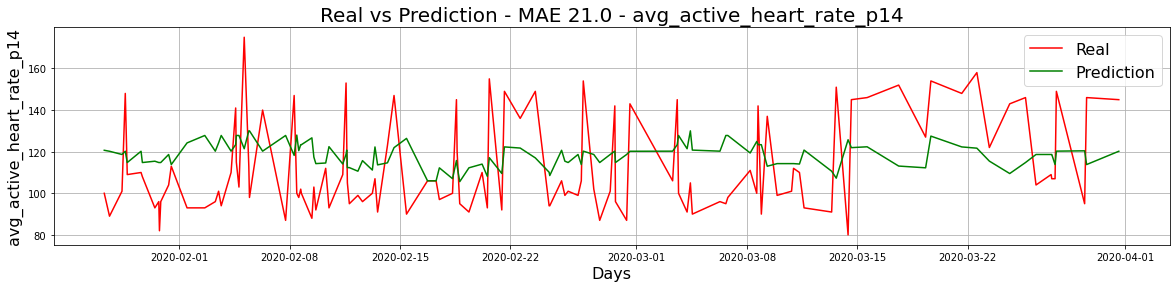

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4        121.0            p14
2020-04-02     0    2      4        121.0            p14
2020-04-03     0    3      4        121.0            p14
2020-04-04     0    4      4        121.0            p14
2020-04-05     0    5      4        121.0            p14

In [151]:
#avg_active_heart_rate  prediction
horizon=24*5
X_avg_active_heart_rate_p14= avg_active_heart_rate_p14.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p14 = avg_active_heart_rate_p14['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p14, X_test_avg_active_heart_rate_p14 = X_avg_active_heart_rate_p14.iloc[:-horizon,:], X_avg_active_heart_rate_p14.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p14, y_test_avg_active_heart_rate_p14 = y_avg_active_heart_rate_p14.iloc[:-horizon], y_avg_active_heart_rate_p14.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p14, y_train_avg_active_heart_rate_p14)
predictions_avg_active_heart_rate_p14 = model.predict(X_test_avg_active_heart_rate_p14)

#calculate MAE
mae_avg_active_heart_rate_p14 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p14, predictions_avg_active_heart_rate_p14),1)    
mape_avg_active_heart_rate_p14 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p14, predictions_avg_active_heart_rate_p14))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p14} - avg_active_heart_rate_p14', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p14, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p14, index=y_test_avg_active_heart_rate_p14.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p14', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p14 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p14 = date_avg_active_heart_rate_p14.set_index(date_avg_active_heart_rate_p14.datetime)
date_avg_active_heart_rate_p14['hour'] = date_avg_active_heart_rate_p14.index.hour
date_avg_active_heart_rate_p14['day'] = date_avg_active_heart_rate_p14.index.day
date_avg_active_heart_rate_p14['month'] = date_avg_active_heart_rate_p14.index.month
date_avg_active_heart_rate_p14.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p14 = model.predict(date_avg_active_heart_rate_p14)
date_avg_active_heart_rate_p14['predictions'] = np.round(predictions_avg_active_heart_rate_p14.tolist())
date_avg_active_heart_rate_p14[predictions_avg_active_heart_rate_p14<0] = 0
date_avg_active_heart_rate_p14['Participant_ID']= 'p14'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p14.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p14/avg_active_heart_rate_p14.csv')

date_avg_active_heart_rate_p14.head()

(134, 3)
(86, 2)


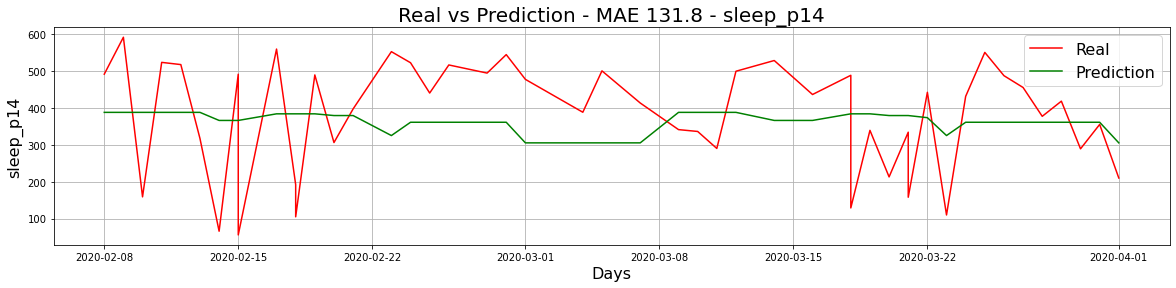

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        305.0            p14
2020-04-02    2      4        305.0            p14
2020-04-03    3      4        305.0            p14
2020-04-04    4      4        305.0            p14
2020-04-05    5      4        305.0            p14

In [152]:
#sleep prediction
horizon=24*2
X_sleep_p14= sleep_p14.drop('Minutes_Asleep', axis=1)
y_sleep_p14 = sleep_p14['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p14, X_test_sleep_p14 = X_sleep_p14.iloc[:-horizon,:], X_sleep_p14.iloc[-horizon:,:]
y_train_sleep_p14, y_test_sleep_p14 = y_sleep_p14.iloc[:-horizon], y_sleep_p14.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p14, y_train_sleep_p14)
predictions_sleep_p14 = model.predict(X_test_sleep_p14)

print(sleep_p14.shape)
print(X_train_sleep_p14.shape)

#calculate MAE
mae_sleep_p14 =np.round(mean_absolute_error(y_test_sleep_p14, predictions_sleep_p14),1)    
mape_sleep_p14 = (mean_absolute_percentage_error(y_test_sleep_p14, predictions_sleep_p14))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p14} - sleep_p14', fontsize=20)
plt.plot(y_test_sleep_p14, color='red')
plt.plot(pd.Series(predictions_sleep_p14, index=y_test_sleep_p14.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p14', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p14 = pd.DataFrame(fut_date)
date_sleep_p14 = date_sleep_p14.set_index(date_sleep_p14.datetime)
#date_sleep_p14['hour'] = date_sleep_p14.index.hour
date_sleep_p14['day'] = date_sleep_p14.index.day
date_sleep_p14['month'] = date_sleep_p14.index.month
date_sleep_p14.drop('datetime', axis=1, inplace=True)
predictions_sleep_p14 = model.predict(date_sleep_p14)
date_sleep_p14['predictions'] = np.round(predictions_sleep_p14.tolist())
date_sleep_p14[predictions_sleep_p14<0] = 0
date_sleep_p14['Participant_ID']= 'p14'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p14.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p14/sleep_p14.csv')

date_sleep_p14.head()

(129, 3)
(114, 2)


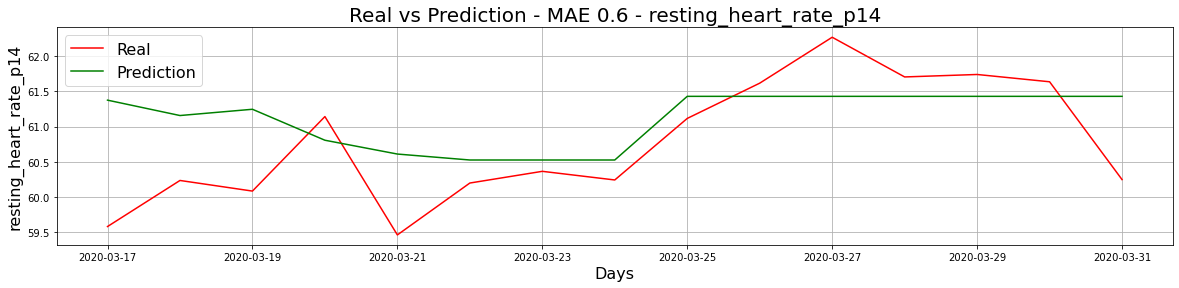

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         63.0            p14
2020-04-02    2      4         63.0            p14
2020-04-03    3      4         63.0            p14
2020-04-04    4      4         63.0            p14
2020-04-05    5      4         63.0            p14

In [153]:
#resting_heart_rate prediction
horizon=15
X_resting_heart_rate_p14= resting_heart_rate_p14.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p14 = resting_heart_rate_p14['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p14, X_test_resting_heart_rate_p14 = X_resting_heart_rate_p14.iloc[:-horizon,:], X_resting_heart_rate_p14.iloc[-horizon:,:]
y_train_resting_heart_rate_p14, y_test_resting_heart_rate_p14 = y_resting_heart_rate_p14.iloc[:-horizon], y_resting_heart_rate_p14.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p14, y_train_resting_heart_rate_p14)
predictions_resting_heart_rate_p14 = model.predict(X_test_resting_heart_rate_p14)

print(resting_heart_rate_p14.shape)
print(X_train_resting_heart_rate_p14.shape)

#calculate MAE
mae_resting_heart_rate_p14 =np.round(mean_absolute_error(y_test_resting_heart_rate_p14, predictions_resting_heart_rate_p14),1)    
mape_resting_heart_rate_p14 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p14, predictions_resting_heart_rate_p14))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p14} - resting_heart_rate_p14', fontsize=20)
plt.plot(y_test_resting_heart_rate_p14, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p14, index=y_test_resting_heart_rate_p14.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p14', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p14 = pd.DataFrame(fut_date)
date_resting_heart_rate_p14 = date_resting_heart_rate_p14.set_index(date_resting_heart_rate_p14.datetime)
#date_resting_heart_rate_p14['hour'] = date_resting_heart_rate_p14.index.hour
date_resting_heart_rate_p14['day'] = date_resting_heart_rate_p14.index.day
date_resting_heart_rate_p14['month'] = date_resting_heart_rate_p14.index.month
date_resting_heart_rate_p14.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p14 = model.predict(date_resting_heart_rate_p14)
date_resting_heart_rate_p14['predictions'] = np.round(predictions_resting_heart_rate_p14.tolist())
date_resting_heart_rate_p14[predictions_resting_heart_rate_p14<0] = 0
date_resting_heart_rate_p14['Participant_ID']= 'p14'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p14.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p14/resting_heart_rate_p14.csv')

date_resting_heart_rate_p14.head()

# Participant 15

In [154]:
file_to_load1= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p15/calories_p15.csv'
file_to_load2= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p15/distance_p15.csv'
file_to_load3= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p15/steps_p15.csv'
file_to_load4= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p15/active_duration_p15.csv'
file_to_load5= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p15/avg_active_heart_rate_p15.csv'
file_to_load6= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p15/sleep_p15.csv'
file_to_load7= '../Resource/dataset/csv/for_machine_learning/for_predictions_csv/p15/resting_heart_rate_p15.csv'

In [155]:
calories_p15=pd.read_csv(file_to_load1)
distance_p15=pd.read_csv(file_to_load2)
steps_p15=pd.read_csv(file_to_load3)
active_duration_p15=pd.read_csv(file_to_load4)
avg_active_heart_rate_p15=pd.read_csv(file_to_load5)
sleep_p15=pd.read_csv(file_to_load6)
resting_heart_rate_p15=pd.read_csv(file_to_load7)

In [156]:
#Calories
calories_p15['datetime'] = pd.to_datetime(calories_p15['datetime'])
calories_p15 = calories_p15.set_index(calories_p15.datetime)
calories_p15.drop('datetime', axis=1, inplace=True)

#Distance
distance_p15['datetime'] = pd.to_datetime(distance_p15['datetime'])
distance_p15 = distance_p15.set_index(distance_p15.datetime)
distance_p15.drop('datetime', axis=1, inplace=True)

#steps
steps_p15['datetime'] = pd.to_datetime(steps_p15['datetime'])
steps_p15 = steps_p15.set_index(steps_p15.datetime)
steps_p15.drop('datetime', axis=1, inplace=True)

#active_duration
active_duration_p15['datetime'] = pd.to_datetime(active_duration_p15['datetime'])
active_duration_p15 = active_duration_p15.set_index(active_duration_p15.datetime)
active_duration_p15.drop('datetime', axis=1, inplace=True)

#avg_active_heart_rate
avg_active_heart_rate_p15['datetime'] = pd.to_datetime(avg_active_heart_rate_p15['datetime'])
avg_active_heart_rate_p15 = avg_active_heart_rate_p15.set_index(avg_active_heart_rate_p15.datetime)
avg_active_heart_rate_p15.drop('datetime', axis=1, inplace=True)

#sleep
sleep_p15['datetime'] = pd.to_datetime(sleep_p15['datetime'])
sleep_p15 = sleep_p15.set_index(sleep_p15.datetime)
sleep_p15.drop('datetime', axis=1, inplace=True)

#resting_heart_rate
resting_heart_rate_p15['datetime'] = pd.to_datetime(resting_heart_rate_p15['datetime'])
resting_heart_rate_p15 = resting_heart_rate_p15.set_index(resting_heart_rate_p15.datetime)
resting_heart_rate_p15.drop('datetime', axis=1, inplace=True)

In [157]:
calories_p15 = calories_p15[(calories_p15[['calories']] != 0).any(axis=1)]
distance_p15 = distance_p15[(distance_p15[['distance']] != 0).any(axis=1)]
steps_p15 = steps_p15[(steps_p15[['steps']] != 0).any(axis=1)]
active_duration_p15 = active_duration_p15[(active_duration_p15[['Active_Duration_in_mins']] != 0).any(axis=1)]
avg_active_heart_rate_p15 = avg_active_heart_rate_p15[(avg_active_heart_rate_p15[['Avg_ActiveHeartRate']] != 0).any(axis=1)]
sleep_p15 = sleep_p15[(sleep_p15[['Minutes_Asleep']] != 0).any(axis=1)]
resting_heart_rate_p15 = resting_heart_rate_p15[(resting_heart_rate_p15[['Resting_beats_per_min']] != 0).any(axis=1)]

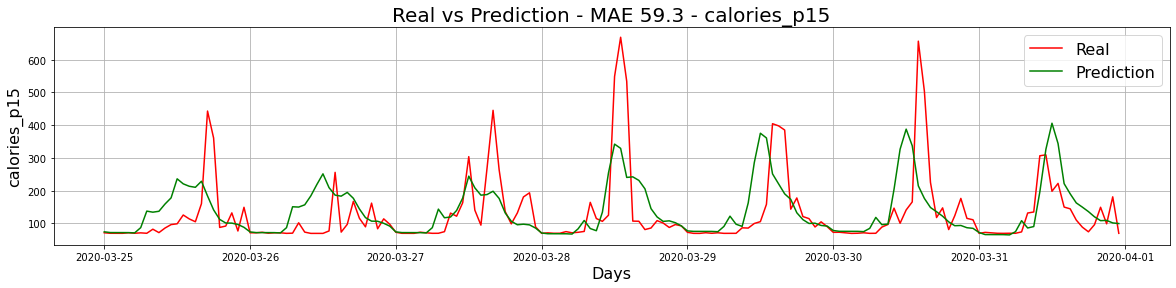

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         79.0            p15
2020-04-02     0    2      4         80.0            p15
2020-04-03     0    3      4         79.0            p15
2020-04-04     0    4      4         79.0            p15
2020-04-05     0    5      4        102.0            p15

In [158]:
#calories prediction
horizon=24*7
X_calories_p15 = calories_p15.drop('calories', axis=1)
y_calories_p15 = calories_p15['calories']
    
#take last week of the dataset for validation
X_train_calories_p15, X_test_calories_p15 = X_calories_p15.iloc[:-horizon,:], X_calories_p15.iloc[-horizon:,:]
y_train_calories_p15, y_test_calories_p15 = y_calories_p15.iloc[:-horizon], y_calories_p15.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=40)
model.fit(X_train_calories_p15, y_train_calories_p15)
predictions_calories_p15 = model.predict(X_test_calories_p15)

#calculate MAE
mae_calories_p15 = np.round(mean_absolute_error(y_test_calories_p15, predictions_calories_p15), 1)    
mape_calories_p15 = (mean_absolute_percentage_error(y_test_calories_p15, predictions_calories_p15))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_calories_p15} - calories_p15', fontsize=20)
plt.plot(y_test_calories_p15, color='red')
plt.plot(pd.Series(predictions_calories_p15, index=y_test_calories_p15.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('calories_p15', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_calories_p15 = pd.DataFrame(fut_date)
date_calories_p15 = date_calories_p15.set_index(date_calories_p15.datetime)
date_calories_p15['hour'] = date_calories_p15.index.hour
date_calories_p15['day'] = date_calories_p15.index.day
date_calories_p15['month'] = date_calories_p15.index.month
date_calories_p15.drop('datetime', axis=1, inplace=True)
predictions_calories_p15 = model.predict(date_calories_p15)
date_calories_p15['predictions'] = np.round(predictions_calories_p15.tolist())
date_calories_p15[predictions_calories_p15<0] = 0
date_calories_p15['Participant_ID']= 'p15'

#Saving file for machine learning
file_to_save_calories = date_calories_p15.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p15/calories_p15.csv')

date_calories_p15.head()

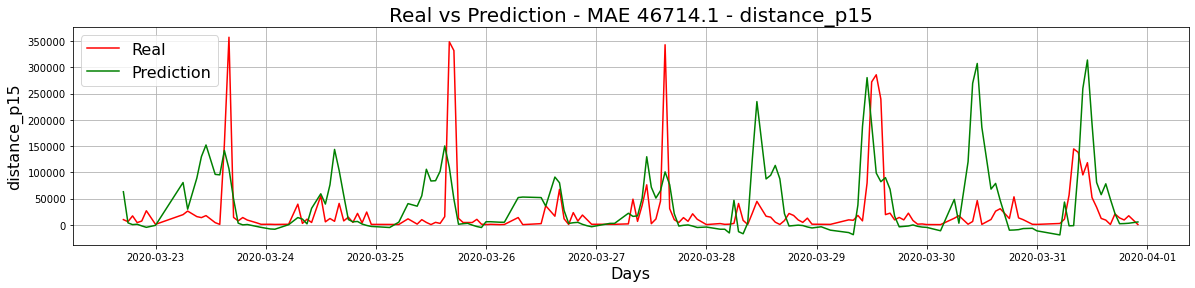

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    0      0          0.0            p15
2020-04-02     0    2      4       2819.0            p15
2020-04-03     0    0      0          0.0            p15
2020-04-04     0    4      4       4149.0            p15
2020-04-05     0    5      4      40465.0            p15

In [159]:
#distance prediction
horizon=24*7
X_distance_p15= distance_p15.drop('distance', axis=1)
y_distance_p15 = distance_p15['distance']
    
#take last week of the dataset for validation
X_train_distance_p15, X_test_distance_p15 = X_distance_p15.iloc[:-horizon,:], X_distance_p15.iloc[-horizon:,:]
y_train_distance_p15, y_test_distance_p15 = y_distance_p15.iloc[:-horizon], y_distance_p15.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_distance_p15, y_train_distance_p15)
predictions_distance_p15 = model.predict(X_test_distance_p15)

#calculate MAE
mae_distance_p15 =np.round(mean_absolute_error(y_test_distance_p15, predictions_distance_p15),1)    
mape_distance_p15 = (mean_absolute_percentage_error(y_test_distance_p15, predictions_distance_p15))*100
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_distance_p15} - distance_p15', fontsize=20)
plt.plot(y_test_distance_p15, color='red')
plt.plot(pd.Series(predictions_distance_p15, index=y_test_distance_p15.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('distance_p15', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_distance_p15 = pd.DataFrame(fut_date)
date_distance_p15 = date_distance_p15.set_index(date_distance_p15.datetime)
date_distance_p15['hour'] = date_distance_p15.index.hour
date_distance_p15['day'] = date_distance_p15.index.day
date_distance_p15['month'] = date_distance_p15.index.month
date_distance_p15.drop('datetime', axis=1, inplace=True)
predictions_distance_p15 = model.predict(date_distance_p15)
date_distance_p15['predictions'] = np.round(predictions_distance_p15.tolist())
date_distance_p15[predictions_distance_p15<0] = 0
date_distance_p15['Participant_ID']= 'p15'

#Saving file for machine learning
file_to_save_distance = date_distance_p15.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p15/distance_p15.csv')

date_distance_p15.head()

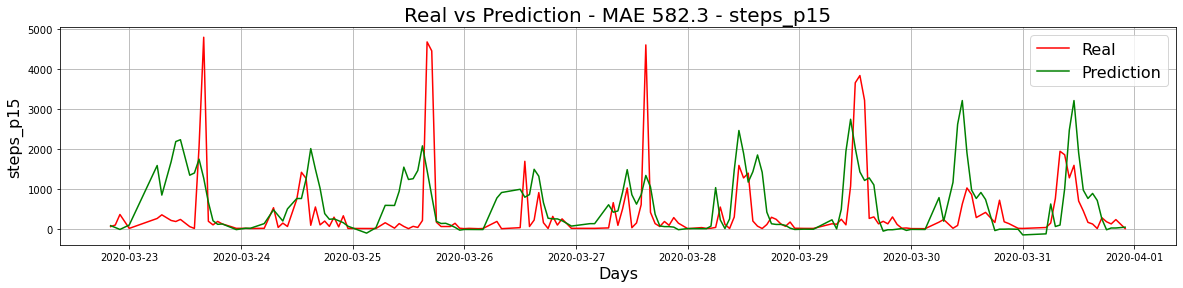

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    0      0          0.0            p15
2020-04-02     0    0      0          0.0            p15
2020-04-03     0    0      0          0.0            p15
2020-04-04     0    4      4         30.0            p15
2020-04-05     0    5      4        417.0            p15

In [160]:
#steps prediction
horizon=24*7
X_steps_p15= steps_p15.drop('steps', axis=1)
y_steps_p15 = steps_p15['steps']
    
#take last week of the dataset for validation
X_train_steps_p15, X_test_steps_p15 = X_steps_p15.iloc[:-horizon,:], X_steps_p15.iloc[-horizon:,:]
y_train_steps_p15, y_test_steps_p15 = y_steps_p15.iloc[:-horizon], y_steps_p15.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_steps_p15, y_train_steps_p15)
predictions_steps_p15 = model.predict(X_test_steps_p15)

#calculate MAE
mae_steps_p15 =np.round(mean_absolute_error(y_test_steps_p15, predictions_steps_p15),1)    
mape_steps_p15 = (mean_absolute_percentage_error(y_test_steps_p15, predictions_steps_p15))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_steps_p15} - steps_p15', fontsize=20)
plt.plot(y_test_steps_p15, color='red')
plt.plot(pd.Series(predictions_steps_p15, index=y_test_steps_p15.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('steps_p15', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_steps_p15 = pd.DataFrame(fut_date)
date_steps_p15 = date_steps_p15.set_index(date_steps_p15.datetime)
date_steps_p15['hour'] = date_steps_p15.index.hour
date_steps_p15['day'] = date_steps_p15.index.day
date_steps_p15['month'] = date_steps_p15.index.month
date_steps_p15.drop('datetime', axis=1, inplace=True)
predictions_steps_p15 = model.predict(date_steps_p15)
date_steps_p15['predictions'] = np.round(predictions_steps_p15.tolist())
date_steps_p15[predictions_steps_p15<0] = 0
date_steps_p15['Participant_ID']= 'p15'

#Saving file for machine learning
file_to_save_steps = date_steps_p15.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p15/steps_p15.csv')

date_steps_p15.head()

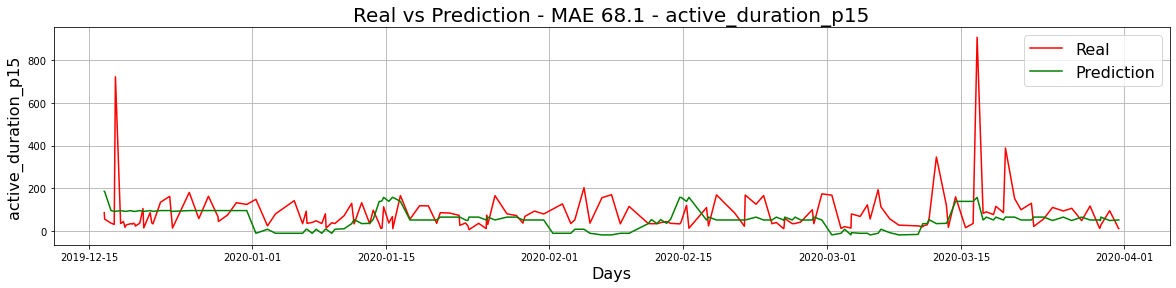

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    0      0          0.0            p15
2020-04-02     0    0      0          0.0            p15
2020-04-03     0    0      0          0.0            p15
2020-04-04     0    0      0          0.0            p15
2020-04-05     0    0      0          0.0            p15

In [161]:
#active_duration  prediction
horizon=24*7
X_active_duration_p15= active_duration_p15.drop('Active_Duration_in_mins', axis=1)
y_active_duration_p15 = active_duration_p15['Active_Duration_in_mins']
    
#take last week of the dataset for validation
X_train_active_duration_p15, X_test_active_duration_p15 = X_active_duration_p15.iloc[:-horizon,:], X_active_duration_p15.iloc[-horizon:,:]
y_train_active_duration_p15, y_test_active_duration_p15 = y_active_duration_p15.iloc[:-horizon], y_active_duration_p15.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_active_duration_p15, y_train_active_duration_p15)
predictions_active_duration_p15 = model.predict(X_test_active_duration_p15)

#calculate MAE
mae_active_duration_p15 =np.round(mean_absolute_error(y_test_active_duration_p15, predictions_active_duration_p15),1)    
mape_active_duration_p15 = (mean_absolute_percentage_error(y_test_active_duration_p15, predictions_active_duration_p15))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_active_duration_p15} - active_duration_p15', fontsize=20)
plt.plot(y_test_active_duration_p15, color='red')
plt.plot(pd.Series(predictions_active_duration_p15, index=y_test_active_duration_p15.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('active_duration_p15', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()


index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_active_duration_p15 = pd.DataFrame(fut_date)
date_active_duration_p15 = date_active_duration_p15.set_index(date_active_duration_p15.datetime)
date_active_duration_p15['hour'] = date_active_duration_p15.index.hour
date_active_duration_p15['day'] = date_active_duration_p15.index.day
date_active_duration_p15['month'] = date_active_duration_p15.index.month
date_active_duration_p15.drop('datetime', axis=1, inplace=True)
predictions_active_duration_p15 = model.predict(date_active_duration_p15)
date_active_duration_p15['predictions'] = np.round(predictions_active_duration_p15.tolist())
date_active_duration_p15[predictions_active_duration_p15<0] = 0
date_active_duration_p15['Participant_ID']= 'p15'

#Saving file for machine learning
file_to_save_active_duration = date_active_duration_p15.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p15/active_duration_p15.csv')

date_active_duration_p15.head()

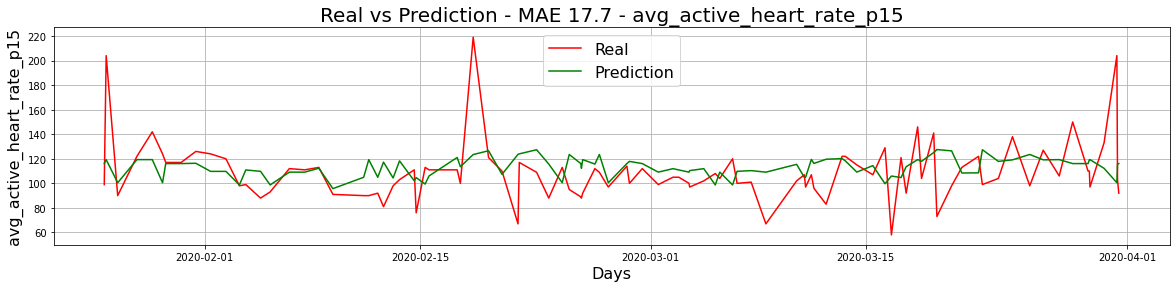

hour  day  month  predictions Participant_ID
datetime                                                
2020-04-01     0    1      4         99.0            p15
2020-04-02     0    2      4         99.0            p15
2020-04-03     0    3      4         99.0            p15
2020-04-04     0    4      4         99.0            p15
2020-04-05     0    5      4         99.0            p15

In [162]:
#avg_active_heart_rate  prediction
horizon=24*4
X_avg_active_heart_rate_p15= avg_active_heart_rate_p15.drop('Avg_ActiveHeartRate', axis=1)
y_avg_active_heart_rate_p15 = avg_active_heart_rate_p15['Avg_ActiveHeartRate']
    
#take last week of the dataset for validation
X_train_avg_active_heart_rate_p15, X_test_avg_active_heart_rate_p15 = X_avg_active_heart_rate_p15.iloc[:-horizon,:], X_avg_active_heart_rate_p15.iloc[-horizon:,:]
y_train_avg_active_heart_rate_p15, y_test_avg_active_heart_rate_p15 = y_avg_active_heart_rate_p15.iloc[:-horizon], y_avg_active_heart_rate_p15.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_avg_active_heart_rate_p15, y_train_avg_active_heart_rate_p15)
predictions_avg_active_heart_rate_p15 = model.predict(X_test_avg_active_heart_rate_p15)

#calculate MAE
mae_avg_active_heart_rate_p15 =np.round(mean_absolute_error(y_test_avg_active_heart_rate_p15, predictions_avg_active_heart_rate_p15),1)    
mape_avg_active_heart_rate_p15 = (mean_absolute_percentage_error(y_test_avg_active_heart_rate_p15, predictions_avg_active_heart_rate_p15))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_avg_active_heart_rate_p15} - avg_active_heart_rate_p15', fontsize=20)
plt.plot(y_test_avg_active_heart_rate_p15, color='red')
plt.plot(pd.Series(predictions_avg_active_heart_rate_p15, index=y_test_avg_active_heart_rate_p15.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('avg_active_heart_rate_p15', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_avg_active_heart_rate_p15 = pd.DataFrame(fut_date)
date_avg_active_heart_rate_p15 = date_avg_active_heart_rate_p15.set_index(date_avg_active_heart_rate_p15.datetime)
date_avg_active_heart_rate_p15['hour'] = date_avg_active_heart_rate_p15.index.hour
date_avg_active_heart_rate_p15['day'] = date_avg_active_heart_rate_p15.index.day
date_avg_active_heart_rate_p15['month'] = date_avg_active_heart_rate_p15.index.month
date_avg_active_heart_rate_p15.drop('datetime', axis=1, inplace=True)
predictions_avg_active_heart_rate_p15 = model.predict(date_avg_active_heart_rate_p15)
date_avg_active_heart_rate_p15['predictions'] = np.round(predictions_avg_active_heart_rate_p15.tolist())
date_avg_active_heart_rate_p15[predictions_avg_active_heart_rate_p15<0] = 0
date_avg_active_heart_rate_p15['Participant_ID']= 'p15'

#Saving file for machine learning
file_to_save_avg_active_heart_rate = date_avg_active_heart_rate_p15.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p15/avg_active_heart_rate_p15.csv')

date_avg_active_heart_rate_p15.head()

(144, 3)
(96, 2)


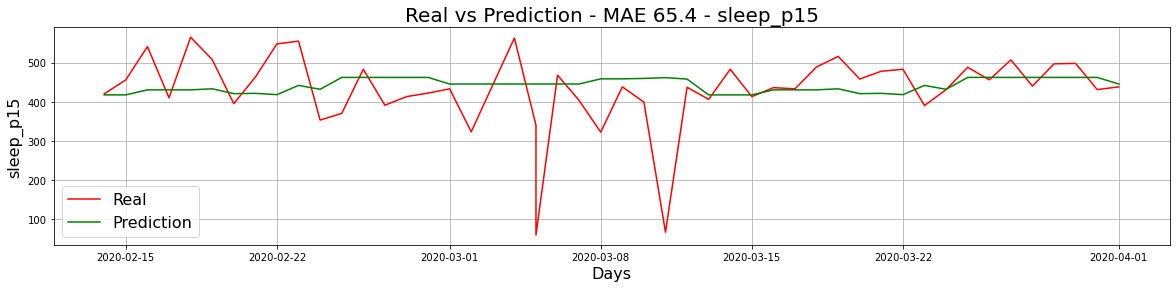

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4        445.0            p15
2020-04-02    2      4        445.0            p15
2020-04-03    3      4        445.0            p15
2020-04-04    4      4        445.0            p15
2020-04-05    5      4        445.0            p15

In [163]:
#sleep prediction
horizon=24*2
X_sleep_p15= sleep_p15.drop('Minutes_Asleep', axis=1)
y_sleep_p15 = sleep_p15['Minutes_Asleep']
    
#take last week of the dataset for validation
X_train_sleep_p15, X_test_sleep_p15 = X_sleep_p15.iloc[:-horizon,:], X_sleep_p15.iloc[-horizon:,:]
y_train_sleep_p15, y_test_sleep_p15 = y_sleep_p15.iloc[:-horizon], y_sleep_p15.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_sleep_p15, y_train_sleep_p15)
predictions_sleep_p15 = model.predict(X_test_sleep_p15)

print(sleep_p15.shape)
print(X_train_sleep_p15.shape)

#calculate MAE
mae_sleep_p15 =np.round(mean_absolute_error(y_test_sleep_p15, predictions_sleep_p15),1)    
mape_sleep_p15 = (mean_absolute_percentage_error(y_test_sleep_p15, predictions_sleep_p15))*100 
    
#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_sleep_p15} - sleep_p15', fontsize=20)
plt.plot(y_test_sleep_p15, color='red')
plt.plot(pd.Series(predictions_sleep_p15, index=y_test_sleep_p15.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('sleep_p15', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_sleep_p15 = pd.DataFrame(fut_date)
date_sleep_p15 = date_sleep_p15.set_index(date_sleep_p15.datetime)
#date_sleep_p15['hour'] = date_sleep_p15.index.hour
date_sleep_p15['day'] = date_sleep_p15.index.day
date_sleep_p15['month'] = date_sleep_p15.index.month
date_sleep_p15.drop('datetime', axis=1, inplace=True)
predictions_sleep_p15 = model.predict(date_sleep_p15)
date_sleep_p15['predictions'] = np.round(predictions_sleep_p15.tolist())
date_sleep_p15[predictions_sleep_p15<0] = 0
date_sleep_p15['Participant_ID']= 'p15'

#Saving file for machine learning
file_to_save_sleep = date_sleep_p15.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p15/sleep_p15.csv')

date_sleep_p15.head()

(144, 3)
(129, 2)


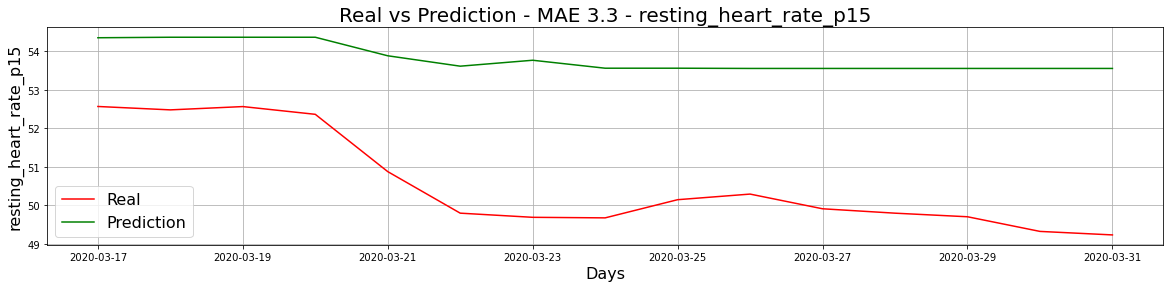

day  month  predictions Participant_ID
datetime                                          
2020-04-01    1      4         54.0            p15
2020-04-02    2      4         54.0            p15
2020-04-03    3      4         54.0            p15
2020-04-04    4      4         54.0            p15
2020-04-05    5      4         54.0            p15

In [164]:
#resting_heart_rate prediction
horizon=15
X_resting_heart_rate_p15= resting_heart_rate_p15.drop('Resting_beats_per_min', axis=1)
y_resting_heart_rate_p15 = resting_heart_rate_p15['Resting_beats_per_min']
    
#take last week of the dataset for validation
X_train_resting_heart_rate_p15, X_test_resting_heart_rate_p15 = X_resting_heart_rate_p15.iloc[:-horizon,:], X_resting_heart_rate_p15.iloc[-horizon:,:]
y_train_resting_heart_rate_p15, y_test_resting_heart_rate_p15 = y_resting_heart_rate_p15.iloc[:-horizon], y_resting_heart_rate_p15.iloc[-horizon:]
    
#create, train and do inference of the model
model = LGBMRegressor(random_state=42)
model.fit(X_train_resting_heart_rate_p15, y_train_resting_heart_rate_p15)
predictions_resting_heart_rate_p15 = model.predict(X_test_resting_heart_rate_p15)

print(resting_heart_rate_p15.shape)
print(X_train_resting_heart_rate_p15.shape)

#calculate MAE
mae_resting_heart_rate_p15 =np.round(mean_absolute_error(y_test_resting_heart_rate_p15, predictions_resting_heart_rate_p15),1)    
mape_resting_heart_rate_p15 = (mean_absolute_percentage_error(y_test_resting_heart_rate_p15, predictions_resting_heart_rate_p15))*100

#plot reality vs prediction for the last week of the dataset
fig = plt.figure(figsize=(20,4))
plt.title(f'Real vs Prediction - MAE {mae_resting_heart_rate_p15} - resting_heart_rate_p15', fontsize=20)
plt.plot(y_test_resting_heart_rate_p15, color='red')
plt.plot(pd.Series(predictions_resting_heart_rate_p15, index=y_test_resting_heart_rate_p15.index), color='green')
plt.xlabel('Days', fontsize=16)
plt.ylabel('resting_heart_rate_p15', fontsize=16)
plt.legend(labels=['Real', 'Prediction'], fontsize=16)
plt.grid()
plt.show()

index2=pd.date_range("20200401" , "20210429" , freq="D")
fut_date= {'datetime' : index2}
date_resting_heart_rate_p15 = pd.DataFrame(fut_date)
date_resting_heart_rate_p15 = date_resting_heart_rate_p15.set_index(date_resting_heart_rate_p15.datetime)
#date_resting_heart_rate_p15['hour'] = date_resting_heart_rate_p15.index.hour
date_resting_heart_rate_p15['day'] = date_resting_heart_rate_p15.index.day
date_resting_heart_rate_p15['month'] = date_resting_heart_rate_p15.index.month
date_resting_heart_rate_p15.drop('datetime', axis=1, inplace=True)
predictions_resting_heart_rate_p15 = model.predict(date_resting_heart_rate_p15)
date_resting_heart_rate_p15['predictions'] = np.round(predictions_resting_heart_rate_p15.tolist())
date_resting_heart_rate_p15[predictions_resting_heart_rate_p15<0] = 0
date_resting_heart_rate_p15['Participant_ID']= 'p15'

#Saving file for machine learning
file_to_save_sleep = date_resting_heart_rate_p15.to_csv(r'../Resource/dataset/csv/for_machine_learning/predicted_values_csv/p15/resting_heart_rate_p15.csv')

date_resting_heart_rate_p15.head()

In [165]:
participant = ['p01' , 'p02', 'p03', 'p04', 'p05', 'p06', 'p07','p08', 'p09', 'p10', 'p11', 'p12','p13','p14','p15']
calories = [mape_calories_p01 , mape_calories_p02, mape_calories_p03 , mape_calories_p04, mape_calories_p05 , mape_calories_p06,
           mape_calories_p07 , mape_calories_p08, mape_calories_p09 , mape_calories_p10, mape_calories_p11 , mape_calories_p12,
           mape_calories_p13 , mape_calories_p14, mape_calories_p15]

distance = [mape_distance_p01,mape_distance_p02,mape_distance_p03,mape_distance_p04,mape_distance_p05,mape_distance_p06,
            mape_distance_p07,mape_distance_p08,mape_distance_p09,mape_distance_p10,mape_distance_p11,
           mape_distance_p12,mape_distance_p13,mape_distance_p14,mape_distance_p15]

steps = [mape_steps_p01,mape_steps_p02,mape_steps_p03,mape_steps_p04,mape_steps_p05,mape_steps_p06,mape_steps_p07,mape_steps_p08,
        mape_steps_p09,mape_steps_p10,mape_steps_p11,mape_steps_p12,mape_steps_p13,mape_steps_p14,mape_steps_p15]

active_duration = [mape_active_duration_p01,mape_active_duration_p02,mape_active_duration_p03,mape_active_duration_p04,
                  mape_active_duration_p05,mape_active_duration_p06,mape_active_duration_p07,mape_active_duration_p08,
                  mape_active_duration_p09,mape_active_duration_p10,mape_active_duration_p11,mape_active_duration_p12,
                  mape_active_duration_p13,mape_active_duration_p14,mape_active_duration_p15]

avg_active_heart_rate = [mape_avg_active_heart_rate_p01,mape_avg_active_heart_rate_p02,mape_avg_active_heart_rate_p03,
                        mape_avg_active_heart_rate_p04,mape_avg_active_heart_rate_p05,mape_avg_active_heart_rate_p06,
                        mape_avg_active_heart_rate_p07,mape_avg_active_heart_rate_p08,mape_avg_active_heart_rate_p09,
                        mape_avg_active_heart_rate_p10,mape_avg_active_heart_rate_p11,mape_avg_active_heart_rate_p12,
                        mape_avg_active_heart_rate_p13,mape_avg_active_heart_rate_p14,mape_avg_active_heart_rate_p15]

sleep = [mape_sleep_p01,mape_sleep_p02,mape_sleep_p03,mape_sleep_p04,mape_sleep_p05,mape_sleep_p06,mape_sleep_p07,mape_sleep_p08,
        mape_sleep_p09,mape_sleep_p10,mape_sleep_p11,mape_sleep_p12,mape_sleep_p13,mape_sleep_p14,mape_sleep_p15]

resting_heart_rate = [mape_resting_heart_rate_p01,mape_resting_heart_rate_p02,mape_resting_heart_rate_p03,
                        mape_resting_heart_rate_p04,mape_resting_heart_rate_p05,mape_resting_heart_rate_p06,
                        mape_resting_heart_rate_p07,mape_resting_heart_rate_p08,mape_resting_heart_rate_p09,
                        mape_resting_heart_rate_p10,mape_resting_heart_rate_p11, ' no value',' no value',
                        mape_resting_heart_rate_p14,mape_resting_heart_rate_p15]

mape= pd.DataFrame({
    'Participants' : participant,
    'Calories' : calories,
    'Distance': distance,
    'Steps' : steps,
    'Active_Duration' : active_duration,
    'Avg_Active_Heart_Rate' : avg_active_heart_rate,
    'Sleep': sleep,
    'Resting_Heart_Rate' : resting_heart_rate
    
})
mape

Participants   Calories     Distance        Steps  Active_Duration  \
0           p01  42.317368  1129.423117  1015.815379       824.365328   
1           p02  56.761213  1099.635166   976.226775        84.574274   
2           p03  19.978076  1372.303278  1251.543071        21.948431   
3           p04  30.740639  1174.933083  1198.960031        59.686691   
4           p05  33.646554   819.127598   846.556775        38.263506   
5           p06  26.733352   306.177698   211.188026        45.270006   
6           p07  30.593720  1491.669492  1307.766052        84.150349   
7           p08  48.569067  1829.208490  1394.411849       119.366745   
8           p09  37.915714  1353.148498  1391.290047        60.619833   
9           p10   9.745752   644.422986   569.331028        33.035174   
10          p11  21.834112   854.576189   948.106701        44.875473   
11          p12  16.445126   500.618185   587.194094        38.821355   
12          p13  12.392428  1036.334736   902.977410        37.170142   
13          p14  33.666253  1249.965233  1403.890543        34.237493   
14          p15  42.787936  1181.665090  1034.207885       147.187342   

    Avg_Active_Heart_Rate      Sleep Resting_Heart_Rate  
0               14.119735  11.478607            2.48987  
1               15.516825  36.639672            2.68525  
2                7.065370  30.464608           3.331804  
3               16.367945  62.014869           6.018237  
4                8.230529  34.043975           1.989292  
5               16.540212  23.939794           4.542735  
6               21.072051  56.484306           3.154283  
7               17.662504   8.651338           4.003982  
8                7.075751  32.777089           2.853155  
9               13.839416  21.503770           3.341743  
10              22.981361  20.491211            4.19739  
11              18.975921  75.123915           no value  
12              13.691846  24.361046           no value  
13              19.193779  63.508431           1.046757  
14              16.883431  37.310930           6.479741